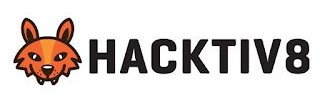

# Final Project 4 Clustering

# Tim - Project Kelompok 6



    Anggota :

    Ahmad Fadillah (PYTN-KS17-06)
    Felic Wicent (PYTN-KS17-025)
    Haniefa Aulia Rahma (PYTN-KS17-01)

    Instructor : Chamdan L Abdulbaaqiy
    Project : Clustering pada Credit Card Dataset for Clustering
    Batch : 5


# A. Perkenalan

## A.1 Latar Belakang

Dalam ranah industri keuangan, pemahaman mendalam terhadap perilaku konsumen merupakan kunci untuk menyempurnakan layanan dan meningkatkan pengalaman pengguna. Dengan data transaksi kartu kredit dari 9000 pengguna selama 6 bulan yang mencakup detail transaksi, termasuk jenis pembelian, lokasi, jumlah pembayaran, dan lainnya, yang mencerminkan kebiasaan pengeluaran masing-masing individu. Projek ini bertujuan untuk mengelompokkan jenis-jenis pengguna kartu kredit dengan menerapkan konsep Clustering, khususnya menggunakan algoritma Scikit-Learn, yakni mengelompokkan pengguna berdasarkan pola transaksi mereka.

Penerapan Clustering pada dataset ini diharapkan dapat mengidentifikasi kelompok-kelompok pengguna dengan perilaku serupa. Misalnya, kelompok yang cenderung berbelanja di lokasi tertentu, atau yang memiliki kecenderungan menggunakan kartu kredit untuk pembayaran maupun pembelian tertentu. Dengan pemahaman yang lebih dalam tentang preferensi dan kebiasaan pengguna melalui dataset ini, maka dapat menjadi solusi untuk sebuah perusahaan keuangan dapat menyesuaikan strategi pemasaran, mengoptimalkan penawaran produk, dan bahkan meningkatkan sistem keamanan untuk mendeteksi aktivitas yang tidak biasa.

Sehingga, proyek dapat memberikan wawasan tentang perilaku pengguna kartu kredit, membuka peluang untuk meningkatkan layanan keuangan, mendeteksi pola penipuan, dan mengoptimalkan strategi bisnis dalam industri finansial serta menjadi relevansi layanan finansial dalam lingkungan perusahaan yang terus berkembang.

## A.2 Dataset

Dataset yang dipakai pada project ini diambil dari kaggle. Adapun dataset yang digunakan ialah dataset CC GENERAL.csv (data pengguna kartu kredit) yang memiliki atribut sebanyak 18 dengan entitas sebanyak 9000. Dengan memanfaatkan atribut-atribut yang ada kami akan menggunakannya untuk mendapatkan hasil clustering yang relevan dan sesuai dengan pola tertentu.

## A.3 Informasi Atribute Dataset

1. **CUST_ID** - Nomor identifikasi pemegang kartu kredit. Ini merupakan atribut kategorikal yang unik untuk setiap pengguna.
2. **BALANCE** - Jumlah saldo yang tersisa di akun pengguna untuk melakukan pembelian. Ini menunjukkan seberapa banyak uang yang masih tersedia di akun.
3. **BALANCE_FREQUENCY** - Seberapa sering saldo diperbarui, dinyatakan dalam rentang skor antara 0 sampai 1. Skor 1 menunjukkan pembaruan yang sering, sedangkan skor 0 menunjukkan pembaruan yang jarang dilakukan.
4. **PURCHASES** - Jumlah pembelian yang dilakukan dari akun pengguna. Ini mencakup semua pembelian yang dilakukan.
5. **ONEOFF_PURCHASES** - Jumlah maksimum pembelian yang dilakukan dalam satu transaksi.
6. **INSTALLMENTS_PURCHASES** - Jumlah pembelian yang dilakukan dengan sistem pembayaran secara cicilan.
7. **CASH_ADVANCE** - Jumlah uang tunai yang diberikan oleh pengguna.
8. **PURCHASES_FREQUENCY** - Seberapa sering pembelian dilakukan, dengan skor antara 0 sampai 1. Skor 1 menunjukkan pembelian yang sering dilakukan, sedangkan skor 0 menunjukkan pembelian yang jarang dilakukan.
9. **ONEOFF_PURCHASES_FREQUENCY** - Seberapa sering pembelian dilakukan dalam satu transaksi tunggal.
10. **PURCHASES_INSTALLMENTS_FREQUENCY** - Seberapa sering pembelian dilakukan dengan sistem pembayaran cicilan, dengan skor 0 sampai 1. Skor 1 menunjukkan pembelian dengan cicilan yang sering dilakukan, sedangkan skor 0 menunjukkan pembelian dengan cicilan yang jarang dilakukan.
11. **CASH_ADVANCE_FREQUENCY** - Seberapa sering uang tunai diminta atau diambil oleh pengguna.
12. **CASH_ADVANCE_TRX** - Jumlah transaksi yang dilakukan menggunakan uang tunai.
13. **PURCHASES_TRX** - Jumlah transaksi pembelian yang dilakukan.
14. **CREDIT_LIMIT** - Batas kredit dari kartu kredit untuk pengguna.
15. **PAYMENTS** - Jumlah pembayaran yang dilakukan oleh pengguna.
16. **MINIMUM_PAYMENTS** - Jumlah minimum pembayaran yang harus dibayarkan oleh pengguna.
17. **PRC_FULL_PAYMENT** - Persentase pembayaran penuh yang dibayarkan oleh pengguna dari total tagihan. 0 sampai 1
18. **TENURE** - Waktu pelayanan kartu kredit untuk pengguna, atau lamanya pengguna telah memiliki kartu kredit ini.

## A.4 Objectif

Adapun Objektif yang ingin di capai :
1. `Mempersiapkan data yang optimal untuk clustering.`
2. `Mengevaluasi algoritma - algoritma clustering.`

# B. Import Package

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy*")
warnings.filterwarnings("ignore", message="is_sparse is deprecated*")

In [2]:
import os
os.environ['PYTHONWARNINGS'] = 'ignore'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score,  calinski_harabasz_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import dtale
import sweetviz
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN

# C. Data Loading

In [4]:
# Membuka File dataset CC GENERAL.csv dengan Pandas

df = pd.read_csv('CC GENERAL.csv')
# df = pd.read_csv('C:\\Users\\Admin\\Hactiv8\\final-project\\FP4\\CC GENERAL.csv')
pd.set_option('display.max_columns', None)
df.reset_index(drop=True)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0     C10001    40.900749           0.818182      95.40              0.00  \
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                      95.40      0.000000             0.166667  \
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                       0.000000                          0.083333  \
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                   0.000000                 0              2        1000.0  \
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [5]:
# Cek jumlah baris dan kolom

row, col = df.shape
cek_baris_kolom = pd.DataFrame({'Jumlah Baris': [row], 'Jumlah Kolom': [col]})
cek_baris_kolom

Jumlah Baris  Jumlah Kolom
0          8950            18

# D. Data Cleaning

In [6]:
df.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
8945  C19186   28.493517           1.000000     291.12              0.00  \
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
8945                  291.12      0.000000             1.000000  \
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
8945                    0.000000                          0.833333  \
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
8945                0.000000                 0              6        1000.0  \
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [7]:
# Cek nunique value pada attribute

cek_nunique = df.nunique()
cek_nunique = cek_nunique.to_frame(name='Jumlah')
cek_nunique.reset_index(inplace=True)
cek_nunique.rename(columns={'index': 'Kolom'}, inplace=True)
cek_nunique

Kolom  Jumlah
0                            CUST_ID    8950
1                            BALANCE    8871
2                  BALANCE_FREQUENCY      43
3                          PURCHASES    6203
4                   ONEOFF_PURCHASES    4014
5             INSTALLMENTS_PURCHASES    4452
6                       CASH_ADVANCE    4323
7                PURCHASES_FREQUENCY      47
8         ONEOFF_PURCHASES_FREQUENCY      47
9   PURCHASES_INSTALLMENTS_FREQUENCY      47
10            CASH_ADVANCE_FREQUENCY      54
11                  CASH_ADVANCE_TRX      65
12                     PURCHASES_TRX     173
13                      CREDIT_LIMIT     205
14                          PAYMENTS    8711
15                  MINIMUM_PAYMENTS    8636
16                  PRC_FULL_PAYMENT      47
17                            TENURE       7

In [8]:
# Cek jumlah Duplikat yang sama persis

df[df.duplicated(keep=False)]

# Perhatikan pada attribut MINIMUM_PAYMENTS dan CREDIT_LIMIT  

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [9]:
# Cek tipe data dan Missing value yang ada

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
# Cek sedikit anomali data dari attribute

df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES   
count   8950.000000        8950.000000   8950.000000       8950.000000  \
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
count             8950.000000   8950.000000          8950.000000  \
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
count                 8950.000000                       8950.000000  \
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
count             8950.000000       8950.000000    8950.000000   8949.000000  \
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [11]:
# CeK Jumlah Missing Value pada masing-masing attribute

cek_missing_value = df.isna().sum().reset_index()
cek_missing_value.columns = ['Attribute', 'Jumlah Missing Value']
cek_missing_value

# Terdapat Missing Value di attribut CREDIT_LIMIT dan MINIMUM_PAYMENTS

Attribute  Jumlah Missing Value
0                            CUST_ID                     0
1                            BALANCE                     0
2                  BALANCE_FREQUENCY                     0
3                          PURCHASES                     0
4                   ONEOFF_PURCHASES                     0
5             INSTALLMENTS_PURCHASES                     0
6                       CASH_ADVANCE                     0
7                PURCHASES_FREQUENCY                     0
8         ONEOFF_PURCHASES_FREQUENCY                     0
9   PURCHASES_INSTALLMENTS_FREQUENCY                     0
10            CASH_ADVANCE_FREQUENCY                     0
11                  CASH_ADVANCE_TRX                     0
12                     PURCHASES_TRX                     0
13                      CREDIT_LIMIT                     1
14                          PAYMENTS                     0
15                  MINIMUM_PAYMENTS                   313
16                  PRC_FULL_PAYMENT                     0
17                            TENURE                     0

In [12]:
# Mengisi Missing Value pada CREDIT_LIMIT dan MINIMUM_PAYMENTS dengan Median
# Median dipilih karena lebih stabil terhadap outlier dibanding mean.


median_credit_limit = df['CREDIT_LIMIT'].median()
df['CREDIT_LIMIT'].fillna(median_credit_limit, inplace=True)

median_minimum_payments = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(median_minimum_payments, inplace=True)

# Data pada attribut CREDIT_LIMIT dan MINIMUM_PAYMENTS yang memiliki missing value telah berhasil di isi dengan Median

Kami mengisi nilai NaN pada atribut bertipe numerik dengan Median alasannya dikarenakan Median lebih stabil daripada Mean, tidak dipengaruhi oleh outlier, dan mempertahankan integritas data. Karena proyek ini untuk mengelompokkan pengguna berdasarkan pola tertentu, maka hal ini akan membantu menjaga konsistensi dan hasil yang lebih baik. Keputusan ini diambil untuk memastikan data yang bersih dan konsisten dalam proyek clustering data.

In [13]:
# Drop attribute yang tidak diperlukan yakni CUST_ID

df = df.drop('CUST_ID', axis=1)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0       40.900749           0.818182      95.40              0.00  \
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                      95.40      0.000000             0.166667  \
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                       0.000000                          0.083333  \
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                   0.000000                 0              2        1000.0  \
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        312.343947          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        312.343947          0.000000       6  
8947    81

# E. Data Exploration

## E.1 Measure Central of Tendency

In [14]:
# Measure Central of Tendency : Mean, Median, Modus
# Note : 50% ialah Median

MCT = df.describe().T

MCT.reset_index().rename(
    columns={'index': 'Attribute'})

Attribute   count         mean          std   
0                            BALANCE  8950.0  1564.474828  2081.531879  \
1                  BALANCE_FREQUENCY  8950.0     0.877271     0.236904   
2                          PURCHASES  8950.0  1003.204834  2136.634782   
3                   ONEOFF_PURCHASES  8950.0   592.437371  1659.887917   
4             INSTALLMENTS_PURCHASES  8950.0   411.067645   904.338115   
5                       CASH_ADVANCE  8950.0   978.871112  2097.163877   
6                PURCHASES_FREQUENCY  8950.0     0.490351     0.401371   
7         ONEOFF_PURCHASES_FREQUENCY  8950.0     0.202458     0.298336   
8   PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   
9             CASH_ADVANCE_FREQUENCY  8950.0     0.135144     0.200121   
10                  CASH_ADVANCE_TRX  8950.0     3.248827     6.824647   
11                     PURCHASES_TRX  8950.0    14.709832    24.857649   
12                      CREDIT_LIMIT  8950.0  4494.282473  3638.646702   
13                          PAYMENTS  8950.0  1733.143852  2895.063757   
14                  MINIMUM_PAYMENTS  8950.0   844.906767  2332.792322   
15                  PRC_FULL_PAYMENT  8950.0     0.153715     0.292499   
16                            TENURE  8950.0    11.517318     1.338331   

          min          25%          50%          75%          max  
0    0.000000   128.281915   873.385231  2054.140036  19043.13856  
1    0.000000     0.888889     1.000000     1.000000      1.00000  
2    0.000000    39.635000   361.280000  1110.130000  49039.57000  
3    0.000000     0.000000    38.000000   577.405000  40761.25000  
4    0.000000     0.000000    89.000000   468.637500  22500.00000  
5    0.000000     0.000000     0.000000  1113.821139  47137.21176  
6    0.000000     0.083333     0.500000     0.916667      1.00000  
7    0.000000     0.000000     0.083333     0.300000      1.00000  
8    0.000000     0.000000     0.166667     0.750000      1.00000  
9    0.000000     0.000000     0.000000     0.222222      1.50000  
10   0.000000     0.000000     0.000000     4.000000    123.00000  
11   0.000000     1.000000     7.000000    17.000000    358.00000  
12  50.000000  1600.000000  3000.000000  6500.000000  30000.00000  
13   0.000000   383.276166   856.901546  1901.134317  50721.48336  
14   0.019163   170.857654   312.343947   788.713501  76406.20752  
15   0.000000     0.000000     0.000000     0.142857      1.00000  
16   6.000000    12.000000    12.000000    12.000000     12.00000

## E.2 Measure of Spread/Dispersion dan Shape

In [15]:
# Measure of Spread/Dispersion : Range, Interquartile Range, Variance, Standard Deviation
# Measure of Shape : Skewness, Kurtosis
# Note : Range = Max - Min

# Variance
variance_df = df.select_dtypes(
    include=[np.number]).var(ddof=1).to_frame()
variance_df.rename(columns={0: 'Variance'}, inplace=True)

# Standard Deviation
std_deviation_df = df.select_dtypes(
    include=[np.number]).std(ddof=1).to_frame()
std_deviation_df.rename(columns={0: 'Standard Deviation'}, inplace=True)

# Skewness
skewness_df = df.select_dtypes(include=[np.number]).skew().to_frame()
skewness_df.rename(columns={0: 'Skewness'}, inplace=True)
skewness_df['Skewness Description'] = skewness_df['Skewness'].apply(
    lambda x: 'Distribusi Positif' if x > 0 else ('Distribusi Negatif' if x < 0 else 'Distribusi Simetrik'))

# Kurtosis
kurtosis_df = df.select_dtypes(include=[np.number]).kurtosis().to_frame()
kurtosis_df.rename(columns={0: 'Kurtosis'}, inplace=True)
kurtosis_df['Kurtosis Description'] = kurtosis_df['Kurtosis'].apply(
    lambda x: 'Leptokurtik' if x > 0 else ('Platykurtik' if x < 0 else 'Mesokurtik'))

# Percentiles
percentile_values = df.select_dtypes(
    include=[np.number]).quantile([0.25, 0.50, 0.75])
percentile_values.index = ['25%', '50%', '75%']
percentile_values = percentile_values.T
percentile_values['IQR'] = percentile_values['75%'] - percentile_values['25%']

# Ranges
range_df = df.describe().loc[['min', 'max']].T
range_df.rename(columns={'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

# Menggabungkan semua hasil
Measure_of_Spread = pd.concat([variance_df, std_deviation_df,
                              skewness_df, kurtosis_df, percentile_values, range_df], axis=1)

# Tampilkan hasilnya
Measure_of_Spread.reset_index().rename(columns={'index': 'Attribute'})

Attribute      Variance  Standard Deviation   
0                            BALANCE  4.332775e+06         2081.531879  \
1                  BALANCE_FREQUENCY  5.612351e-02            0.236904   
2                          PURCHASES  4.565208e+06         2136.634782   
3                   ONEOFF_PURCHASES  2.755228e+06         1659.887917   
4             INSTALLMENTS_PURCHASES  8.178274e+05          904.338115   
5                       CASH_ADVANCE  4.398096e+06         2097.163877   
6                PURCHASES_FREQUENCY  1.610985e-01            0.401371   
7         ONEOFF_PURCHASES_FREQUENCY  8.900441e-02            0.298336   
8   PURCHASES_INSTALLMENTS_FREQUENCY  1.579647e-01            0.397448   
9             CASH_ADVANCE_FREQUENCY  4.004857e-02            0.200121   
10                  CASH_ADVANCE_TRX  4.657580e+01            6.824647   
11                     PURCHASES_TRX  6.179027e+02           24.857649   
12                      CREDIT_LIMIT  1.323975e+07         3638.646702   
13                          PAYMENTS  8.381394e+06         2895.063757   
14                  MINIMUM_PAYMENTS  5.441920e+06         2332.792322   
15                  PRC_FULL_PAYMENT  8.555578e-02            0.292499   
16                            TENURE  1.791129e+00            1.338331   

     Skewness Skewness Description    Kurtosis Kurtosis Description   
0    2.393386   Distribusi Positif    7.674751          Leptokurtik  \
1   -2.023266   Distribusi Negatif    3.092370          Leptokurtik   
2    8.144269   Distribusi Positif  111.388771          Leptokurtik   
3   10.045083   Distribusi Positif  164.187572          Leptokurtik   
4    7.299120   Distribusi Positif   96.575178          Leptokurtik   
5    5.166609   Distribusi Positif   52.899434          Leptokurtik   
6    0.060164   Distribusi Positif   -1.638631          Platykurtik   
7    1.535613   Distribusi Positif    1.161846          Leptokurtik   
8    0.509201   Distribusi Positif   -1.398632          Platykurtik   
9    1.828686   Distribusi Positif    3.334734          Leptokurtik   
10   5.721298   Distribusi Positif   61.646862          Leptokurtik   
11   4.630655   Distribusi Positif   34.793100          Leptokurtik   
12   1.522636   Distribusi Positif    2.837371          Leptokurtik   
13   5.907620   Distribusi Positif   54.770736          Leptokurtik   
14  13.852446   Distribusi Positif  293.720287          Leptokurtik   
15   1.942820   Distribusi Positif    2.432395          Leptokurtik   
16  -2.943017   Distribusi Negatif    7.694823          Leptokurtik   

            25%          50%          75%          IQR    Minimum      Maximum  
0    128.281915   873.385231  2054.140036  1925.858120   0.000000  19043.13856  
1      0.888889     1.000000     1.000000     0.111111   0.000000      1.00000  
2     39.635000   361.280000  1110.130000  1070.495000   0.000000  49039.57000  
3      0.000000    38.000000   577.405000   577.405000   0.000000  40761.25000  
4      0.000000    89.000000   468.637500   468.637500   0.000000  22500.00000  
5      0.000000     0.000000  1113.821139  1113.821139   0.000000  47137.21176  
6      0.083333     0.500000     0.916667     0.833334   0.000000      1.00000  
7      0.000000     0.083333     0.300000     0.300000   0.000000      1.00000  
8      0.000000     0.166667     0.750000     0.750000   0.000000      1.00000  
9      0.000000     0.000000     0.222222     0.222222   0.000000      1.50000  
10     0.000000     0.000000     4.000000     4.000000   0.000000    123.00000  
11     1.000000     7.000000    17.000000    16.000000   0.000000    358.00000  
12  1600.000000  3000.000000  6500.000000  4900.000000  50.000000  30000.00000  
13   383.276166   856.901546  1901.134317  1517.858151   0.000000  50721.48336  
14   170.857654   312.343947   788.713501   617.855846   0.019163  76406.20752  
15     0.000000     0.000000     0.142857     0.142857   0.000000      1.00000  
16    12.000000    12.000000    12.000

## E.3 Visualisasi Data

### E.3.1 Pesebaran data 

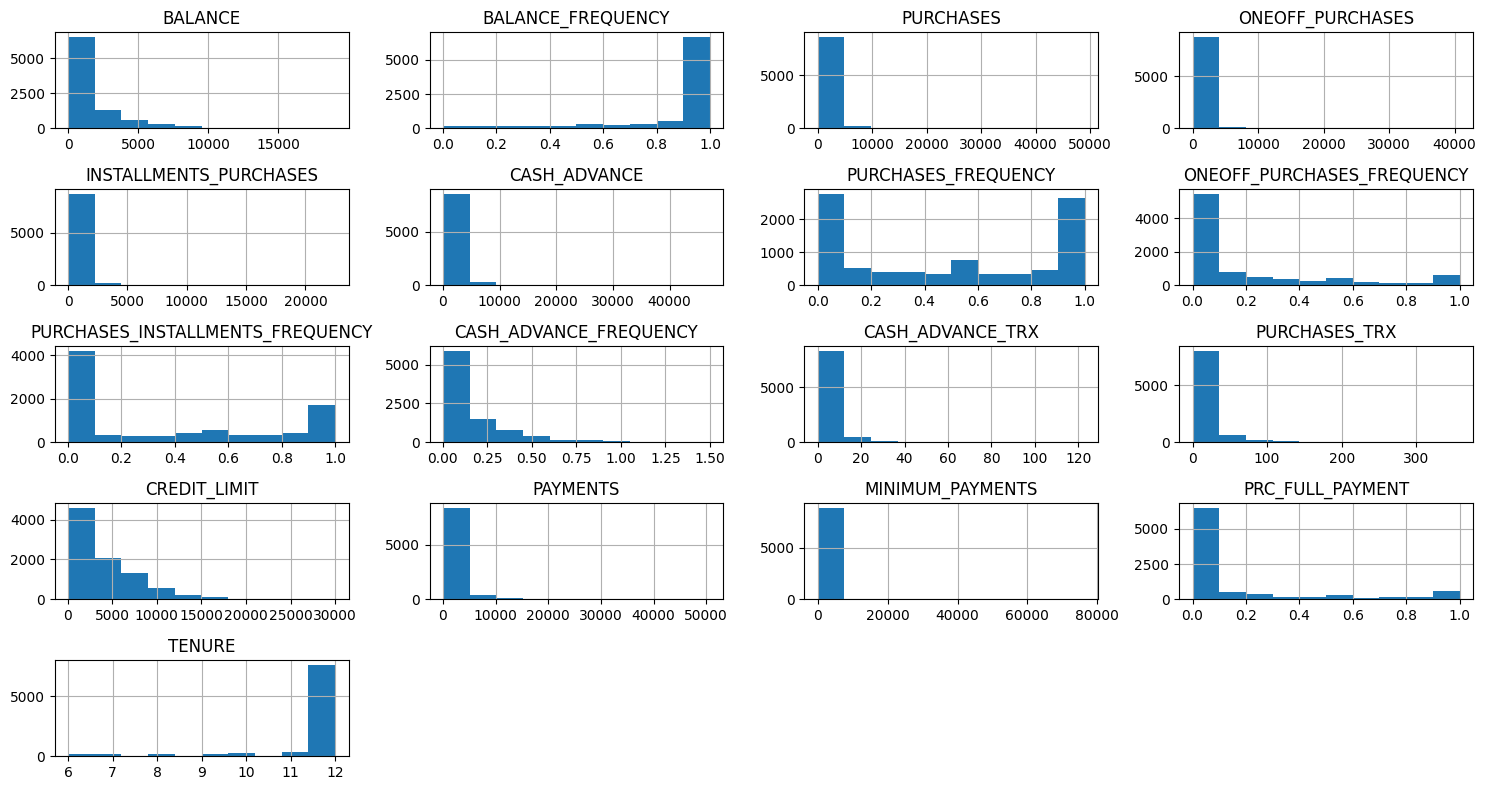

In [16]:
# Histogram

df.hist(figsize=(15, 8))
plt.title('Pesebaran Data')
plt.tight_layout()
plt.show()

Histogram diatas memvisualisasikan distribusi data dari setiap atribut dalam dataset yang memberikan gambaran tentang frekuensi atau distribusi nilai-nilai pada setiap atribut, baik itu transaksi, nilai numerik, maupun kategori yang ada dalam data. Dengan ini dapat memberikan kami wawasan awal tentang karakteristik data yang akan menjadi dasar dalam analisis clustering untuk menggambarkan perilaku pengguna kartu kredit.

### E.3.2 Check Outlier dengan Boxplot

In [17]:
# Fungsi Untuk Visualisasi Boxplot dan Scatterplot

def Boxplot_Scatterplot(attribute, outliers):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    # Box Plot
    sns.boxplot(x=df[attribute], ax=axes[0])
    axes[0].set_ylabel('')
    axes[0].set_xlabel('')

    # Scatter Plot
    sns.scatterplot(x=df.index, y=df[attribute], ax=axes[1])
    sns.scatterplot(x=outliers.index,
                    y=outliers[attribute], color='red', ax=axes[1])
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].legend(['Bukan Outlier', 'Outlier'], bbox_to_anchor=(1.45, 1))

    fig.suptitle(f'Boxplot dan Scatterplot {attribute}', fontsize=20)
    plt.tight_layout()
    plt.show()


# Fungsi Untuk Pencarian Outlier

def Outliers(attribute):
    # Menghitung IQR
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas atas dan batas bawah untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mendeteksi outlier
    outliers = df[(df[attribute] < lower_bound) |
                  (df[attribute] > upper_bound)]

    # Memanggil fungsi Boxplot_Scatterplot
    Boxplot_Scatterplot(attribute, outliers)

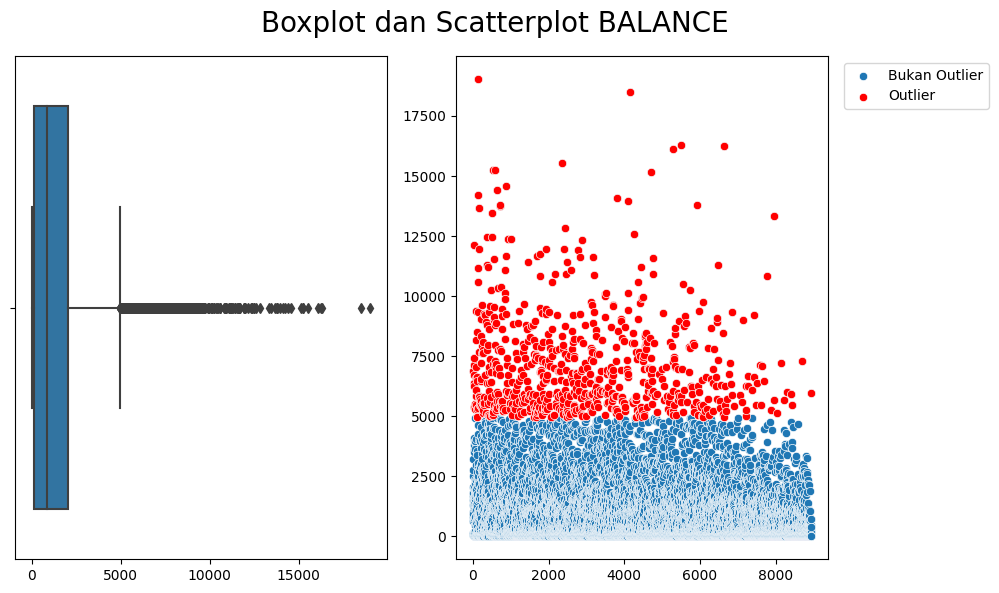

In [18]:
# Attribute BALANCE

Outliers('BALANCE')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'BALANCE' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'BALANCE'.

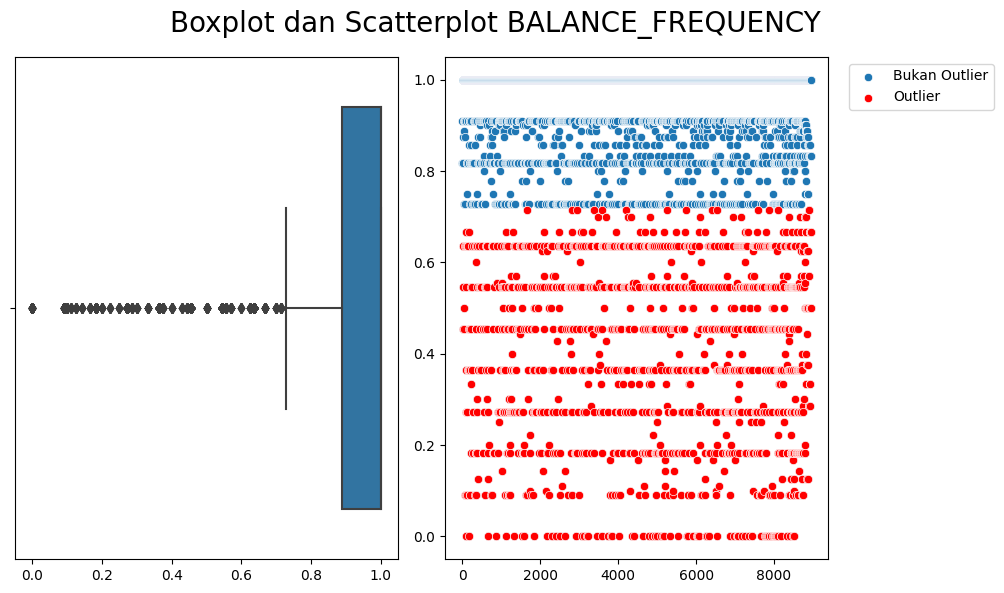

In [19]:
# Attribute BALANCE_FREQUENCY

Outliers('BALANCE_FREQUENCY')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'BALANCE_FREQUENCY' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'BALANCE_FREQUENCY'.

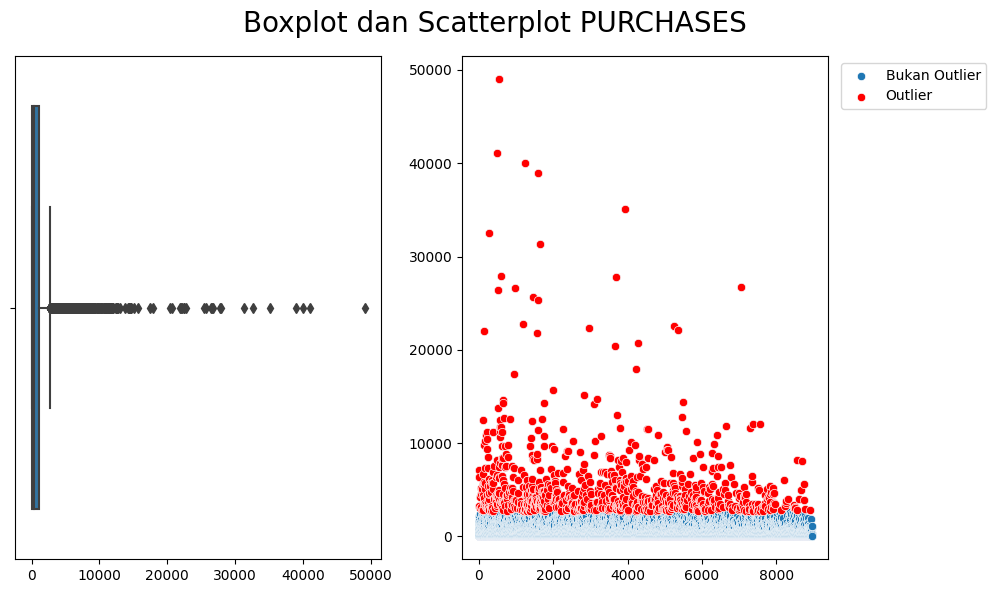

In [20]:
# Attribute PURCHASES

Outliers('PURCHASES')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'PURCHASES' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'PURCHASES'.

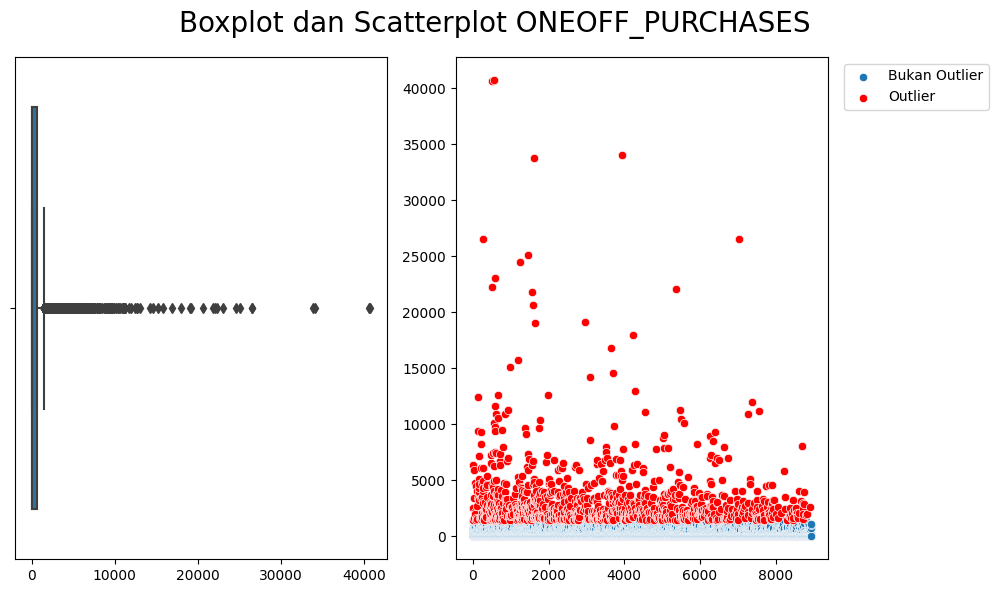

In [21]:
# Attribute ONEOFF_PURCHASES

Outliers('ONEOFF_PURCHASES')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'ONEOFF_PURCHASES' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'ONEOFF_PURCHASES'.

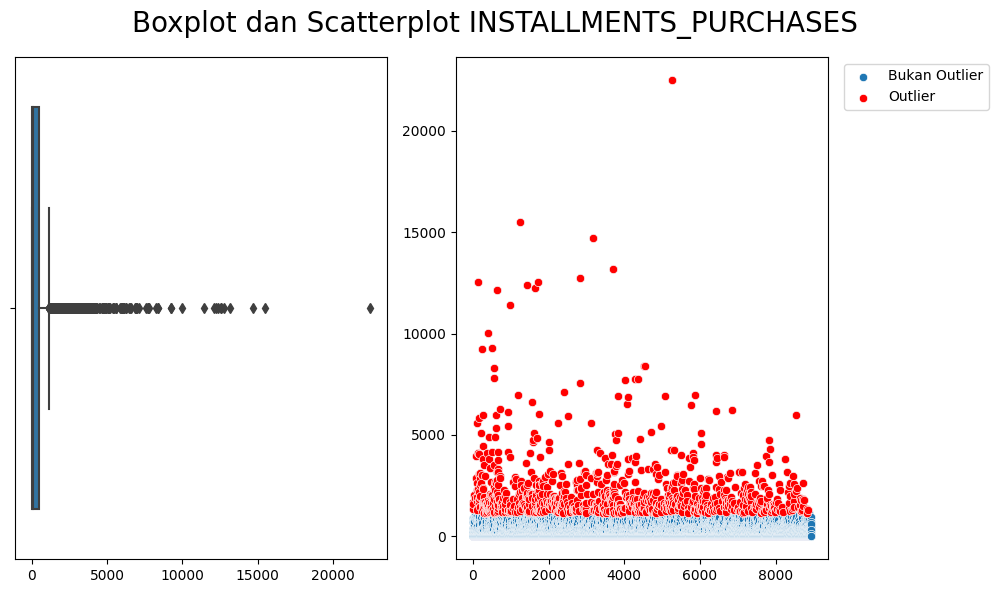

In [22]:
# Attribute INSTALLMENTS_PURCHASES

Outliers('INSTALLMENTS_PURCHASES')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'INSTALLMENTS_PURCHASES' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'INSTALLMENTS_PURCHASES'.

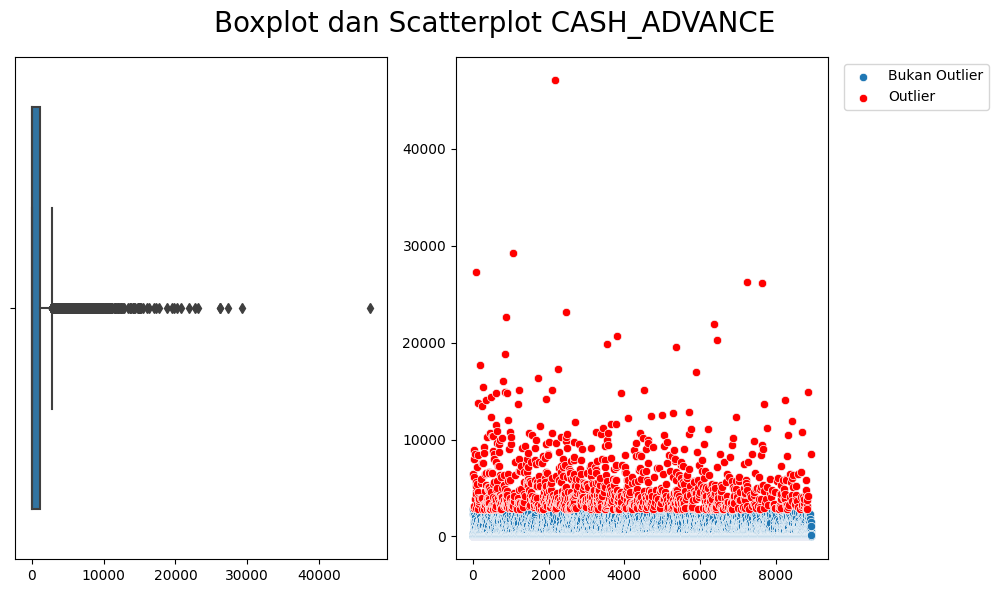

In [23]:
# Attribute CASH_ADVANCE

Outliers('CASH_ADVANCE')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'CASH_ADVANCE' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'CASH_ADVANCE'.

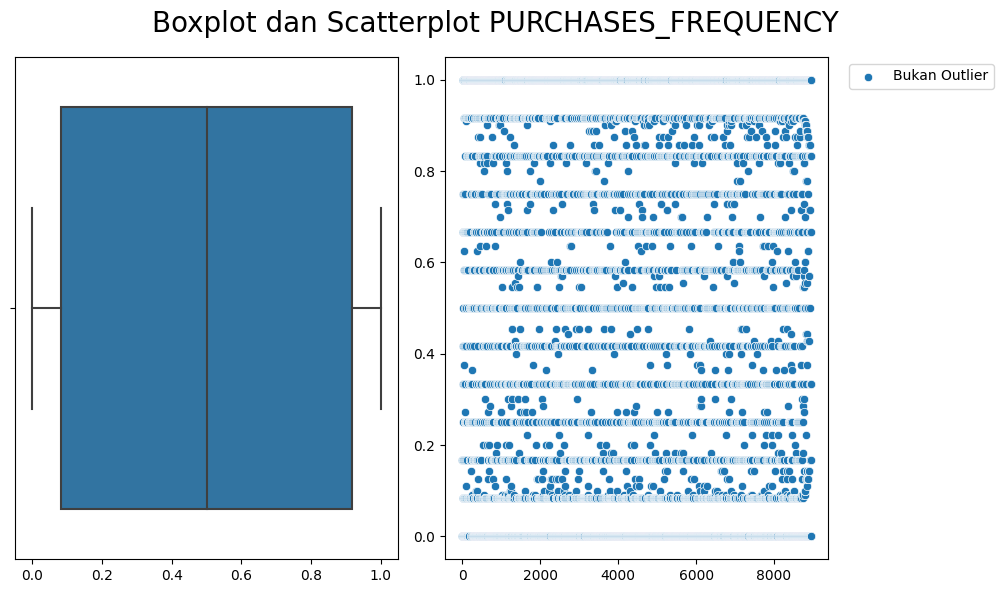

In [24]:
# Attribute PURCHASES_FREQUENCY

Outliers('PURCHASES_FREQUENCY')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'PURCHASES_FREQUENCY' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut biru mewakili data yang tidak dianggap sebagai outlier, yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'PURCHASES_FREQUENCY'.

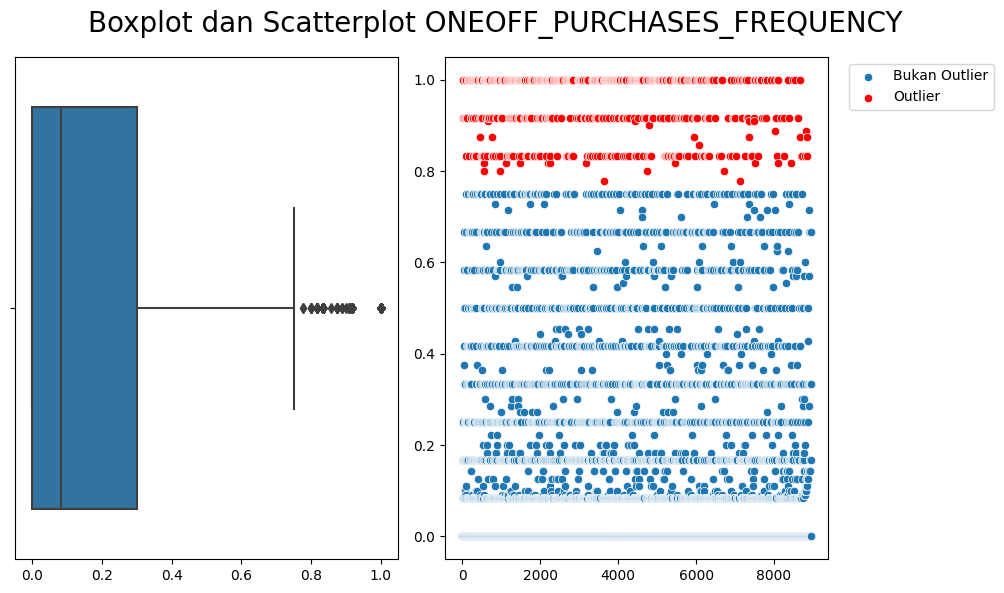

In [25]:
# Attribute ONEOFF_PURCHASES_FREQUENCY

Outliers('ONEOFF_PURCHASES_FREQUENCY')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'ONEOFF_PURCHASES_FREQUENCY' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'ONEOFF_PURCHASES_FREQUENCY'.

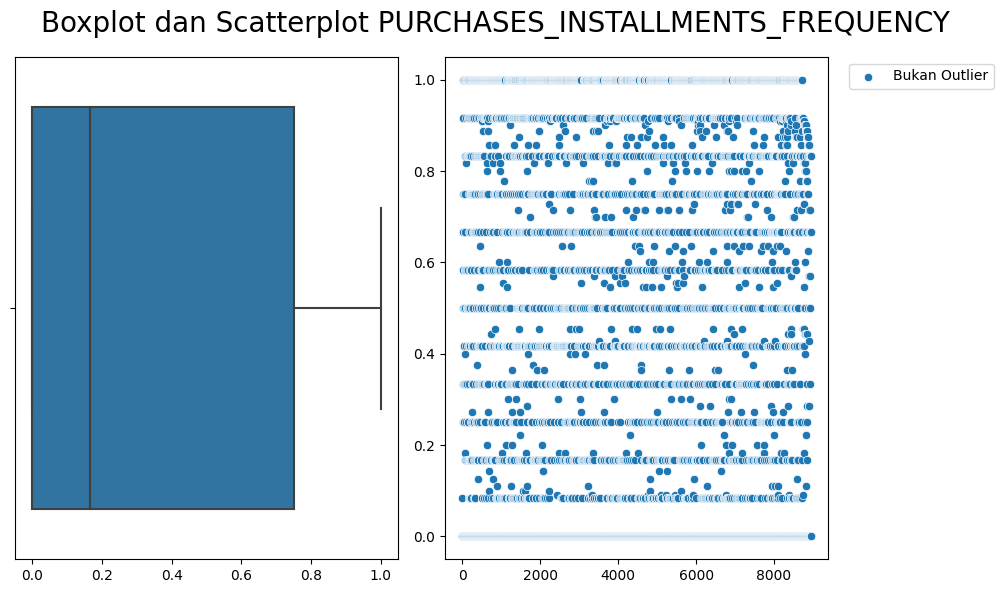

In [26]:
# Attribute PURCHASES_INSTALLMENTS_FREQUENCY

Outliers('PURCHASES_INSTALLMENTS_FREQUENCY')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'PURCHASES_INSTALLMENTS_FREQUENCY' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut biru mewakili data yang tidak dianggap sebagai outlier, yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'PURCHASES_INSTALLMENTS_FREQUENCY'.

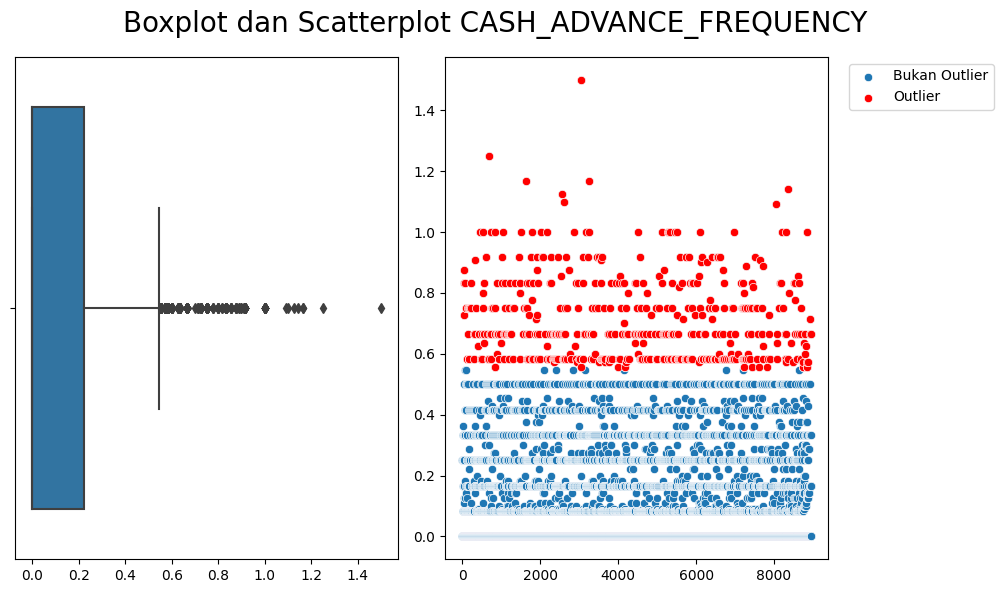

In [27]:
# Attribute CASH_ADVANCE_FREQUENCY

Outliers('CASH_ADVANCE_FREQUENCY')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'CASH_ADVANCE_FREQUENCY' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'CASH_ADVANCE_FREQUENCY'.

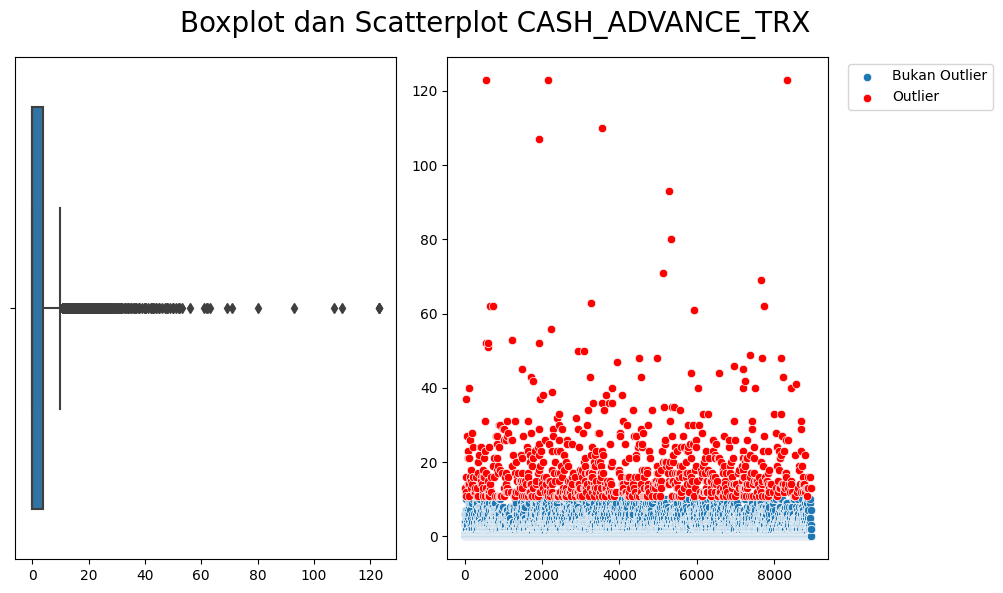

In [28]:
# Attribute CASH_ADVANCE_TRX

Outliers('CASH_ADVANCE_TRX')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'CASH_ADVANCE_TRX' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'CASH_ADVANCE_TRX'.

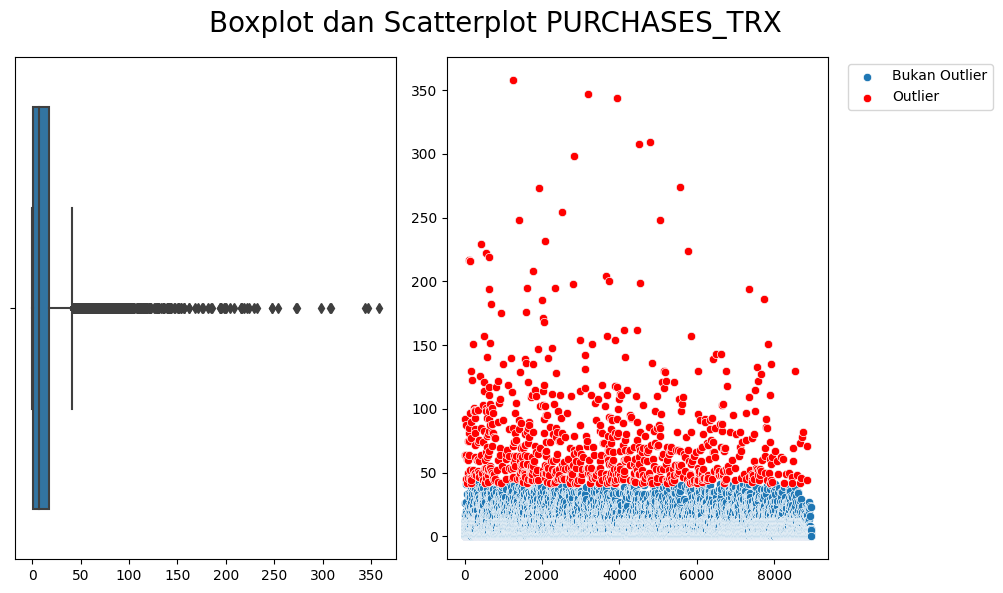

In [29]:
# Attribute PURCHASES_TRX

Outliers('PURCHASES_TRX')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'PURCHASES_TRX' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'PURCHASES_TRX'.

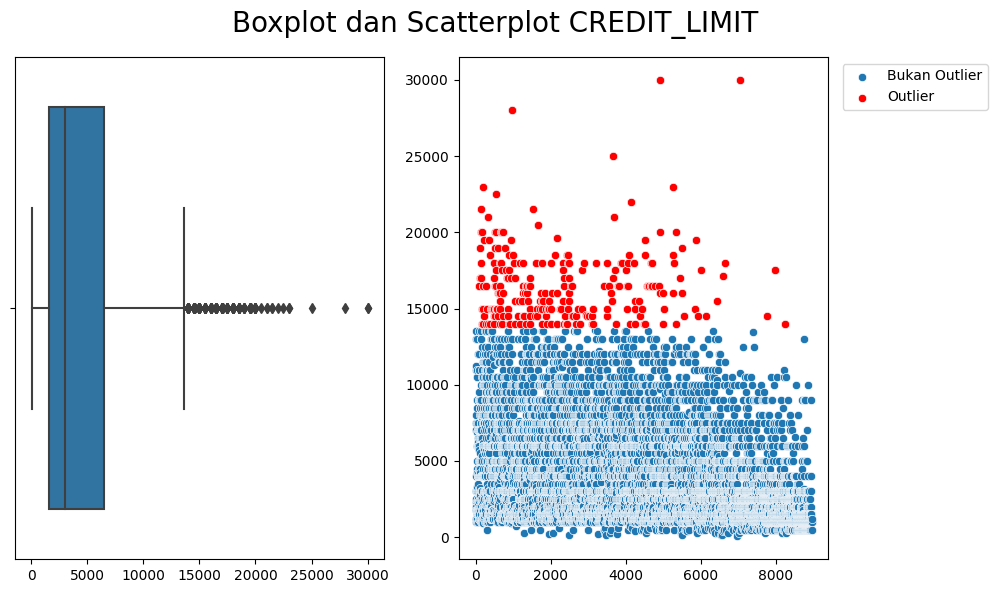

In [30]:
# Attribute CREDIT_LIMIT

Outliers('CREDIT_LIMIT')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'CREDIT_LIMIT' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'CREDIT_LIMIT'.

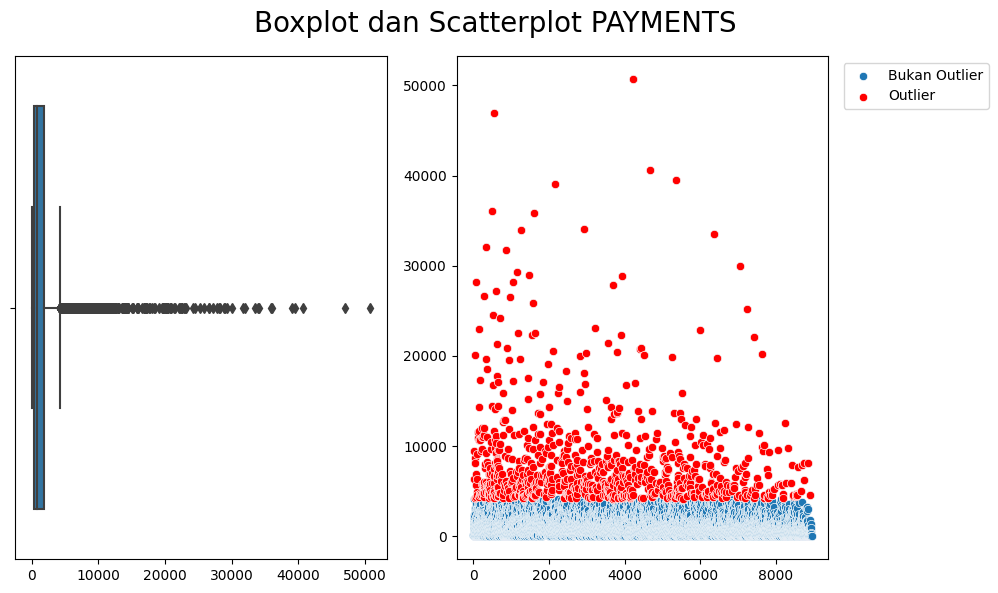

In [31]:
# Attribute PAYMENTS

Outliers('PAYMENTS')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'PAYMENTS' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'PAYMENTS'.

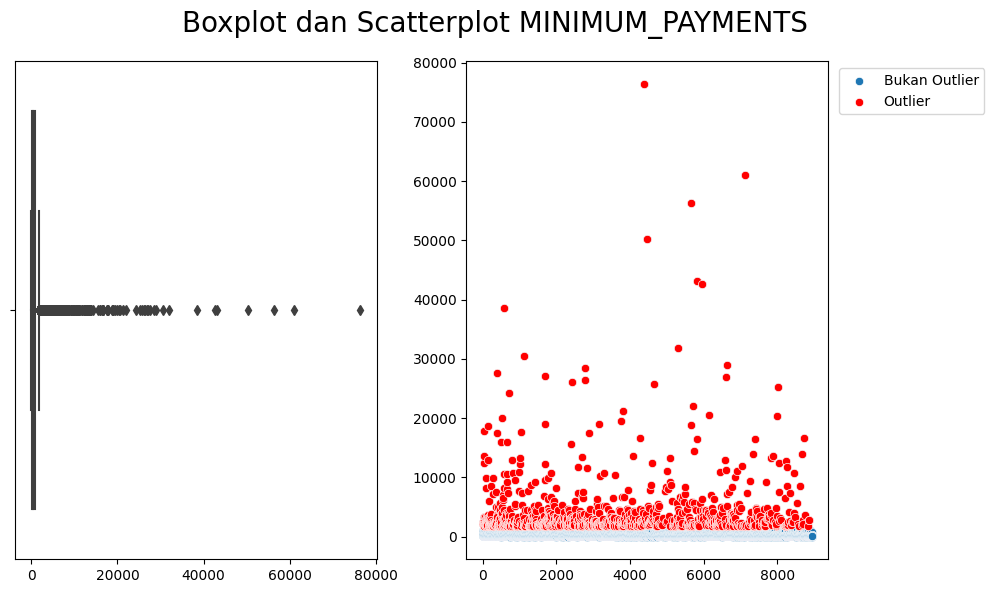

In [32]:
# Attribute MINIMUM_PAYMENTS

Outliers('MINIMUM_PAYMENTS')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'MINIMUM_PAYMENTS' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'MINIMUM_PAYMENTS'.

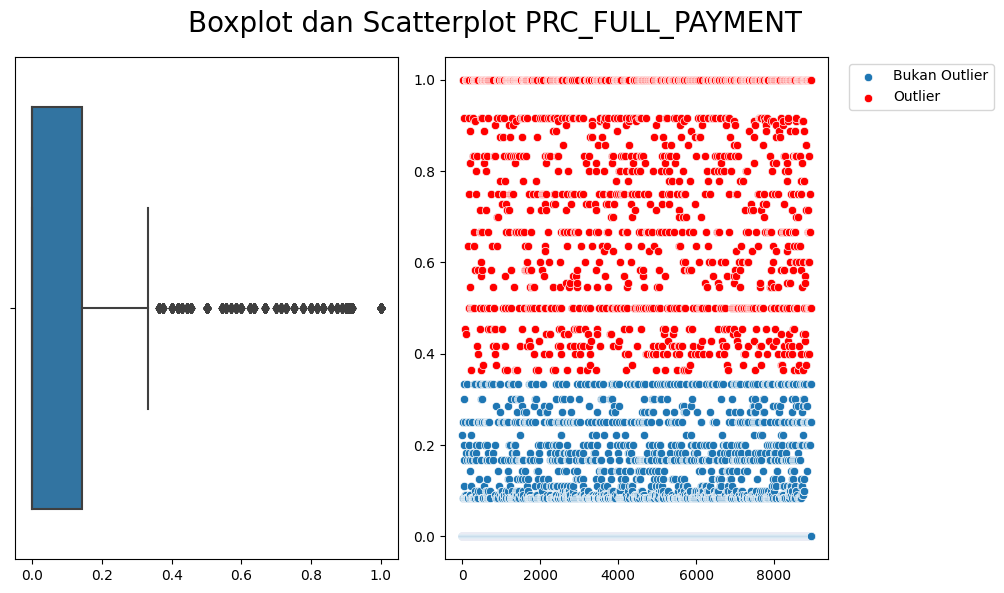

In [33]:
# Attribute PRC_FULL_PAYMENT

Outliers('PRC_FULL_PAYMENT')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'PRC_FULL_PAYMENT' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'PRC_FULL_PAYMENT'.

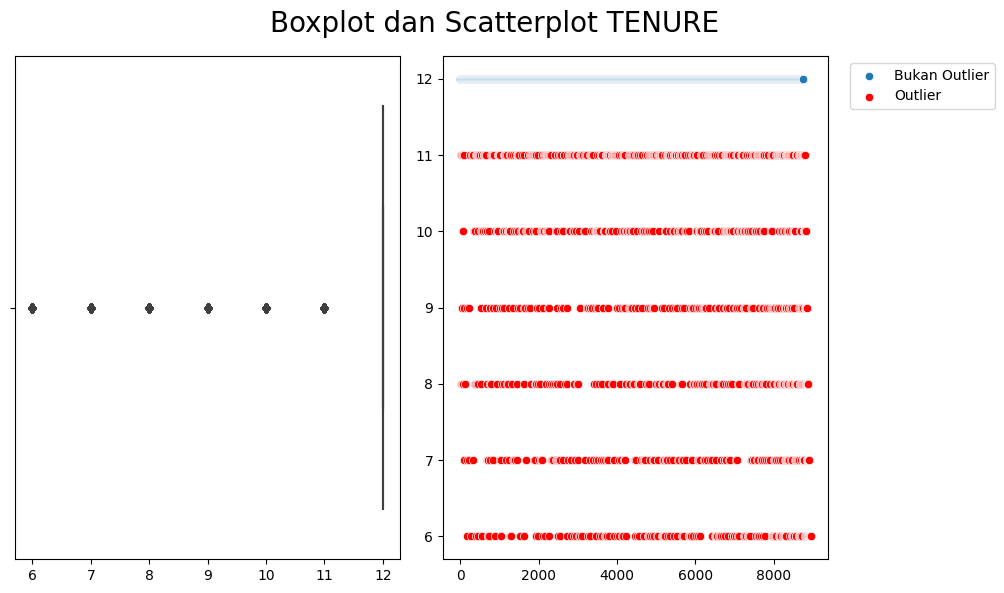

In [34]:
# Attribute TENURE

Outliers('TENURE')

Boxplot diatas menggambarkan sebaran data dan deteksi outlier pada atribut 'TENURE' dalam dataset pengguna kartu kredit. Pada boxplot, titik-titik di luar batas atas dan batas bawah menandai data-data yang dianggap sebagai outlier. Scatterplot (titik-titik) ditampilkan untuk memperlihatkan distribusi nilai-nilai outlier dalam data tersebut merah sebagai representasi outlier yang dapat memberikan pemahaman lebih baik mengenai letak dan distribusi outlier terhadap keseluruhan data. Ini membantu dalam memahami persebaran nilai-nilai yang signifikan secara statistik dan visual pada atribut 'TENURE'.

###### Boxplot

Pada intinya, boxplot diatas untuk visualisasi outlier dalam hubungannya dengan data lainnya memungkinkan pemahaman yang lebih baik terhadap distribusi dan pola data yang mencurigakan. Dengan demikian, analisis ini memungkinkan untuk menemukan pola atau transaksi yang tidak biasa dalam saldo pengguna kartu kredit yang mungkin memerlukan perhatian lebih lanjut, seperti potensi penipuan atau kegiatan tidak sah.

### E.3.4 EDA dengan dtale

In [35]:
dtale.show(df)

dtale merupakan sebuah tampilan interaktif dari dataset secara terperinci, dengan tabel, grafik, dan statistik deskriptif yang memudahkan dalam pemahaman.

### E.3.5 EDA dengan sweetviz

                                             |          | [  0%]   00:00 -> (? left)


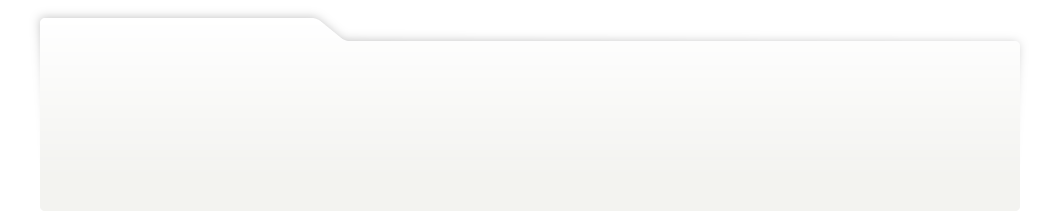
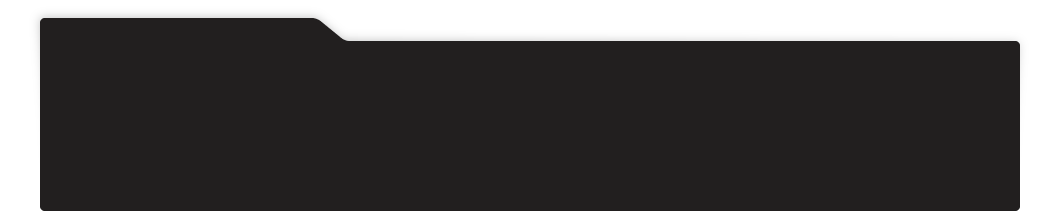
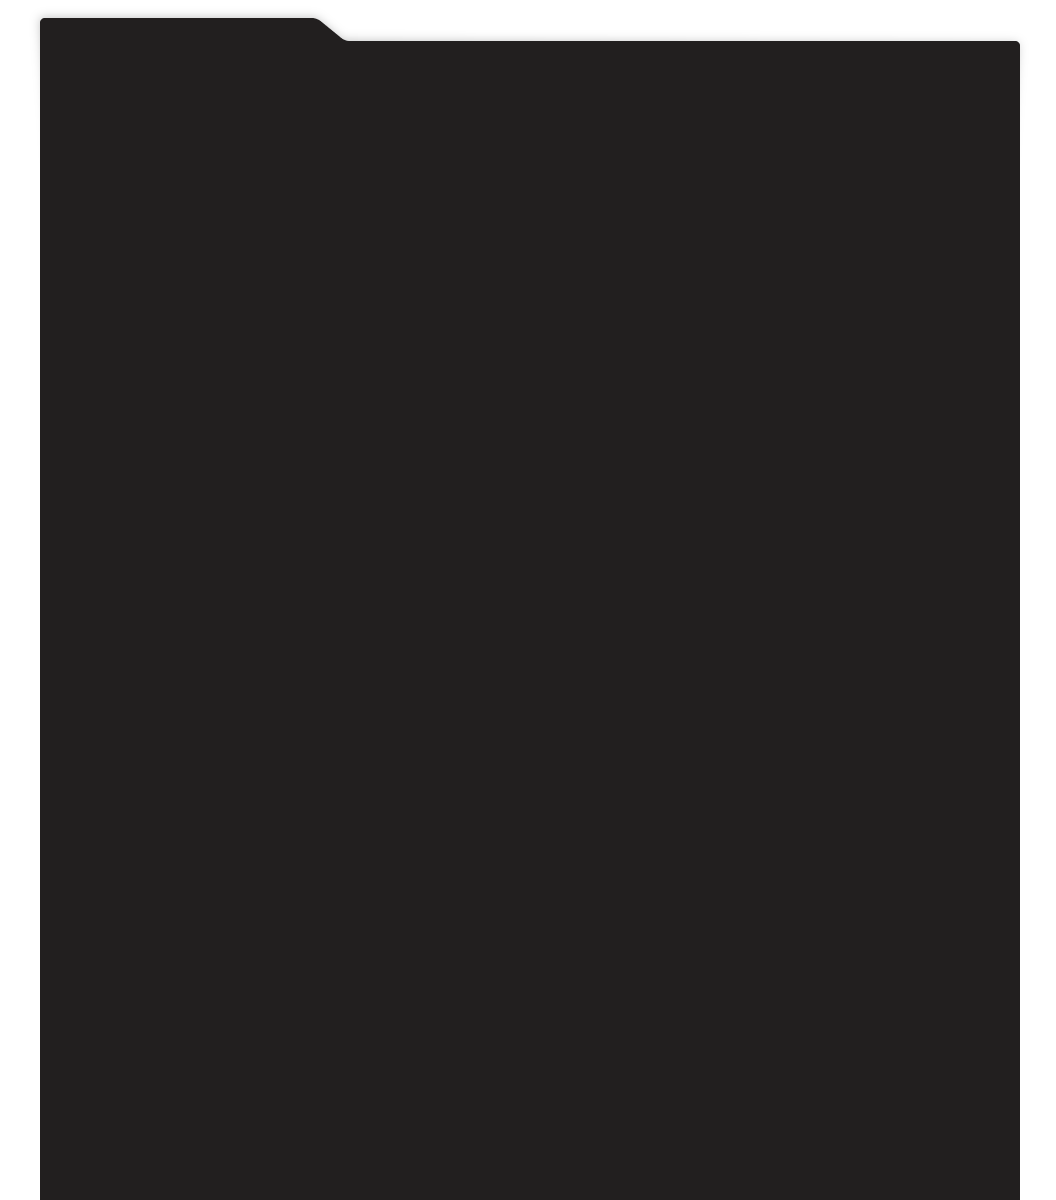
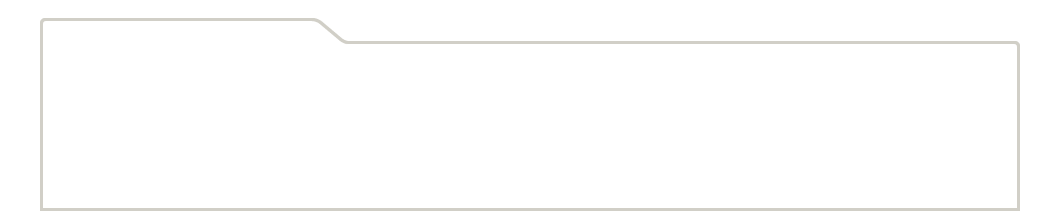
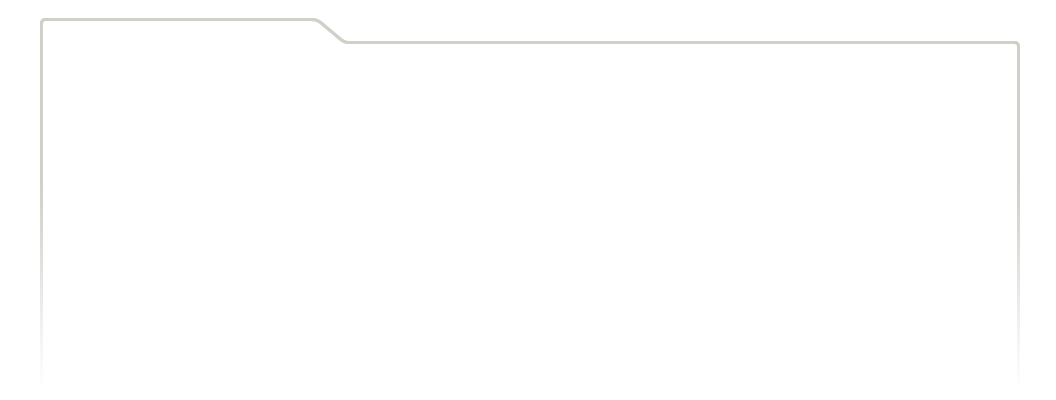
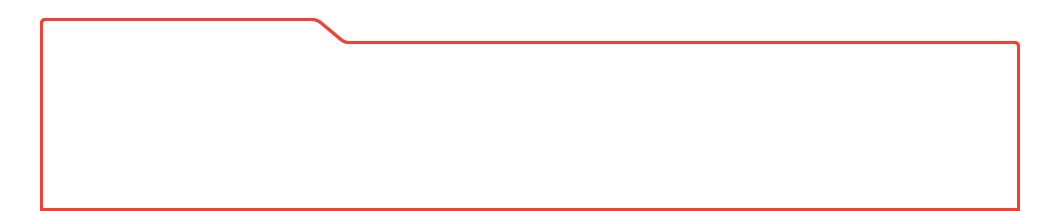
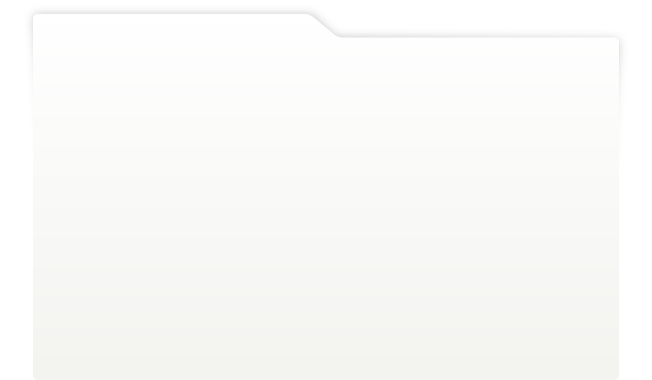
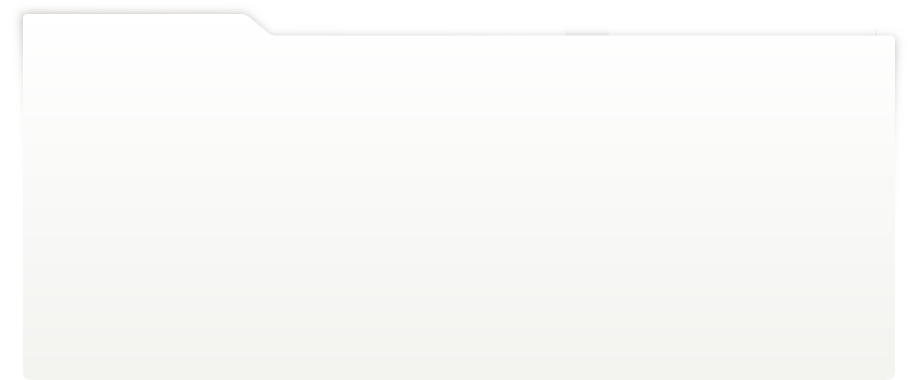
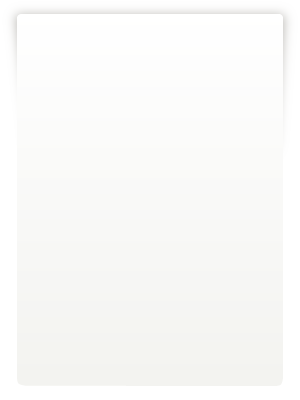
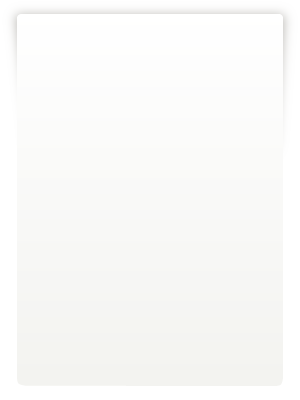
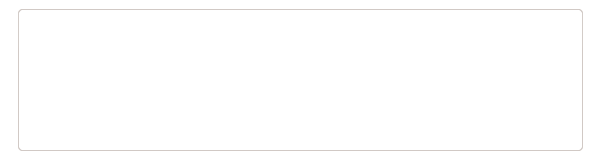
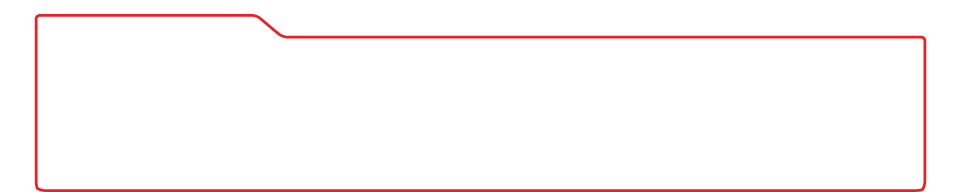
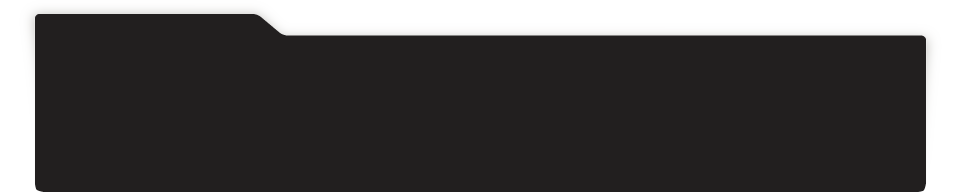
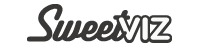
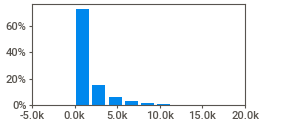
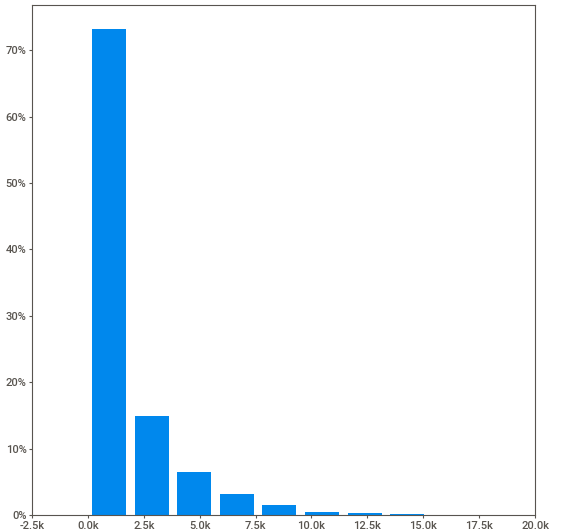
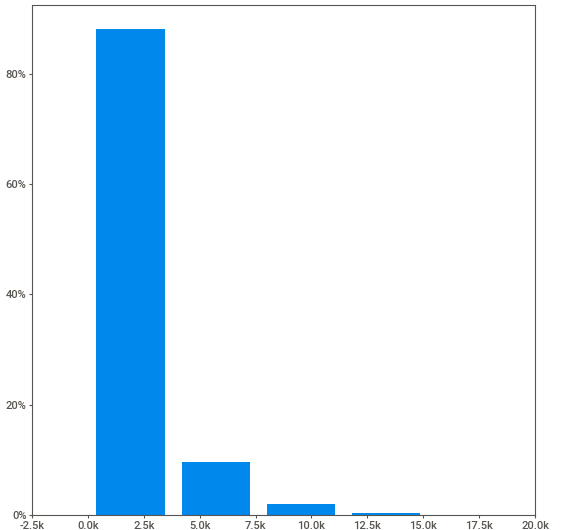
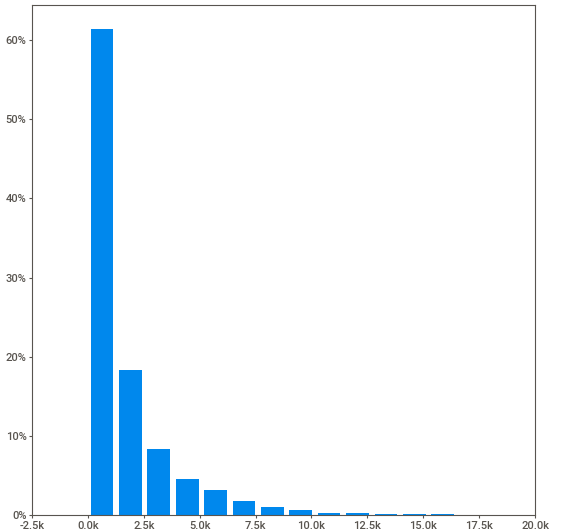
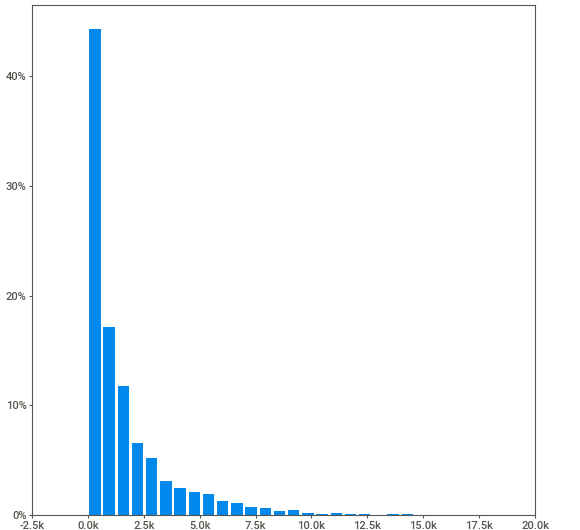
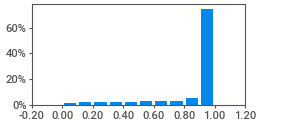
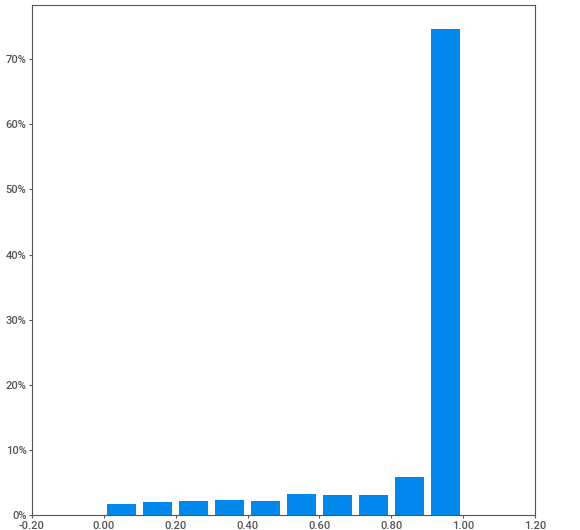
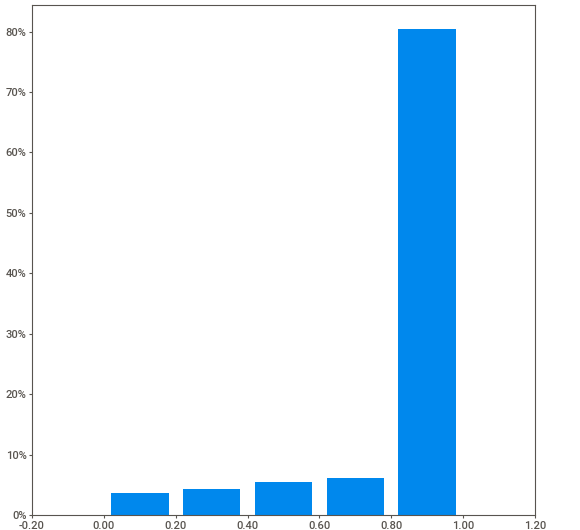
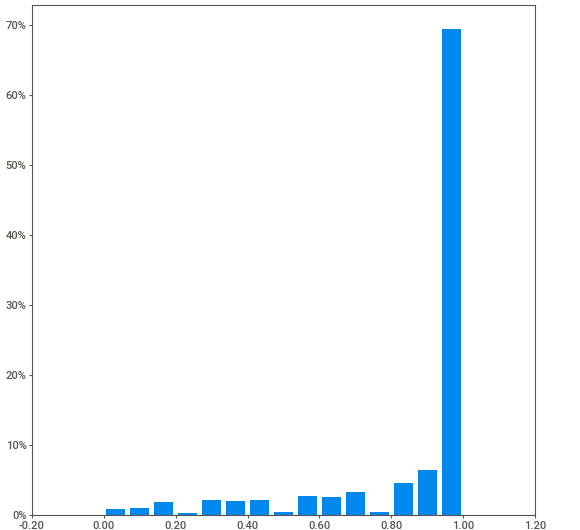
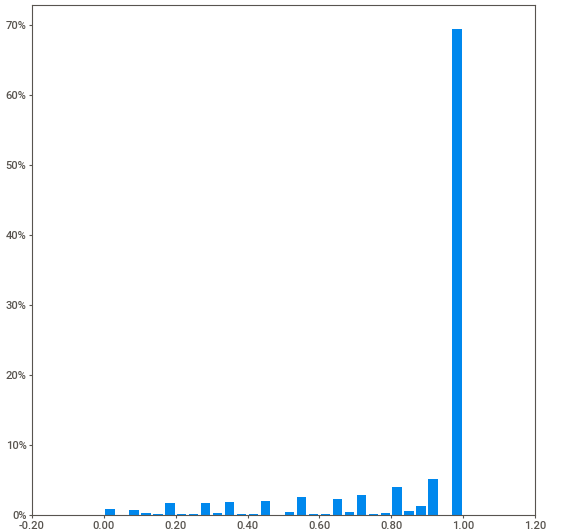
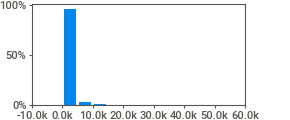
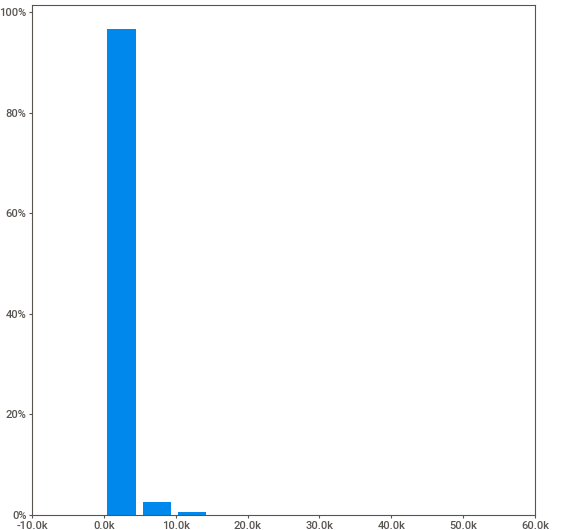
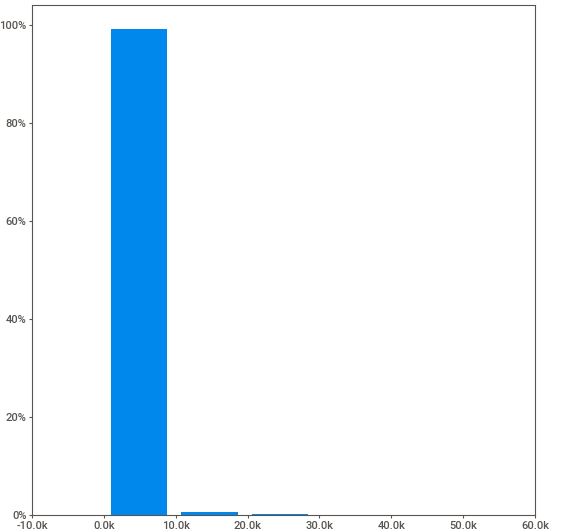
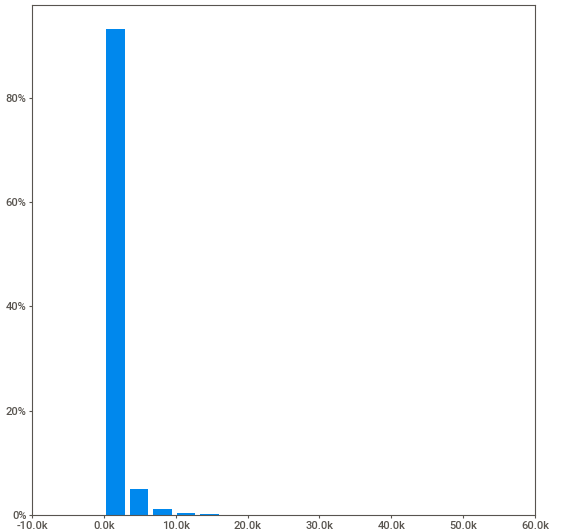
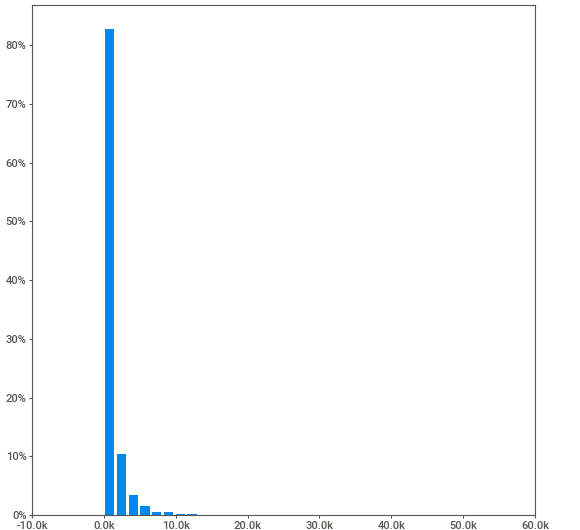
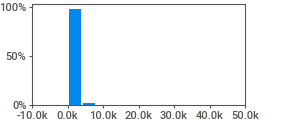
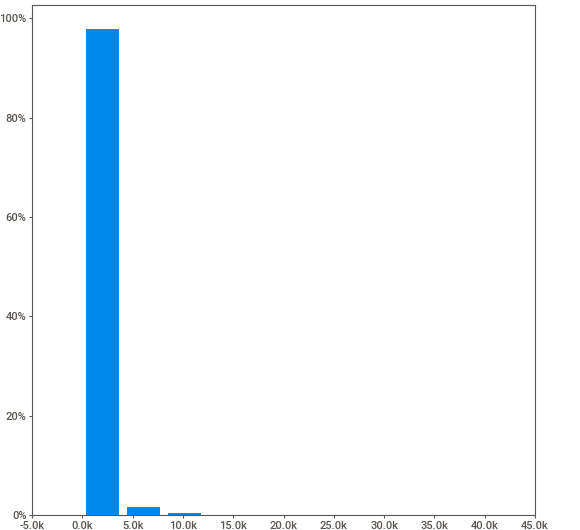
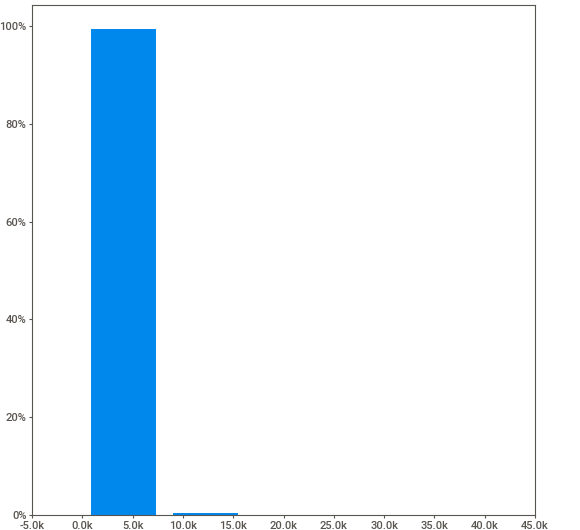
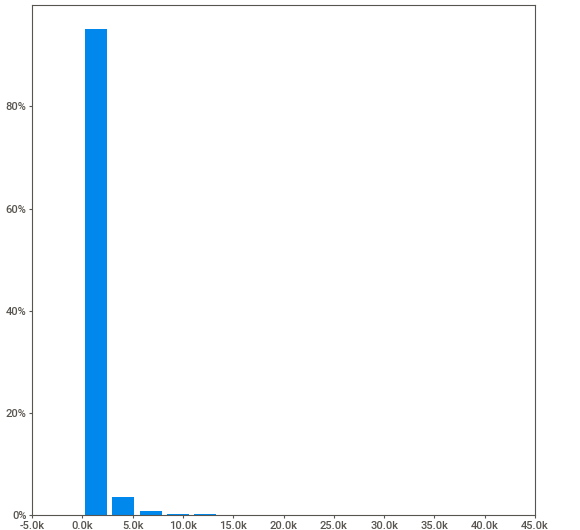
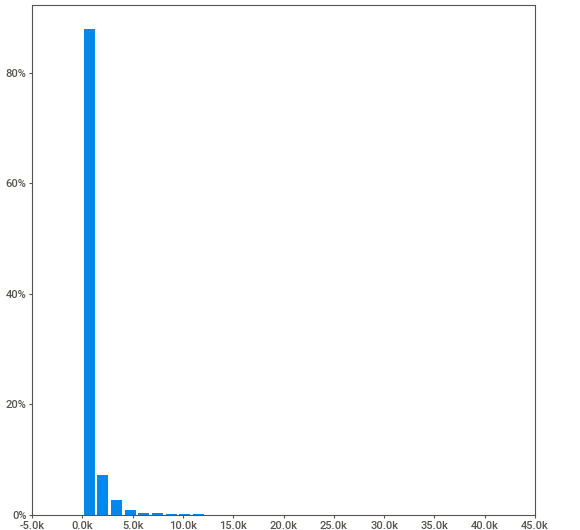
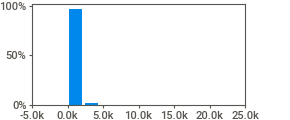
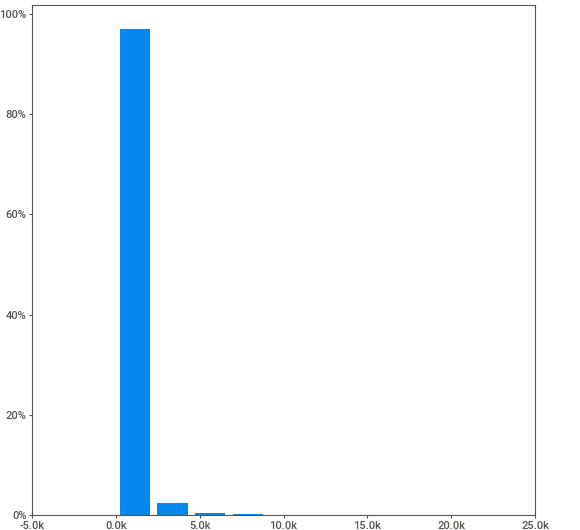
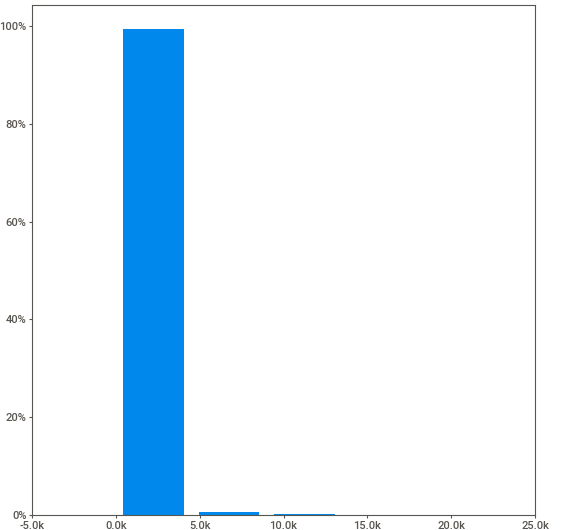
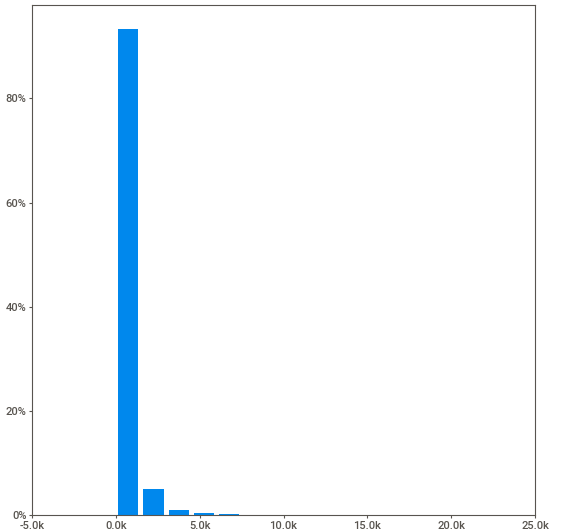
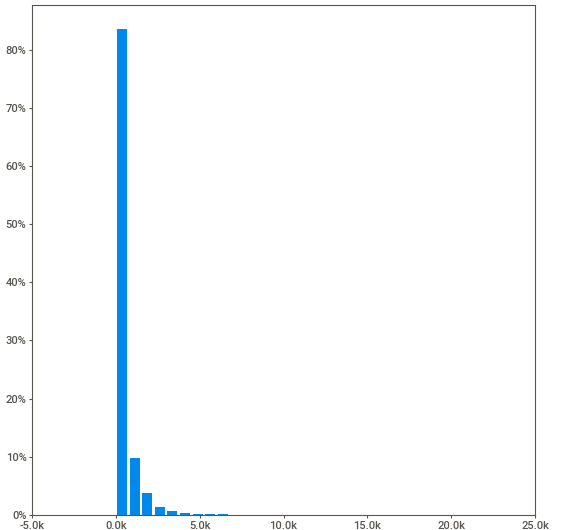
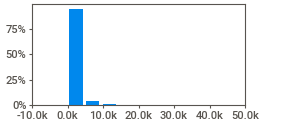
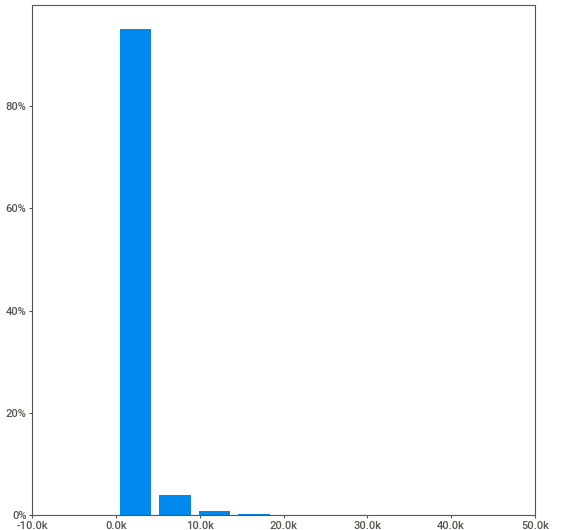
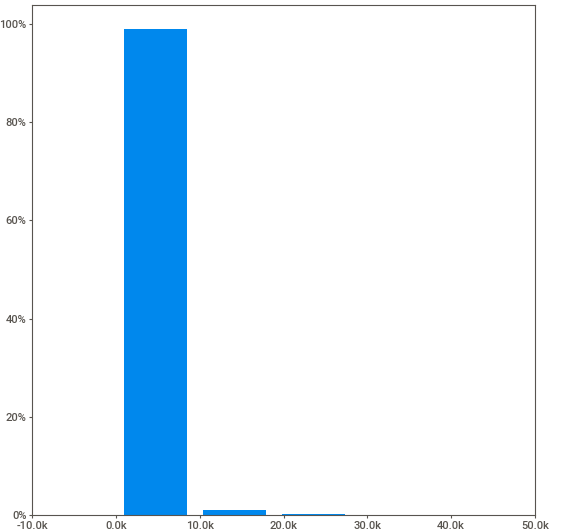
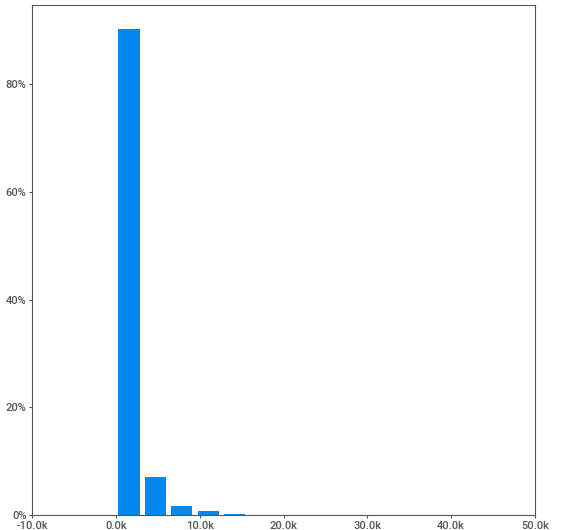
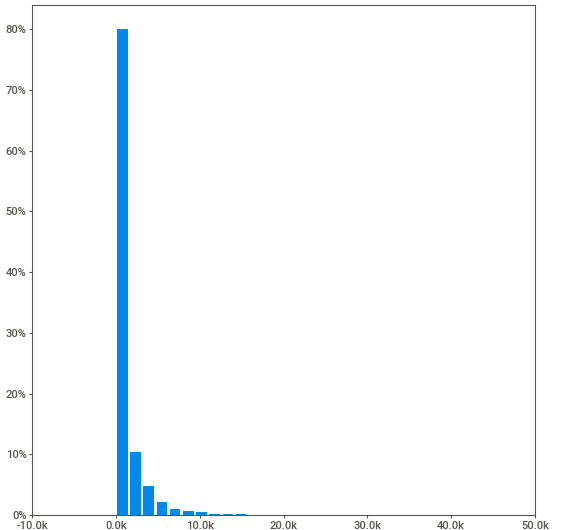
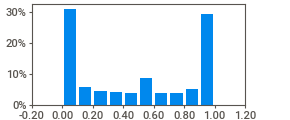
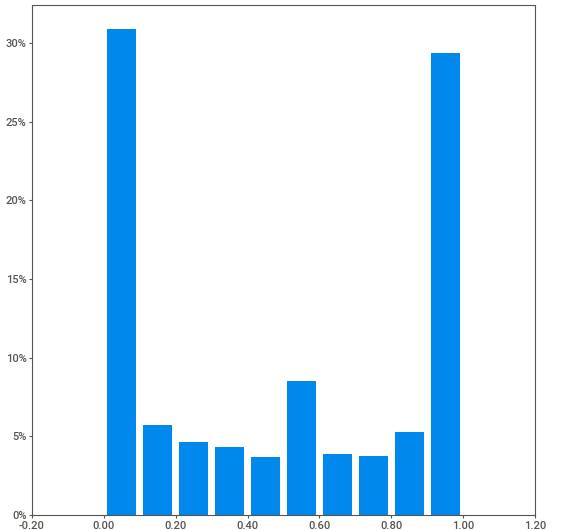
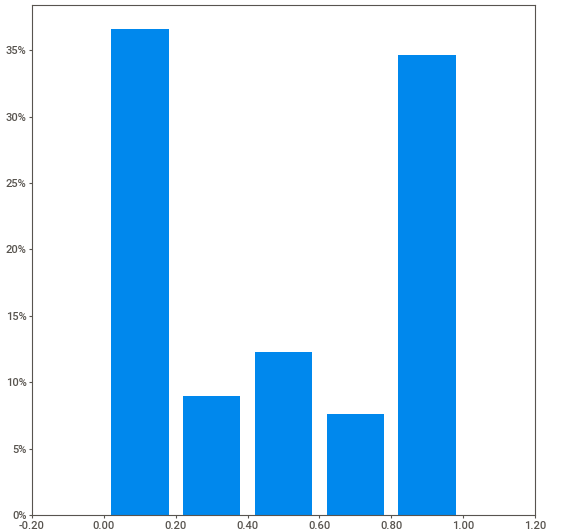
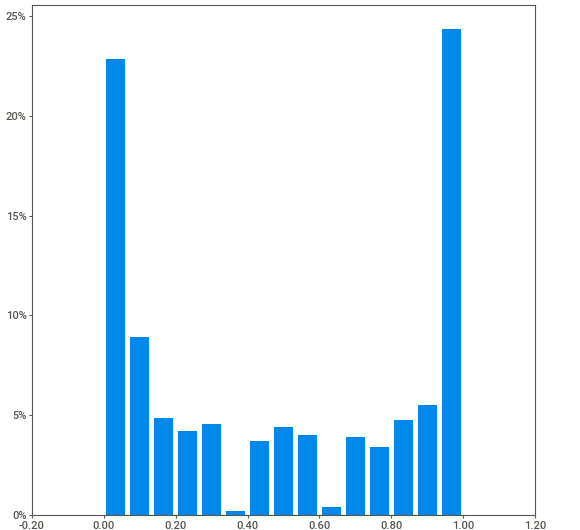
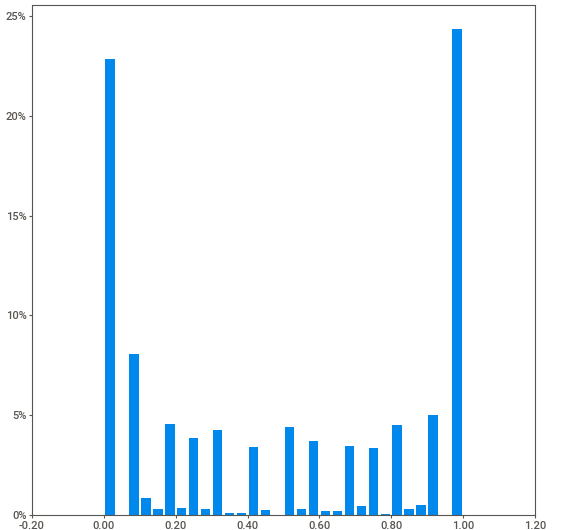
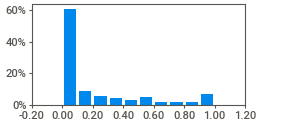
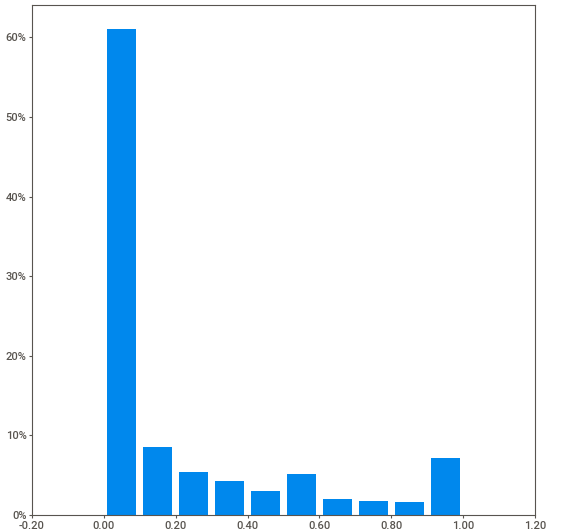
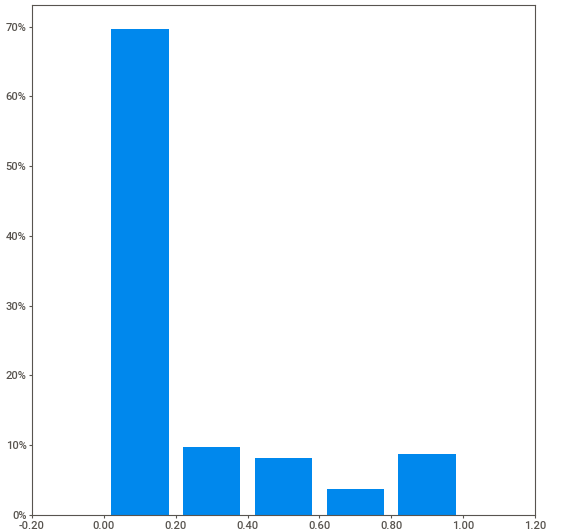
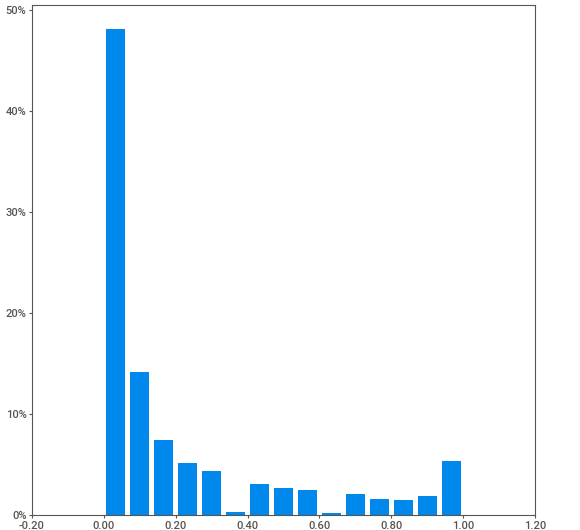
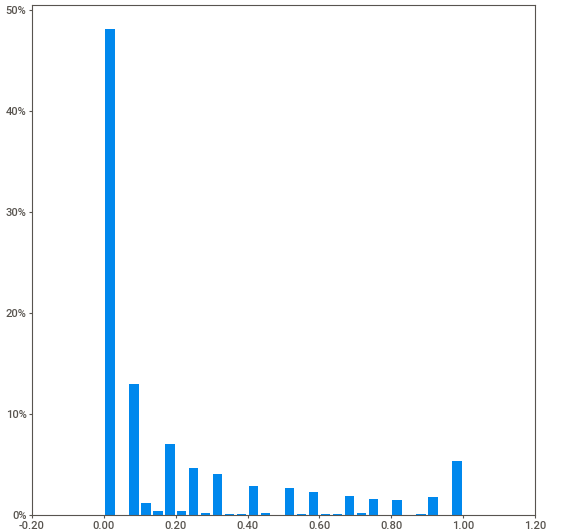
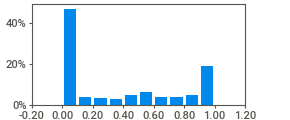
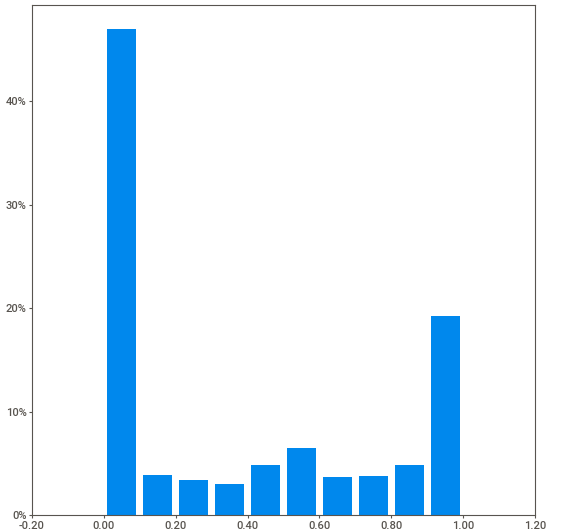
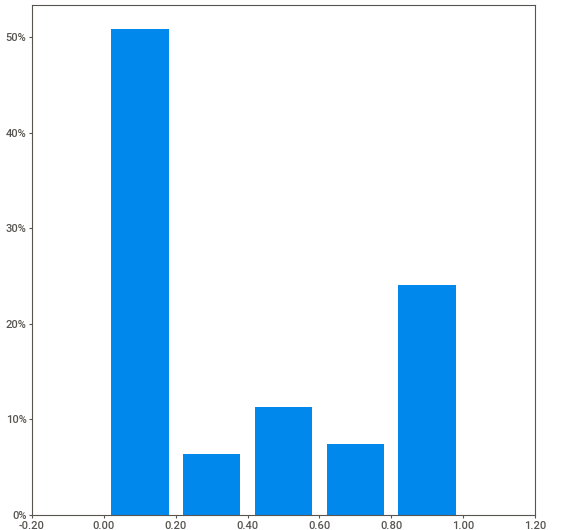
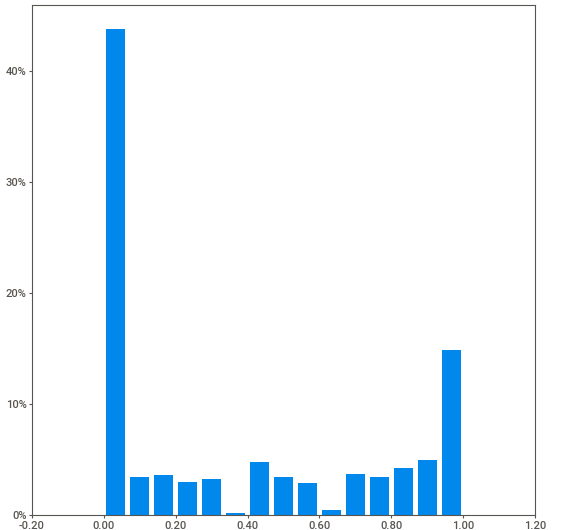
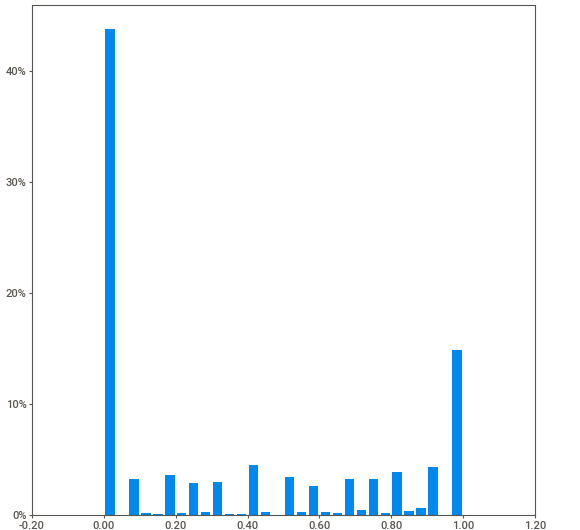
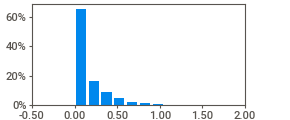
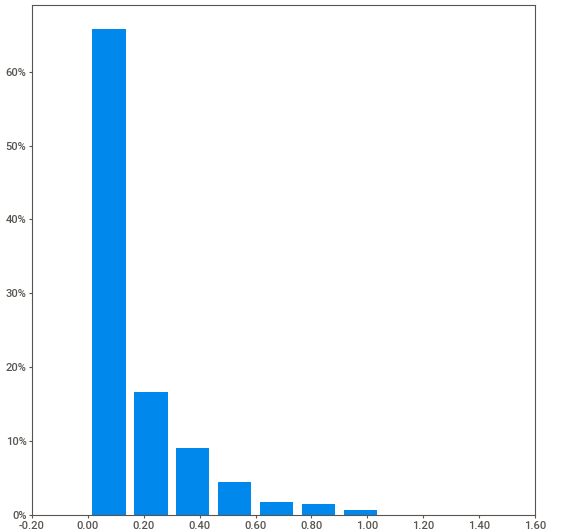
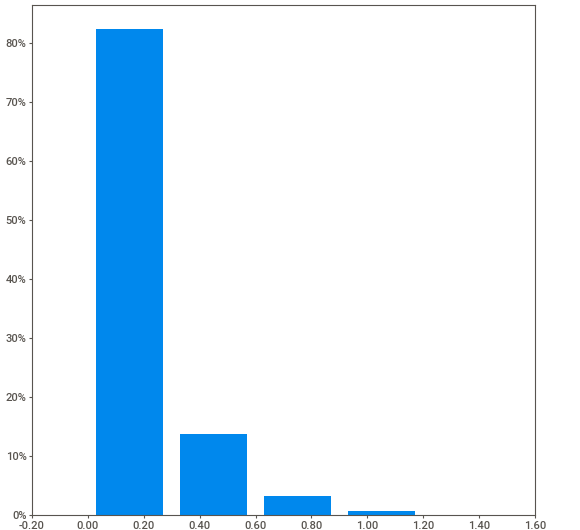
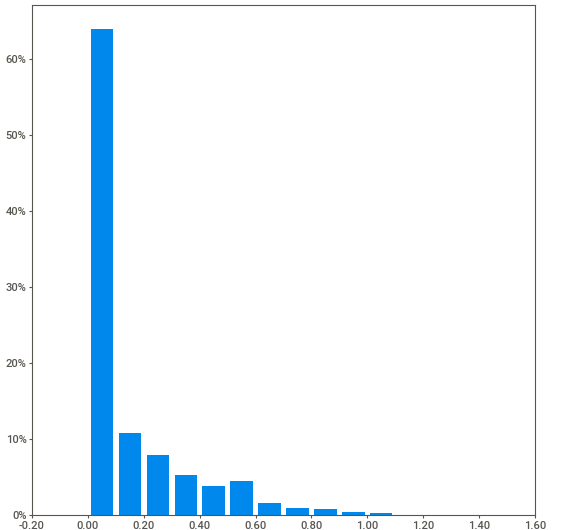
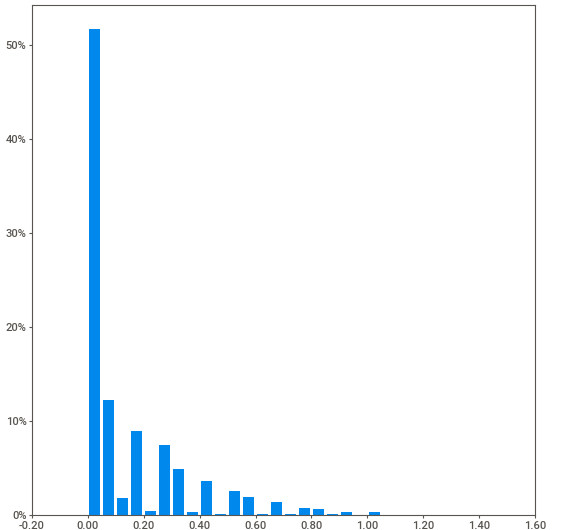
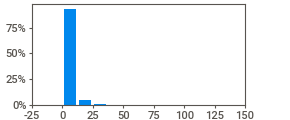
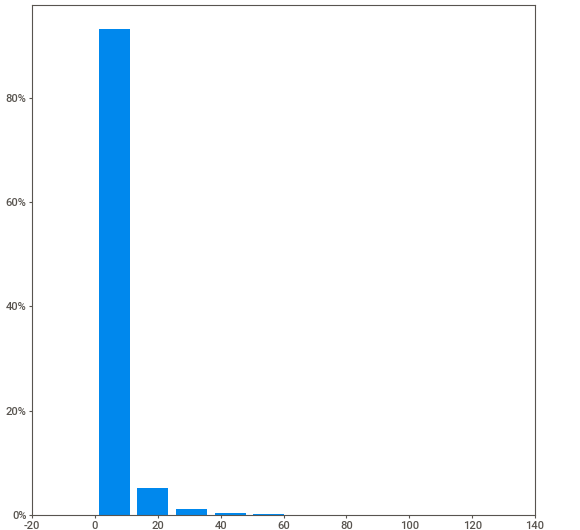
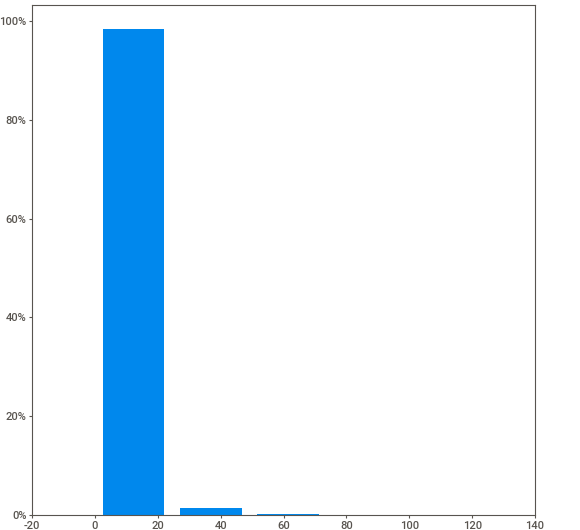
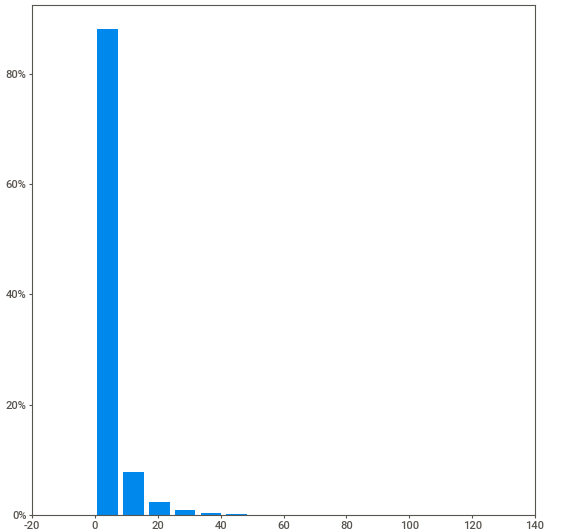
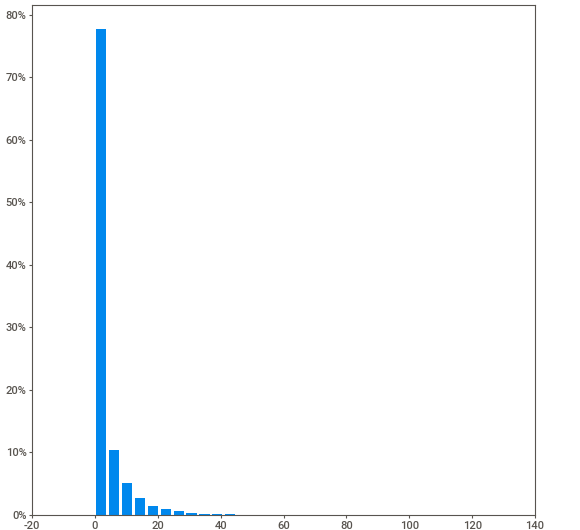
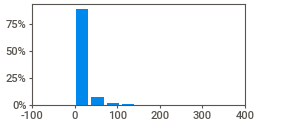
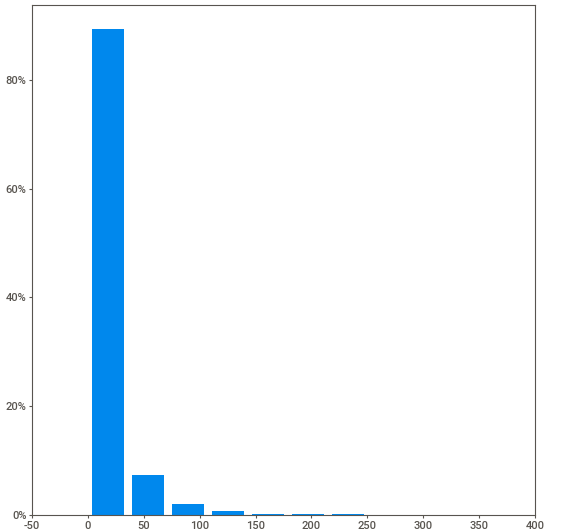
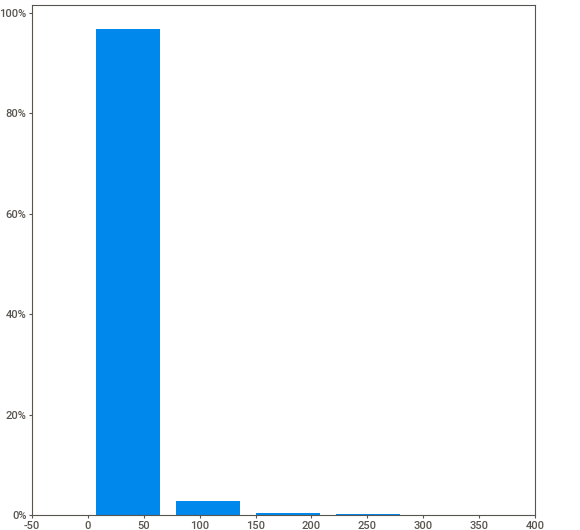
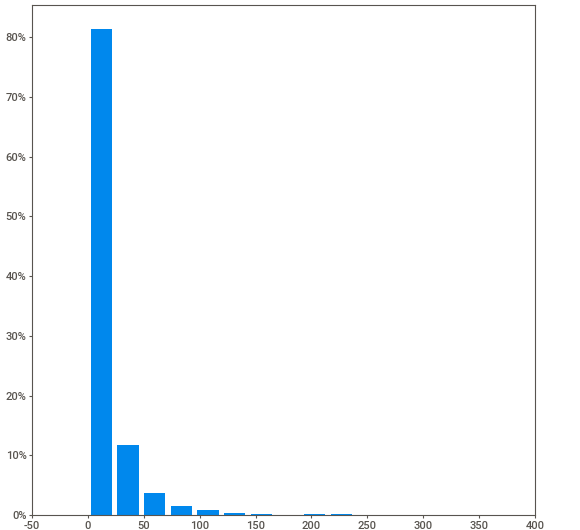
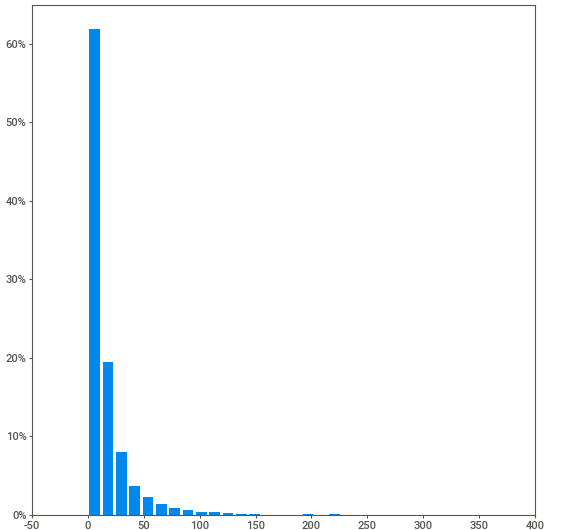
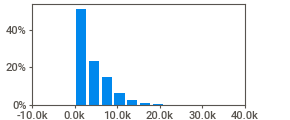
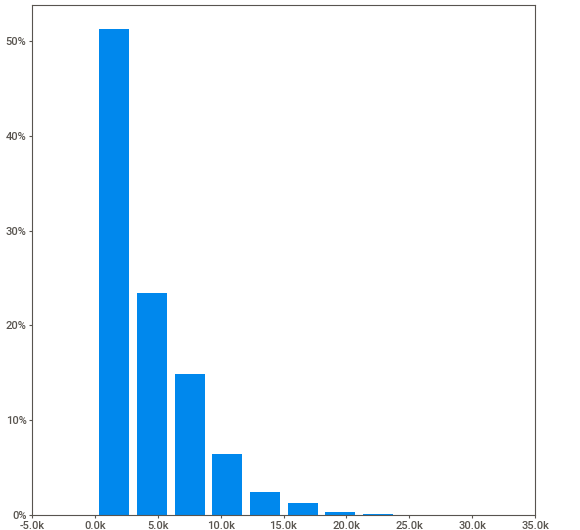
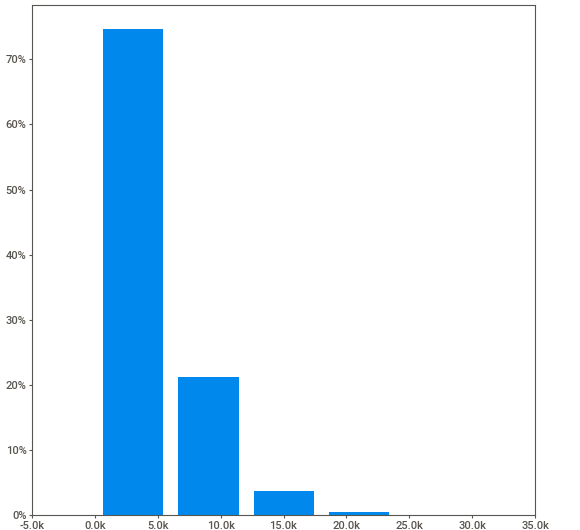
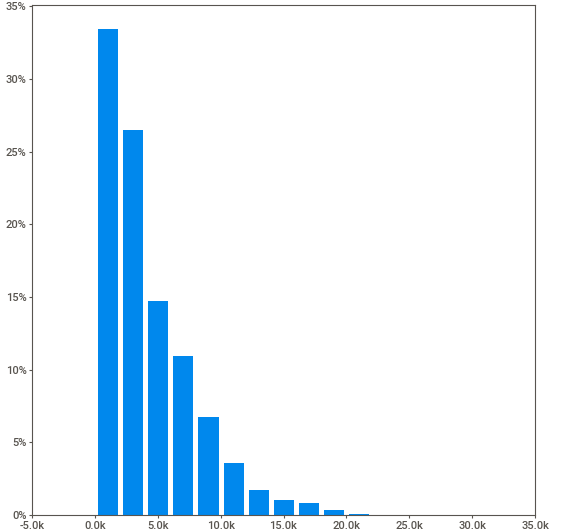
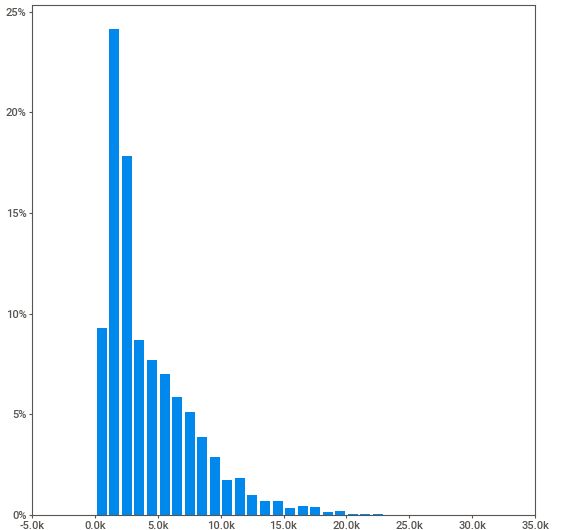
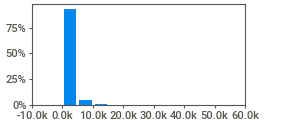
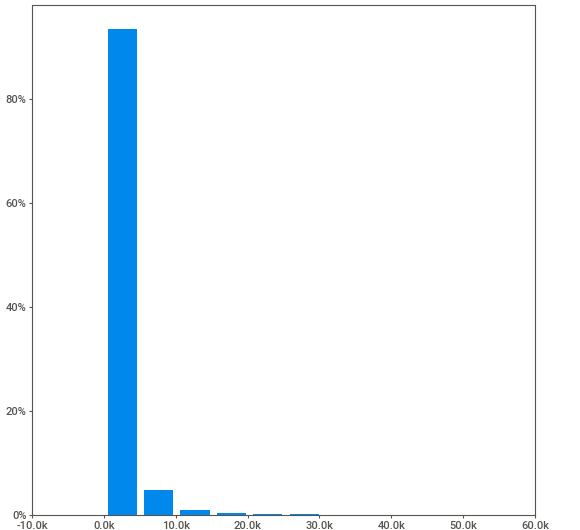
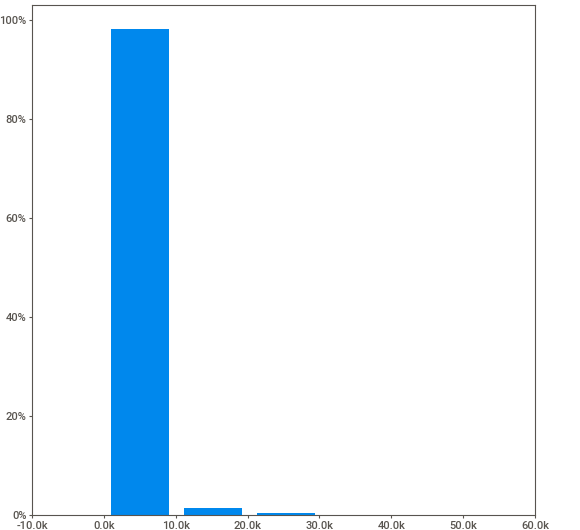
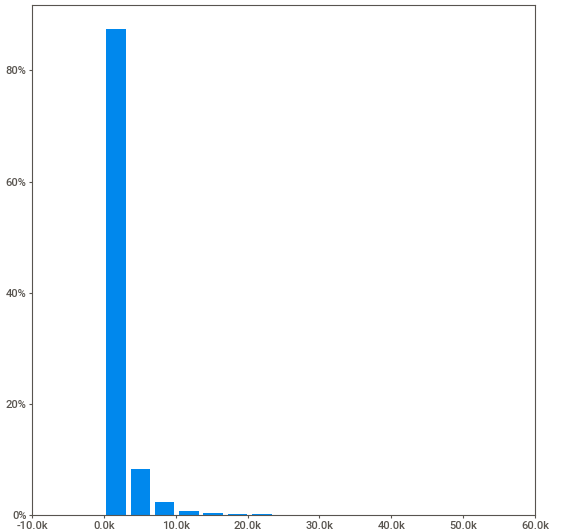
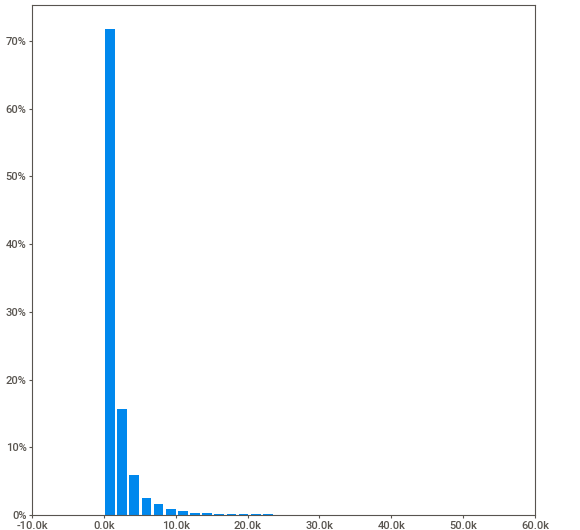
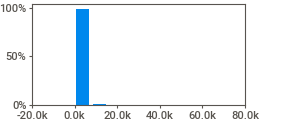
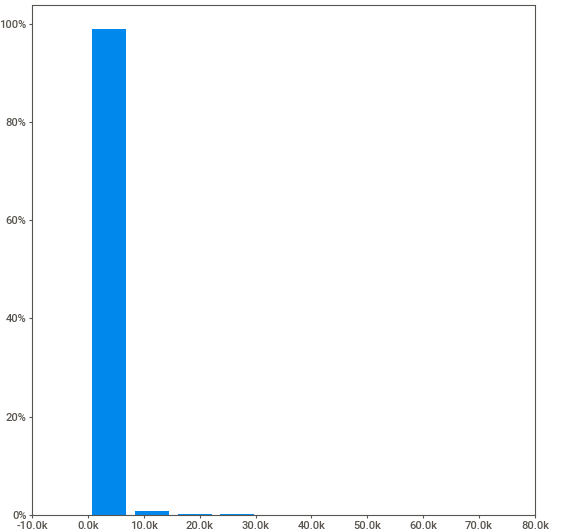
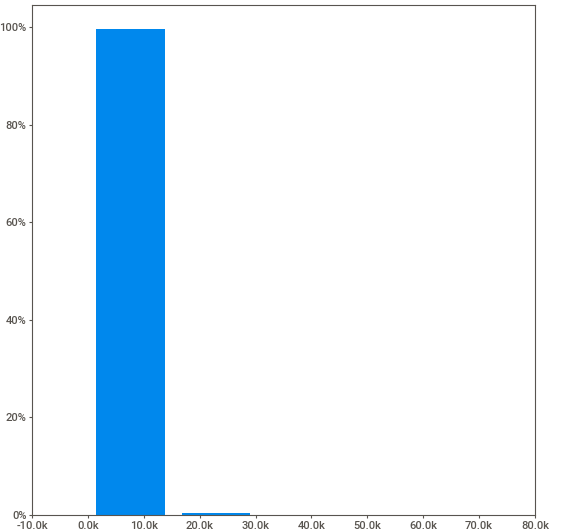
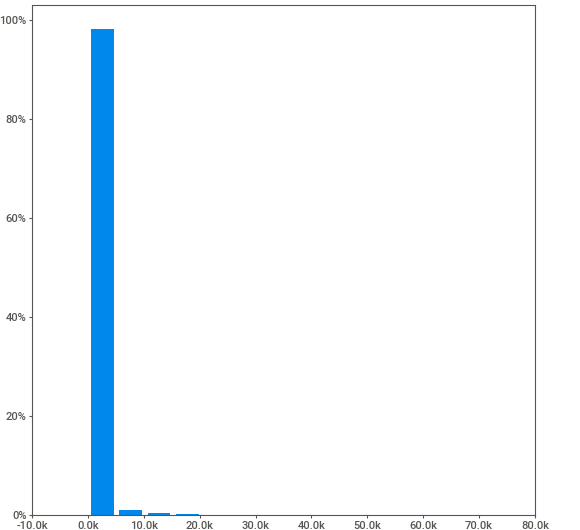
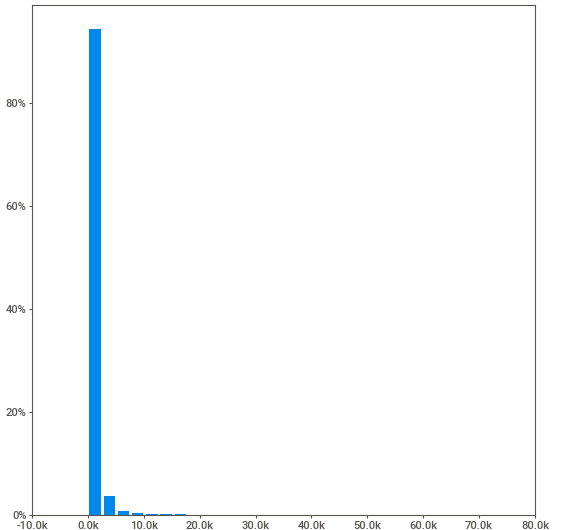
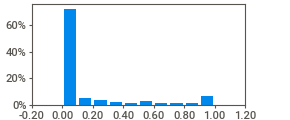
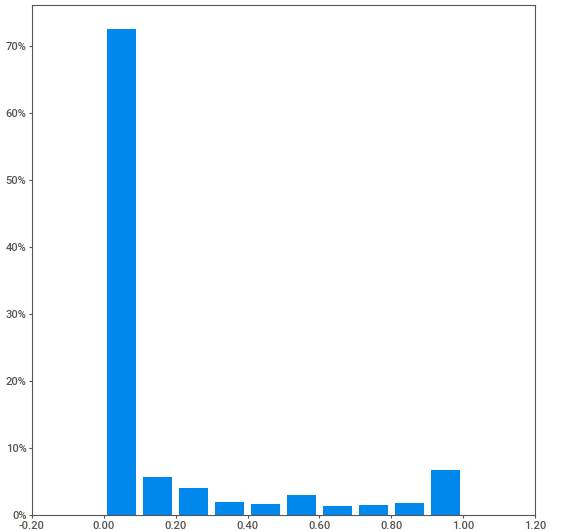
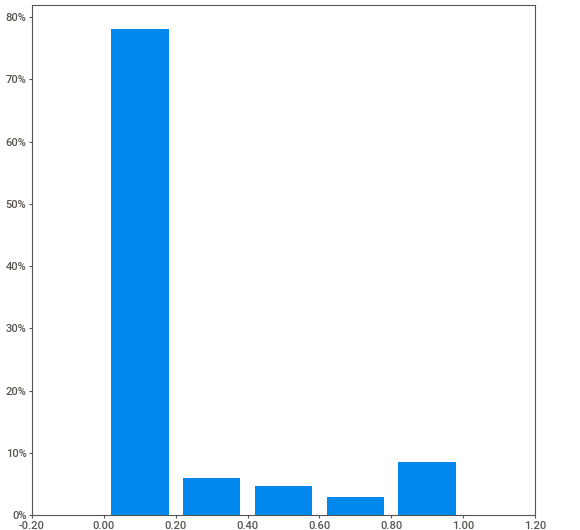
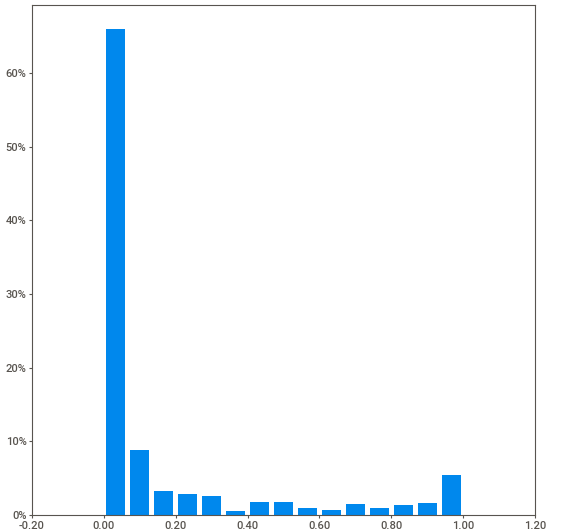
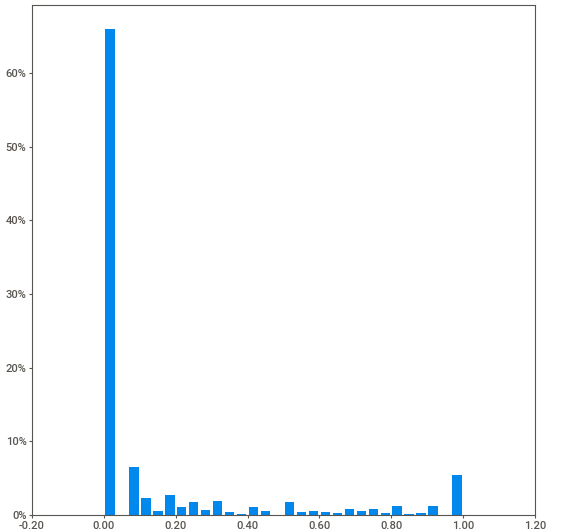
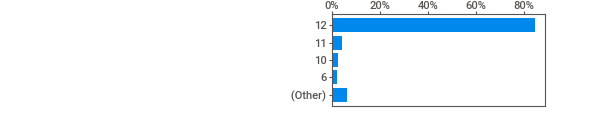
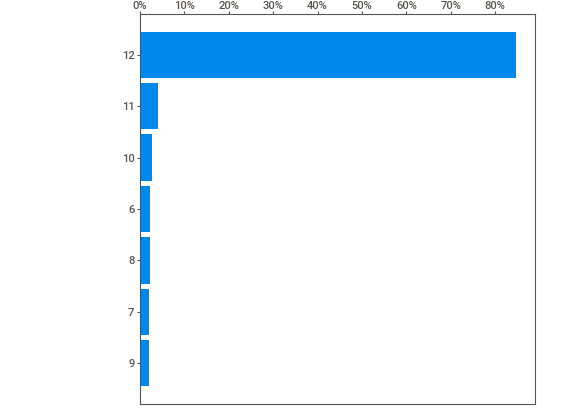
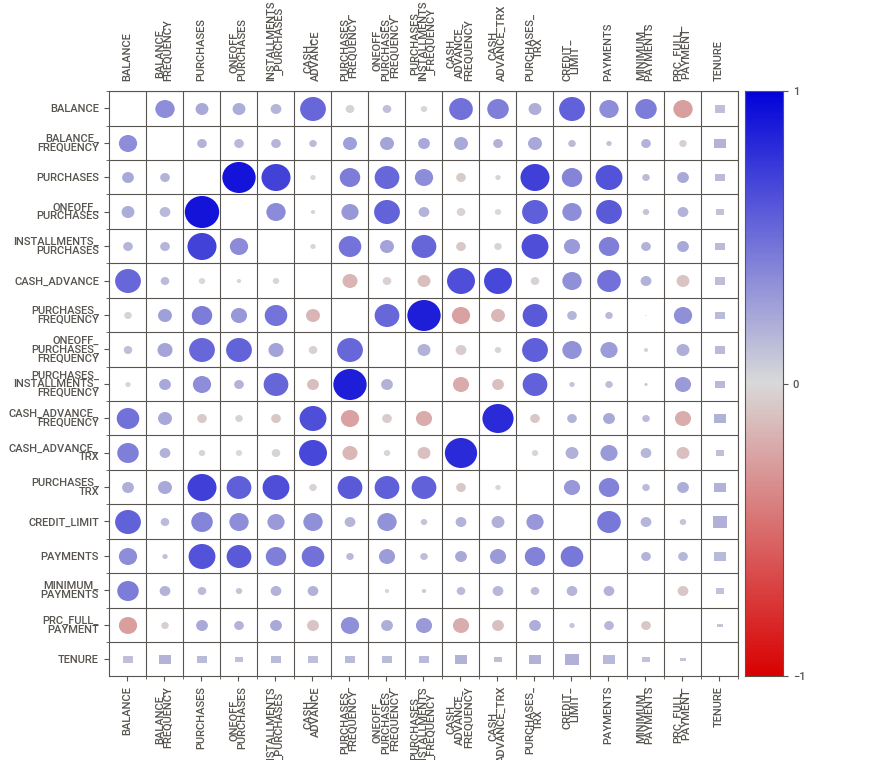
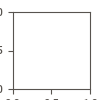

In [36]:
report = sweetviz.analyze(df)
report.show_notebook()

Sweetviz merupakan sebuah tampilan berbasis notebook yang mencakup visualisasi rinci, statistik deskriptif, dan perbandingan atribut. Kedua pendekatan ini memberikan wawasan yang kuat terhadap karakteristik dan pola dalam data pengguna kartu kredit, memungkinkan pemahaman yang lebih mendalam tentang perilaku transaksi dan penggunaannya.

# F. Data Prepocessing

## F.1 Cardinality

In [37]:
attribute = df.columns
temp_attribute = []

for col in attribute:
    temp = len(df[col].unique())
    temp_attribute.append(temp)

data = {'Attribute': attribute, 'Jumlah Unique Value': temp_attribute}
temp_cardinality = pd.DataFrame(data)

temp_cardinality

Attribute  Jumlah Unique Value
0                            BALANCE                 8871
1                  BALANCE_FREQUENCY                   43
2                          PURCHASES                 6203
3                   ONEOFF_PURCHASES                 4014
4             INSTALLMENTS_PURCHASES                 4452
5                       CASH_ADVANCE                 4323
6                PURCHASES_FREQUENCY                   47
7         ONEOFF_PURCHASES_FREQUENCY                   47
8   PURCHASES_INSTALLMENTS_FREQUENCY                   47
9             CASH_ADVANCE_FREQUENCY                   54
10                  CASH_ADVANCE_TRX                   65
11                     PURCHASES_TRX                  173
12                      CREDIT_LIMIT                  205
13                          PAYMENTS                 8711
14                  MINIMUM_PAYMENTS                 8636
15                  PRC_FULL_PAYMENT                   47
16                            TENURE                    7

## F.2 Corelasi Attribut dengan Heatmap Correlation dan Covariance

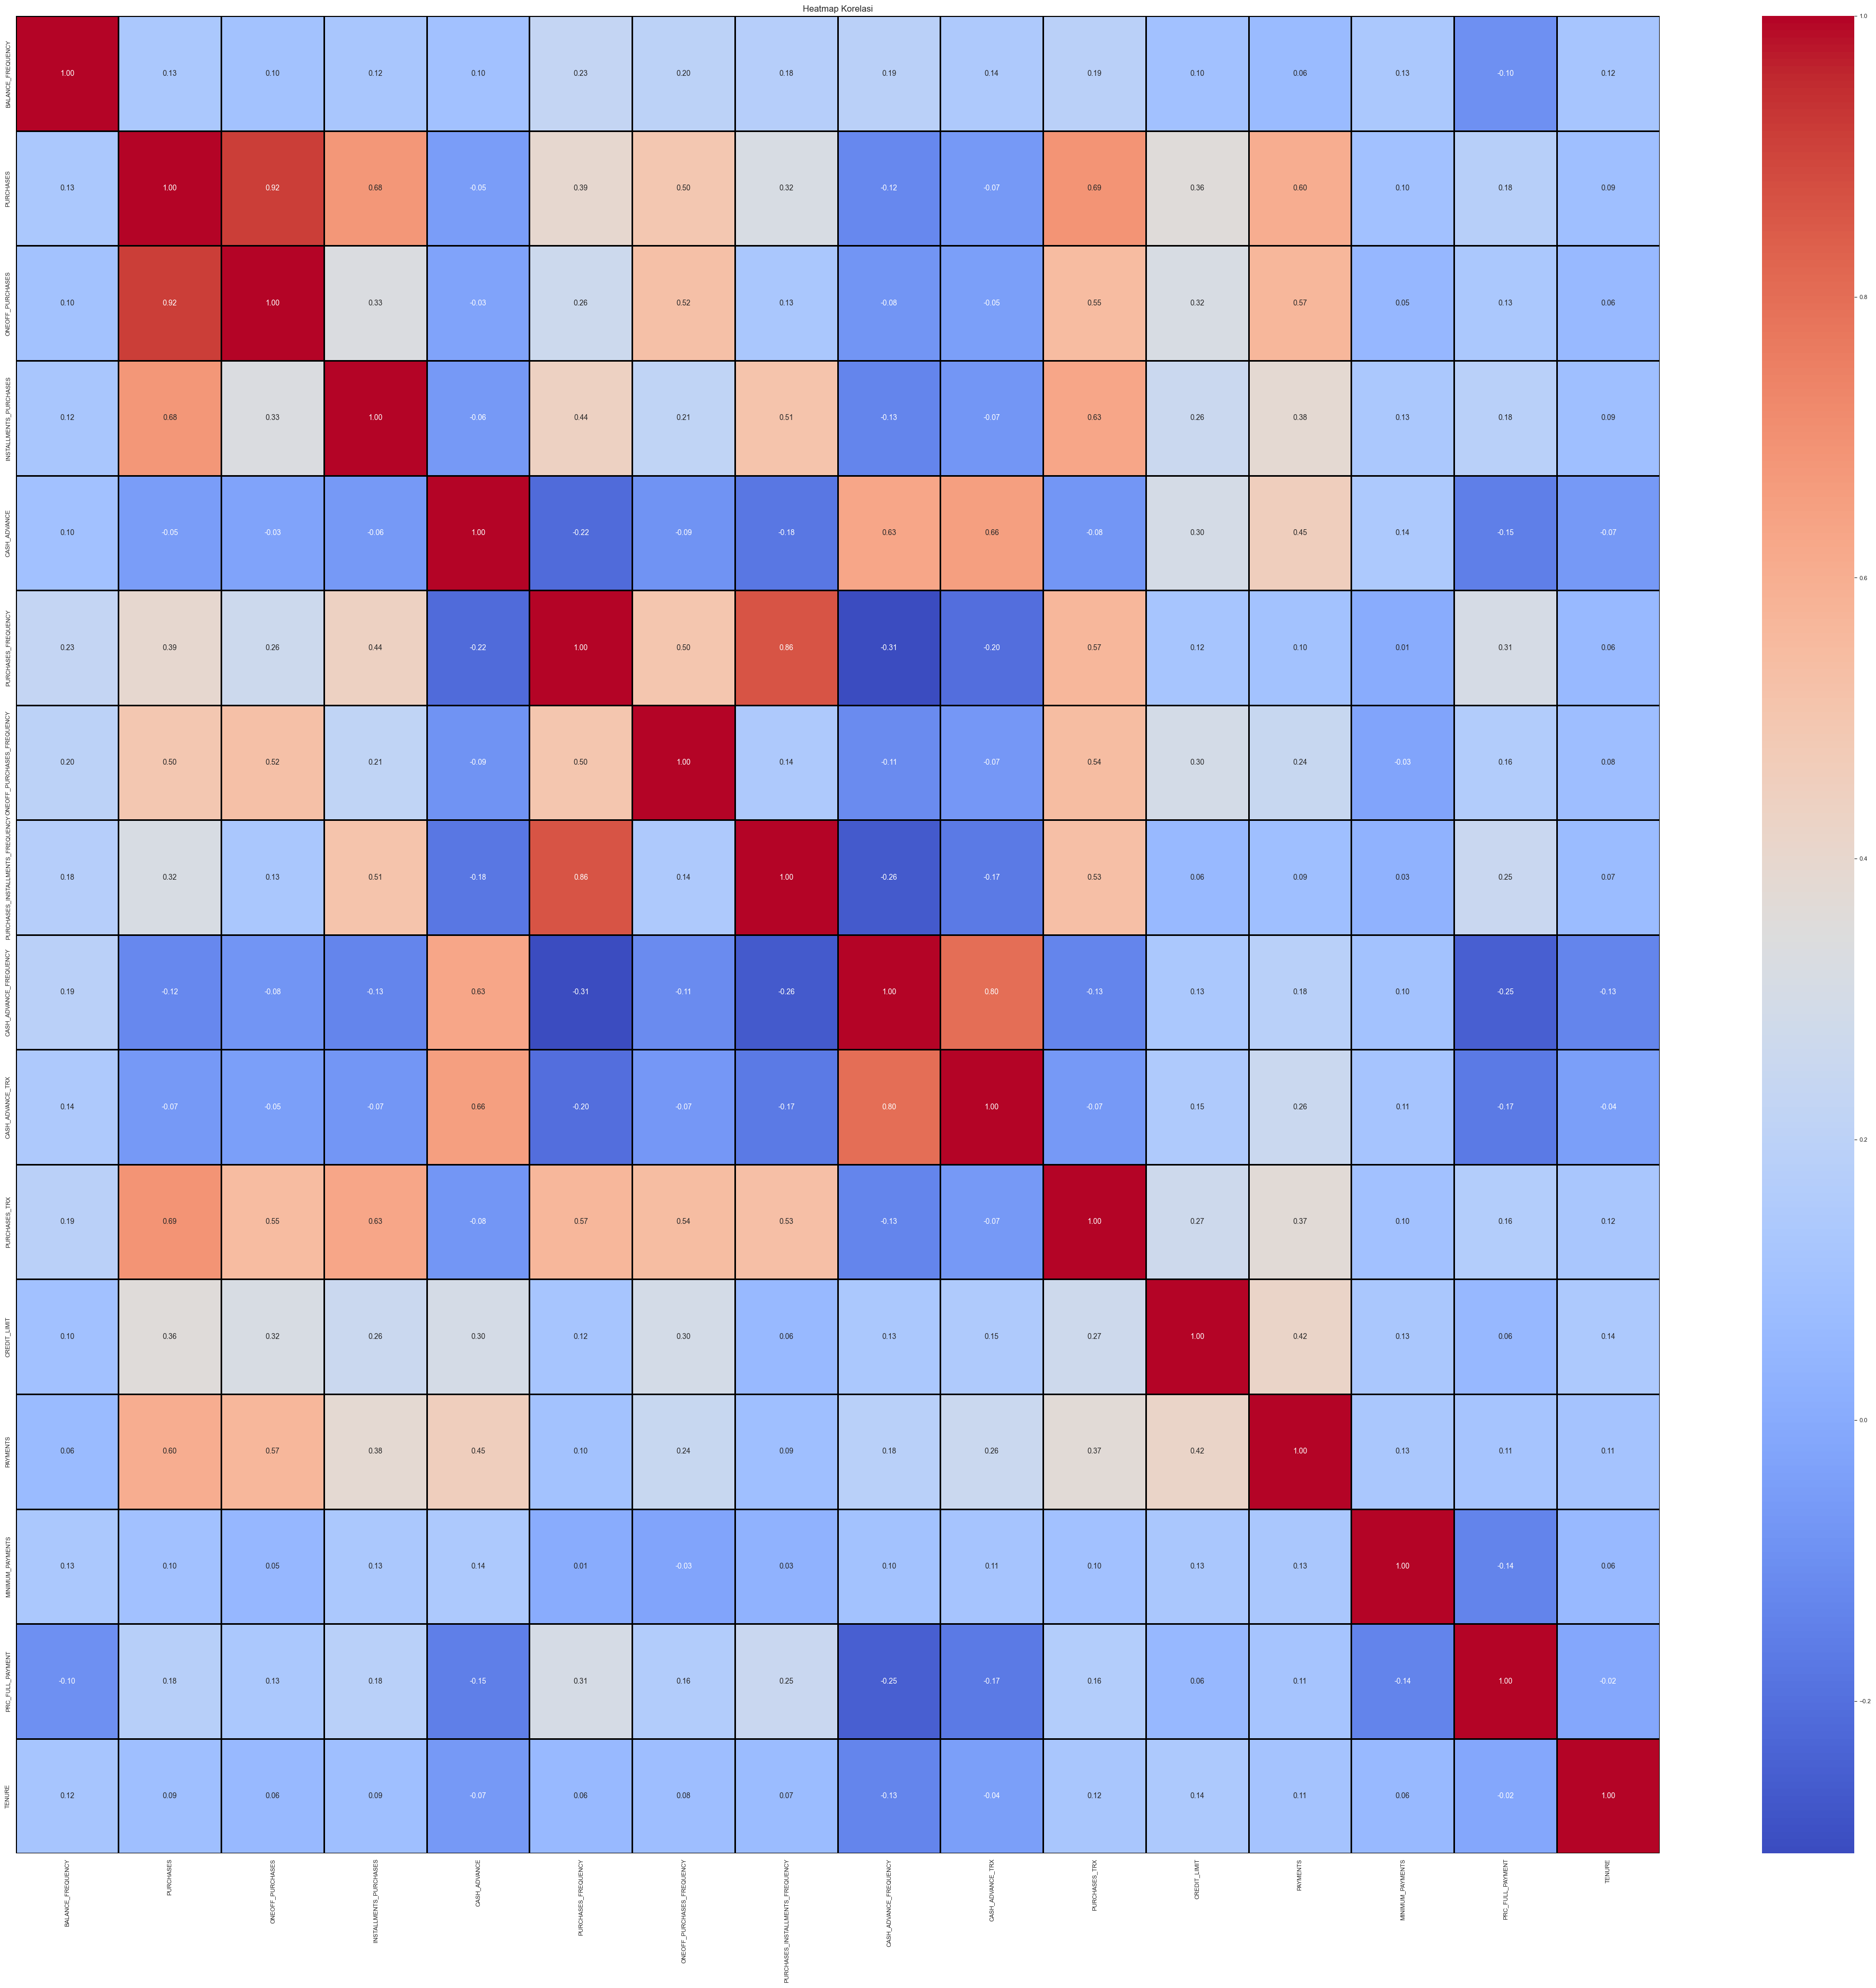

In [38]:
# Membuat Heatmap Correlation attribute

correlation_matrix = df.iloc[1:, 1:].corr()

sns.set_style("whitegrid")

plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=1, linecolor='black')

plt.title("Heatmap Korelasi")
plt.show()

Heatmap diatas memvisualisasikan hubungan korelasi antara berbagai atribut dalam dataset pengguna kartu kredit. Dengan merepresentasikan seberapa eratnya hubungan atau korelasi antara setiap pasang atribut berdasarkan warna. Skala warna yang digunakan dalam heatmap ini memberikan pandangan visual yang jelas tentang hubungan positif, negatif, atau bahkan tidak ada hubungan antara atribut-atribut tersebut. Anotasi yang ditambahkan pada heatmap menampilkan nilai korelasi sebagai angka, membantu dalam pemahaman tingkat korelasi antara pasangan atribut.

Setiap sel pada heatmap berisi nilai korelasi antara dua variabel. Nilai korelasi berkisar antara -1 hingga 1, di mana:

- Nilai positif mendekati 1 menunjukkan korelasi positif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang sama.
- Nilai negatif mendekati -1 menunjukkan korelasi negatif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang berlawanan.
- Nilai mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi antara dua variabel.

Sehingga, dapat membantu kami dalam mengeksplorasi pola dan hubungan antar atribut, yang dapat digunakan untuk pemilihan fitur, pemahaman lebih lanjut tentang data, serta tahap-tahap analisis lanjutan dalam proyek pengguna kartu kredit.

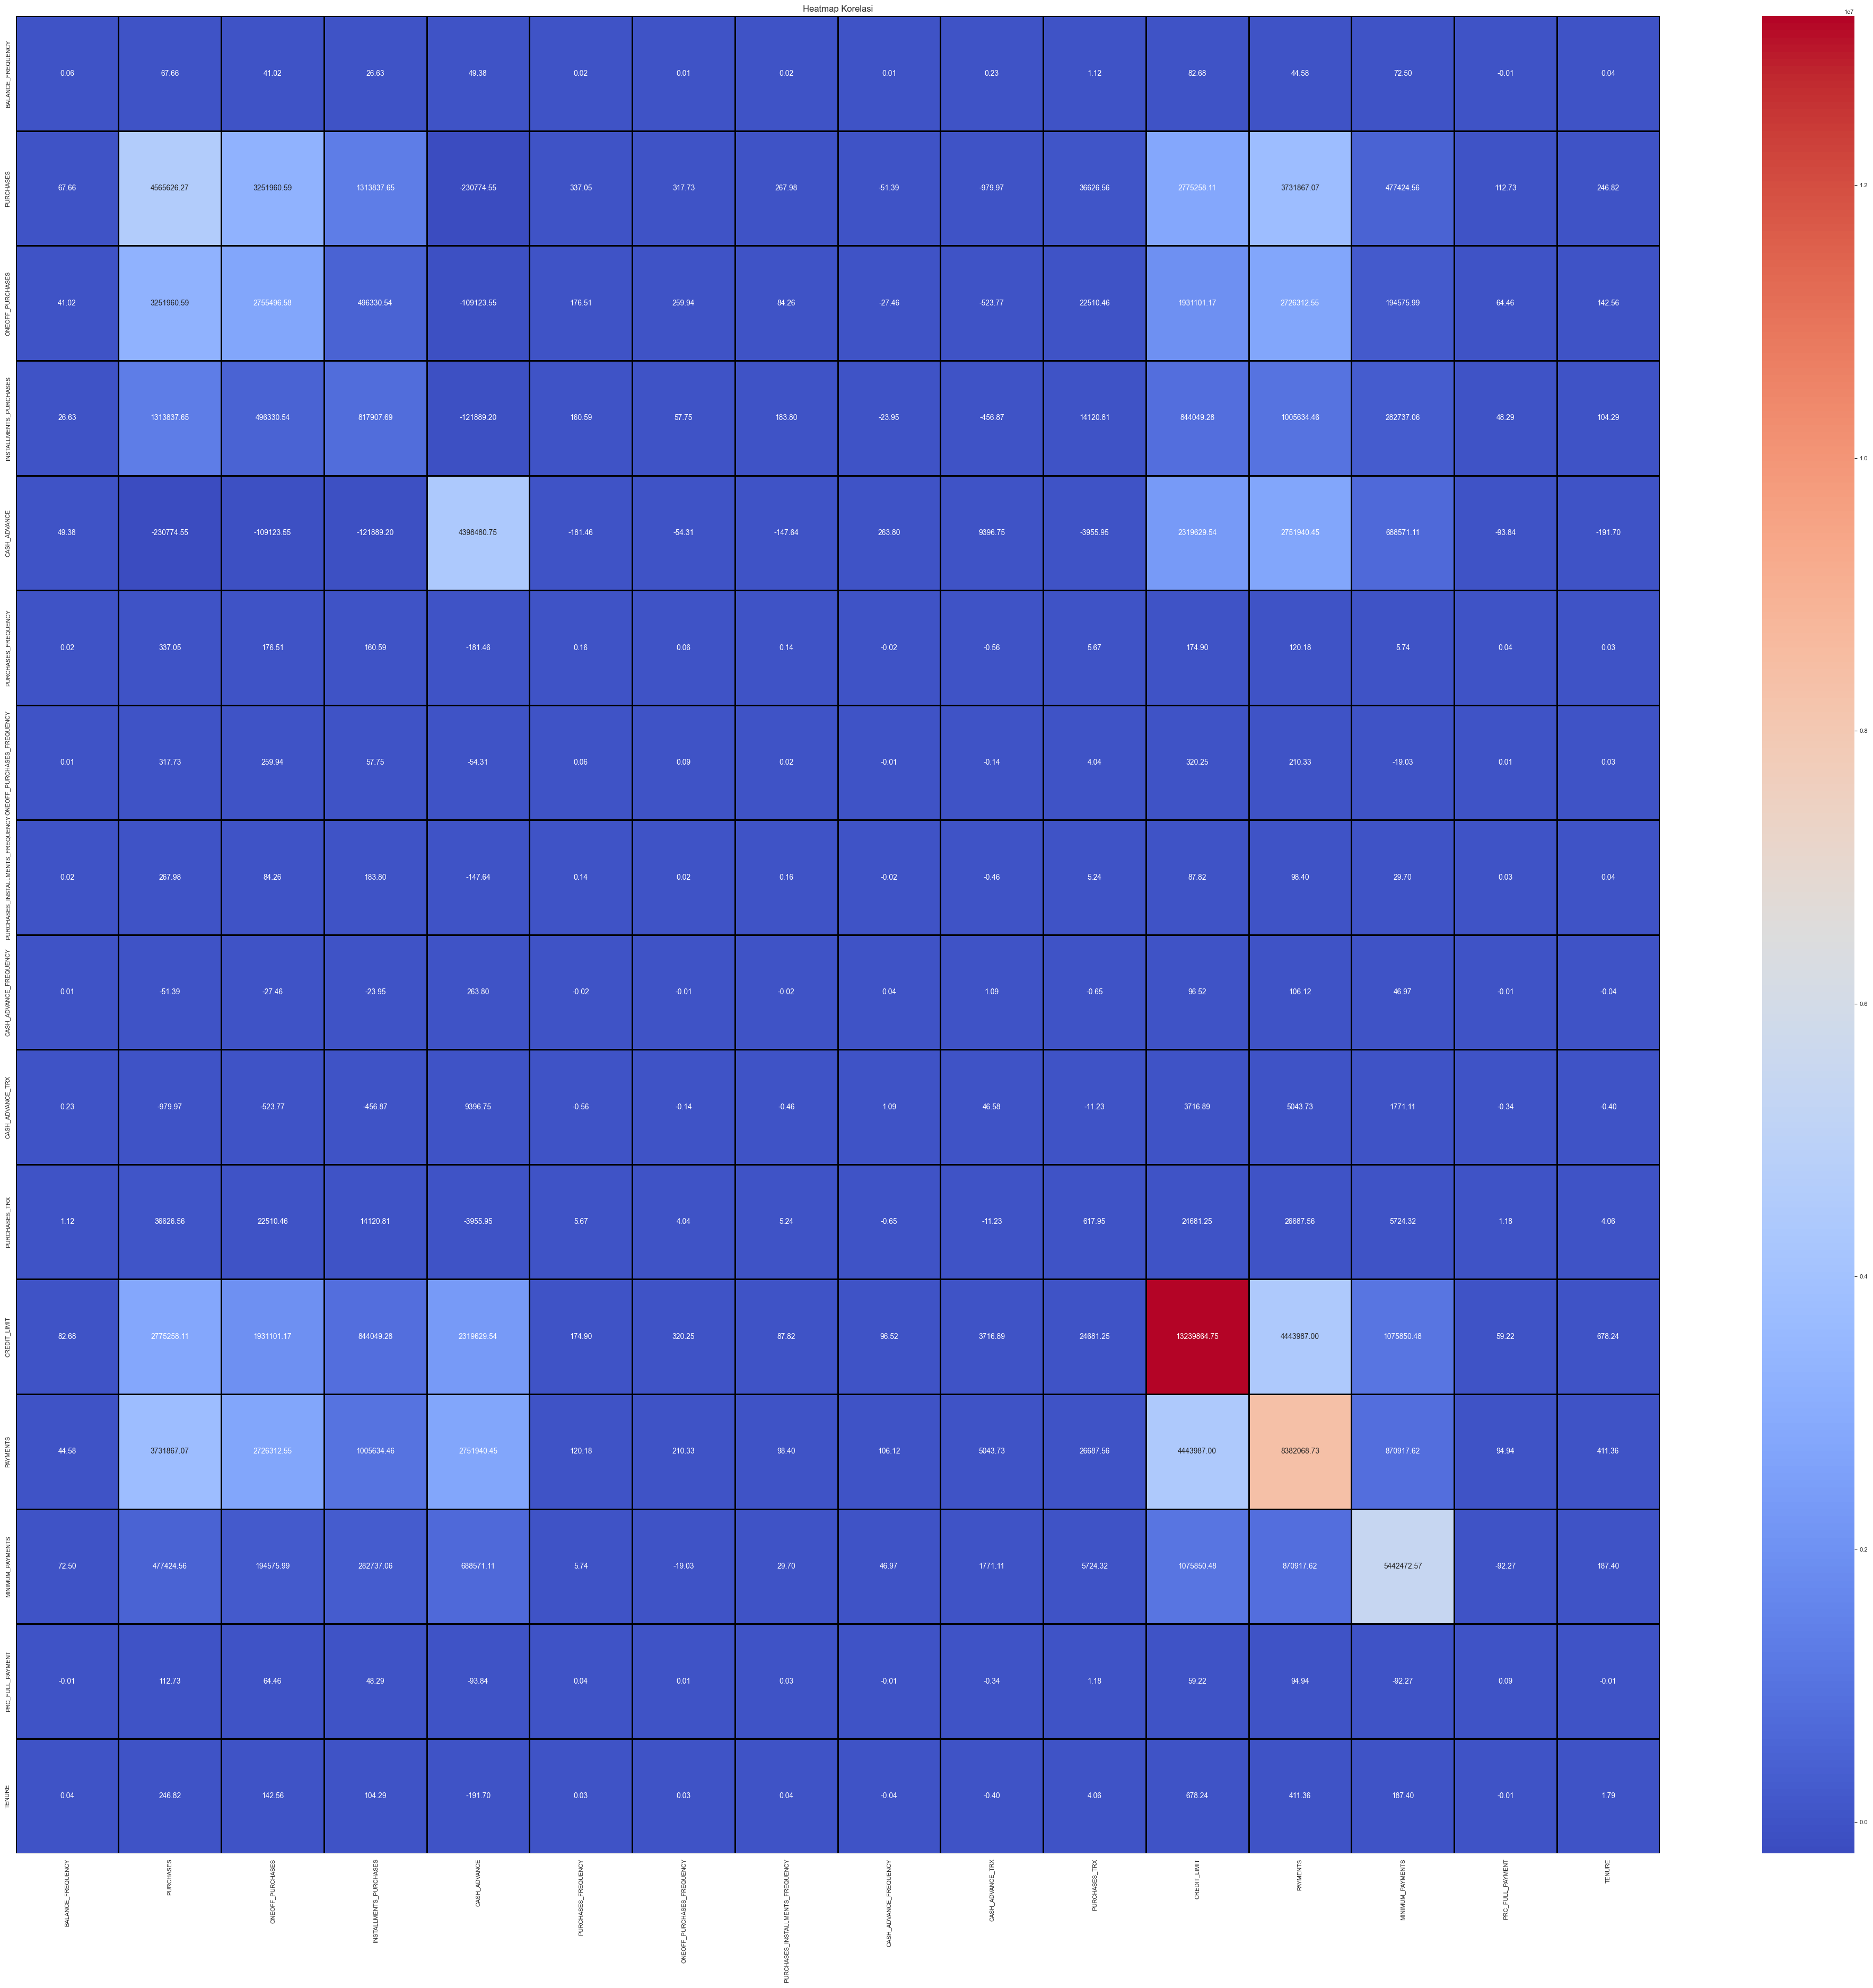

In [39]:
# Membuat Heatmap Covariance

correlation_matrix = df.iloc[1:, 1:].cov()

sns.set_style("whitegrid")

plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=1, linecolor='black')

plt.title("Heatmap Korelasi")
plt.show()

Heatmap diatas berbeda dari heatmap sebelumnya, karena heatmap ini justru menunjukkan kovarian antara atribut dalam dataset pengguna kartu kredit. Heatmap ini menunjukkan tingkat kovarian antara pasangan atribut dalam data. Kovarian mengukur seberapa kuat hubungan linear antara dua variabel acak. Dalam konteks ini, heatmap kovarian menggunakan warna untuk menampilkan seberapa kuat hubungan linear positif atau negatif antara setiap pasangan atribut. Anotasi yang disertakan pada heatmap menampilkan nilai kovarian, memberikan gambaran visual yang jelas tentang hubungan antar atribut. Informasi dari heatmap kovarian membantu dalam pemahaman pola dan hubungan antar atribut, yang dapat digunakan untuk analisis lanjutan, pemilihan fitur, serta langkah-langkah pemrosesan data lebih lanjut dalam proyek pengguna kartu kredit.

## F.3 Pemilihan Attribute dengan VarianceThreshold

In [40]:
# Fitur sebelum dipilih
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0       40.900749           0.818182      95.40              0.00  \
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                      95.40      0.000000             0.166667  \
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                       0.000000                          0.083333  \
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                   0.000000                 0              2        1000.0  \
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        312.343947          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        312.343947          0.000000       6  
8947    81

In [41]:
selector = VarianceThreshold(threshold=0.5)
temp     = selector.fit_transform(df)

best_attribute_index = selector.get_support(indices=True)
best_attribute       = df.columns[best_attribute_index]

# Fitur terbaik yang terpilih
print(f" Fitur terbaik : ", best_attribute)

 Fitur terbaik :  Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')


In [42]:
# Mendapatkan kolom-kolom yang sesuai dengan indeks terpilih
df = df.iloc[:, best_attribute_index]
df

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES   
0       40.900749      95.40              0.00                   95.40  \
1     3202.467416       0.00              0.00                    0.00   
2     2495.148862     773.17            773.17                    0.00   
3     1666.670542    1499.00           1499.00                    0.00   
4      817.714335      16.00             16.00                    0.00   
...           ...        ...               ...                     ...   
8945    28.493517     291.12              0.00                  291.12   
8946    19.183215     300.00              0.00                  300.00   
8947    23.398673     144.40              0.00                  144.40   
8948    13.457564       0.00              0.00                    0.00   
8949   372.708075    1093.25           1093.25                    0.00   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0         0.000000                 0              2        1000.0  \
1      6442.945483                 4              0        7000.0   
2         0.000000                 0             12        7500.0   
3       205.788017                 1              1        7500.0   
4         0.000000                 0              1        1200.0   
...            ...               ...            ...           ...   
8945      0.000000                 0              6        1000.0   
8946      0.000000                 0              6        1000.0   
8947      0.000000                 0              5        1000.0   
8948     36.558778                 2              0         500.0   
8949    127.040008                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  TENURE  
0      201.802084        139.509787      12  
1     4103.032597       1072.340217      12  
2      622.066742        627.284787      12  
3        0.000000        312.343947      12  
4      678.334763        244.791237      12  
...           ...               ...     ...  
8945   325.594462         48.886365       6  
8946   275.861322        312.343947       6  
8947    81.270775         82.418369       6  
8948    52.549959         55.755628       6  
8949    63.165404         88.288956       6  

[8950 rows x 11 columns]

## F.4 Pembersihan Dataset dari Outlier

### F.4.1 Cleaning Outlier Z-Score = -3 or 3 : df_z3

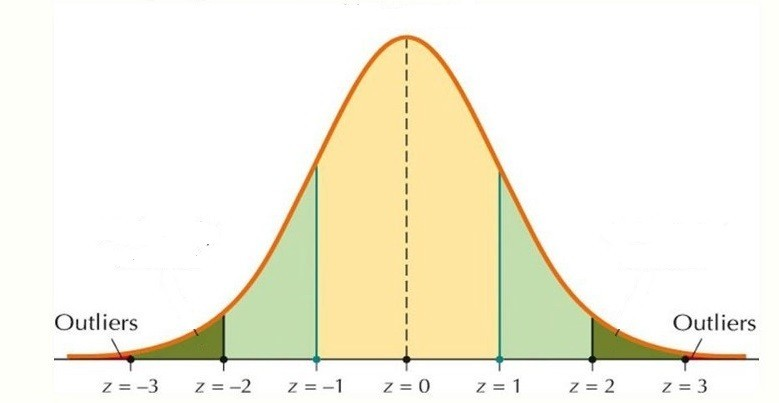

In [43]:
df_z3 = df.copy()

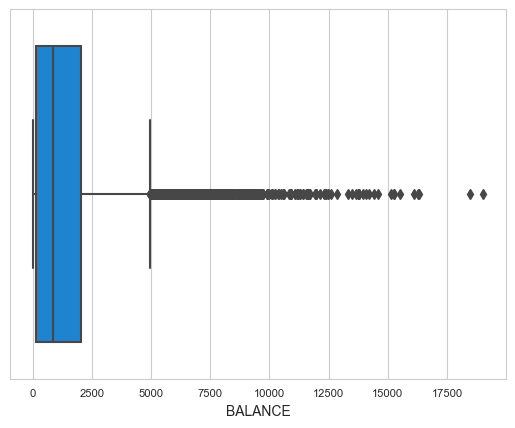

In [44]:
# Sebelum

sns.boxplot(x=df_z3['BALANCE'])
plt.show()


In [45]:
z_scores = np.abs(stats.zscore(df_z3))
outlier_mask = (z_scores > 3) | (z_scores < -3)
df_z3 = df_z3[~outlier_mask]
df_z3.dropna(inplace=True)

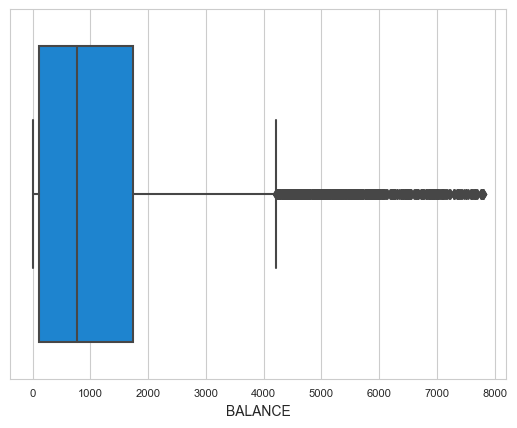

In [46]:
# Setelah

sns.boxplot(x=df_z3['BALANCE'])
plt.show()

Boxplot diatas terdapat section sebelum dan setelah penghapusan outlier pada atribut 'BALANCE' dalam dataset pengguna kartu kredit. Menggambarkan tentang sebaran dan distribusi nilai-nilai pada suatu atribut. Pada tahap sebelum (sebelum penghapusan outlier), boxplot menggambarkan sebaran nilai-nilai 'BALANCE', termasuk nilai-nilai outlier yang terlihat sebagai titik-titik di luar batas-batas (garis-garis horizontal) dari boxplot.

Setelah penghapusan outlier yang dilakukan dengan menggunakan z-score dengan batas 3 dan -3, diagram boxplot kedua menunjukkan distribusi 'BALANCE' yang sudah disesuaikan tanpa nilai-nilai outlier yang mencolok. Penghapusan outlier ini dapat membantu dalam meningkatkan keakuratan analisis, mengurangi efek dari nilai-nilai yang ekstrem, serta membuat representasi visual dari distribusi data menjadi lebih informatif dan relevan untuk analisis lebih lanjut.

In [47]:
df_z3.reset_index(drop=True, inplace=True)
df_z3.tail()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES   
7661   55.147722     163.31               0.0                  163.31  \
7662  869.328293       0.00               0.0                    0.00   
7663  137.744895     441.00               0.0                  441.00   
7664  331.070135      81.20              81.2                    0.00   
7665   23.116625       0.00               0.0                    0.00   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS   
7661      0.000000               0.0            7.0        1000.0   62.619008  \
7662   1153.925205               3.0            0.0        1200.0  150.755024   
7663      0.000000               0.0            6.0        1000.0  169.249683   
7664    419.341394               7.0            1.0         500.0  116.761487   
7665    921.973821               5.0            0.0         500.0  586.173293   

      MINIMUM_PAYMENTS  TENURE  
7661        109.580539     8.0  
7662        337.986933     8.0  
7663        124.639905     8.0  
7664        205.065526     8.0  
7665         16.194932     8.0

### F.4.2 Cleaning Outlier IQR : df_iqr

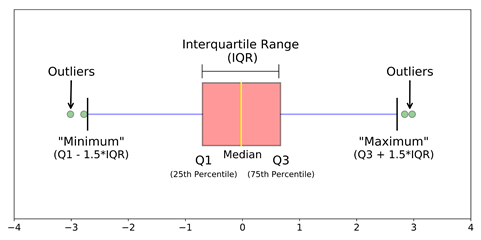

In [48]:
df_iqr = df.copy()

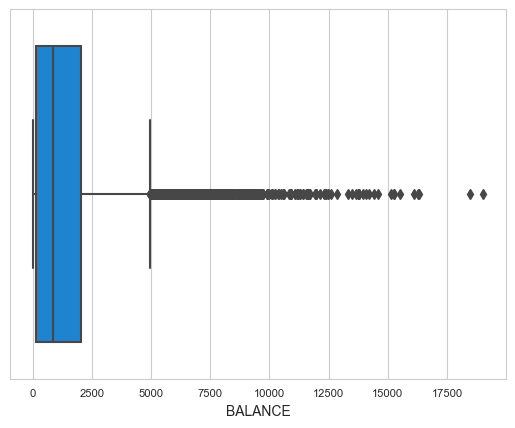

In [49]:
# Sebelum

sns.boxplot(x=df_iqr['BALANCE'])
plt.show()

In [50]:
def remove_outliers_iqr(column, k=1.5):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Menghapus outlier
    cleaned_data = column[(column >= lower_bound) & (column <= upper_bound)]

    return cleaned_data


for column in df_iqr.columns:
    df_iqr[column] = remove_outliers_iqr(df_iqr[column])

# Drop NaN values
df_iqr.dropna(inplace=True)

# Reset the index
df_iqr.reset_index(drop=True, inplace=True)

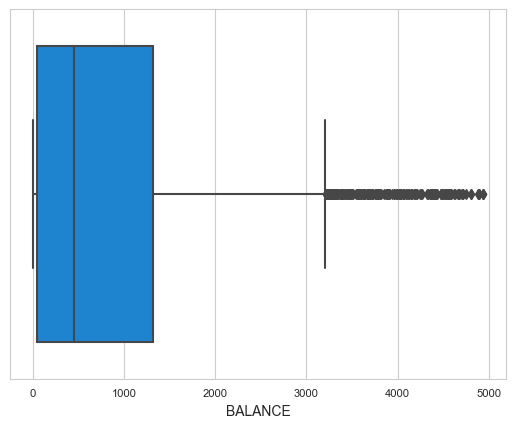

In [51]:
# Setelah

sns.boxplot(x=df_iqr['BALANCE'])
plt.show()

Boxplot diatas memvisualisasikan diagram boxplot sebelum dan sesudah pembersihan outlier menggunakan metode Interquartile Range (IQR) pada atribut 'BALANCE' dalam dataset pengguna kartu kredit. Diagram boxplot pertama menunjukkan sebaran nilai 'BALANCE' sebelum dilakukan pembersihan outlier. Titik-titik di luar batas atas dan bawah pada boxplot mewakili nilai-nilai outlier. Pembersihan outlier dilakukan dengan menghitung batas atas dan batas bawah menggunakan IQR dan faktor k (1.5). Nilai-nilai di luar batas ini dihapus dari dataset untuk setiap kolom, dengan proses tersebut diterapkan ke semua kolom dalam dataset ('df_iqr'). Kemudian, nilai-nilai NaN dihapus dan indeks dataset direset untuk memastikan integritas data.

Diagram boxplot kedua menunjukkan sebaran nilai 'BALANCE' setelah pembersihan outlier menggunakan metode IQR. Distribusi data pada diagram ini menunjukkan nilai-nilai 'BALANCE' yang sudah disesuaikan setelah menghilangkan nilai-nilai outlier. Proses pembersihan outlier ini membantu dalam meningkatkan kualitas analisis serta mengurangi pengaruh dari data ekstrem terhadap kesimpulan yang diambil dari analisis data.

In [52]:
df_iqr.reset_index(drop=True, inplace=True)
df_iqr.tail()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES   
4599    0.223351     336.00               0.0                  336.00  \
4600    3.036243       0.00               0.0                    0.00   
4601   44.505527     401.76               0.0                  401.76   
4602   67.377243     295.00               0.0                  295.00   
4603  307.127754     909.30             409.3                  500.00   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS   
4599      0.000000               0.0           12.0        1000.0  578.819329  \
4600     81.569379               1.0            0.0         500.0    0.000000   
4601      0.000000               0.0           12.0        1500.0  291.089279   
4602      0.000000               0.0            6.0        1000.0  245.689379   
4603    237.378894               4.0           12.0        1000.0  943.278170   

      MINIMUM_PAYMENTS  TENURE  
4599        312.343947    12.0  
4600        312.343947    12.0  
4601        165.163582    12.0  
4602        167.126034    12.0  
4603        179.258575    12.0

## F.5 StandardScaler()

### F.5.1 df_z3

In [53]:
scaler = StandardScaler()
df1_z3 = df_z3.copy()
df_z3 = scaler.fit_transform(df_z3)


### F.5.2 df_iqr

In [54]:
scaler = StandardScaler()
df_iqr = scaler.fit_transform(df_iqr)

# G. Model Definition & Training Model

## G.1 Function

In [55]:
def hyperparameter_tuning_kmeans(data):
    hyperparameters = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [1, 5, 10, 15, 20], 
    'algorithm': ['auto', 'full', 'elkan'] }

    best_score = -1
    best_params = None
    for params in ParameterGrid(hyperparameters):
        kmeans = KMeans(**params, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette = silhouette_score(data, labels)
        evaluation_metric = silhouette
        if evaluation_metric > best_score:
            best_score = evaluation_metric
            best_params = params

    return best_params, best_score

def hyperparameter_tuning_hierarchical(data):
    hyperparameters = {
        'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'linkage': ['ward', 'average']}
    
    best_score = -1
    best_params = None
    for params in ParameterGrid(hyperparameters):
        agg_cluster = AgglomerativeClustering(**params)
        labels = agg_cluster.fit_predict(data)
        silhouette = silhouette_score(data, labels)
        evaluation_metric = silhouette

        if evaluation_metric > best_score:
            best_score = evaluation_metric
            best_params = params

    return best_params, best_score

def hyperparameter_tuning_dbscan(data):
    hyperparameters = {
        'eps': [0.1, 0.5, 1.0, 1.5, 2.0],
        'min_samples': [5, 10, 15]}

    best_score = -1
    best_params = None

    for params in ParameterGrid(hyperparameters):
        dbscan = DBSCAN(**params)
        labels = dbscan.fit_predict(data)
        silhouette = silhouette_score(data, labels)

        if silhouette > best_score:
            best_score = silhouette
            best_params = params

    return best_params, best_score

def visualize_pca(data):
    explained_var_ratio = PCA(random_state=42).fit(data).explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_var_ratio) + 1), 
            explained_var_ratio, 
            marker='o', 
            linestyle='-')
    plt.xlabel('n_components')
    plt.ylabel('Variance Ratio')
    plt.title('Variance Ratio untuk n_components')
    plt.grid(True)
    plt.show()

def visualize_clustering(data, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], 
                data[:, 1], 
                c=labels, 
                cmap='viridis')

    plt.title('Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

## G.2 PCA

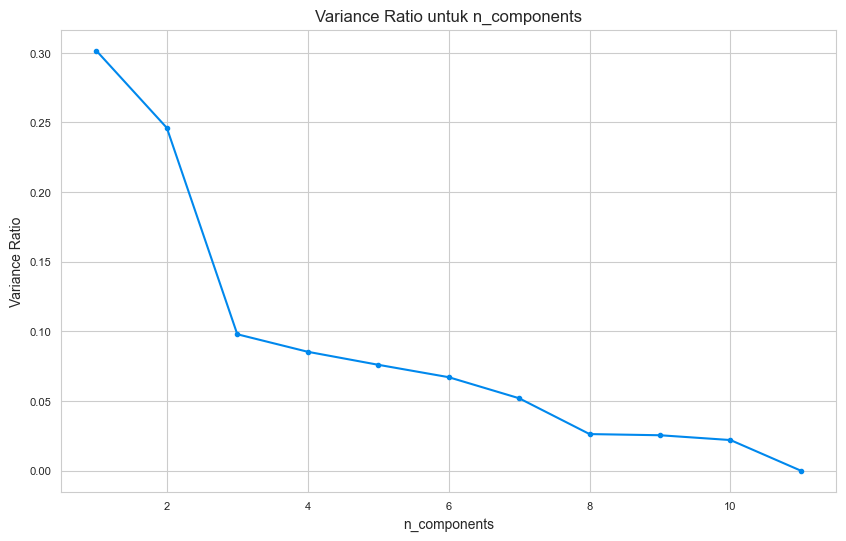

In [56]:
# PCA df_z3

visualize_pca(df_z3)

Visualisasi diatas merupakan representasi hasil reduksi dimensi menggunakan metode Principal Component Analysis (PCA) pada dataset 'df_z3' yang berisi data pengguna kartu kredit. PCA mengurangi jumlah dimensi dalam data sambil mempertahankan informasi yang relevan. Visualisasi ini memungkinkan pemahaman yang lebih baik tentang struktur data dalam ruang yang lebih rendah (biasanya 2 atau 3 dimensi), membantu mengidentifikasi pola atau struktur yang sulit diamati dalam dimensi yang lebih tinggi. Ini memberikan gambaran bagaimana data pengguna kartu kredit direduksi, memfasilitasi interpretasi yang lebih mudah terhadap informasi yang terkandung dalam dataset 'df_z3'.

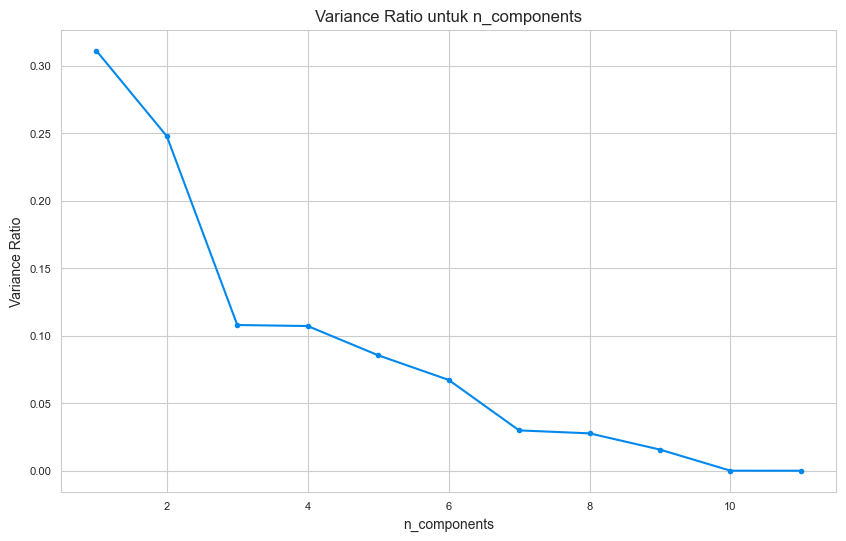

In [57]:
# PCA df_iqr

visualize_pca(df_iqr)

Visualisasi diatas merupakan representasi hasil dari reduksi dimensi menggunakan metode Principal Component Analysis (PCA) pada dataset 'df_iqr', yang merupakan data pengguna kartu kredit setelah pembersihan outlier dengan metode IQR. PCA membantu mengurangi dimensi dari data asli ke dimensi yang lebih rendah, mempertahankan sebagian besar informasi yang relevan. Visualisasi ini memungkinkan penelaahan visual terhadap pola atau struktur yang mungkin sulit ditemukan dalam dimensi yang lebih tinggi, memudahkan interpretasi terhadap dataset 'df_iqr' yang telah diproses untuk mengatasi outlier.

## G.3 K-Means Clustering

### G.3.1 df_z3 K-Means Clustering with Reduksi Dimensi PCA

In [58]:
pca = PCA(n_components=2,
          random_state=42)
pca_result_1 = pca.fit_transform(df_z3)

Melakukan reduksi dimensi menggunakan PCA pada dataset df_z3 sebelum clustering

In [59]:
# best_params, best_score = hyperparameter_tuning_kmeans(pca_result_1)
# print("Best Parameters:", best_params)
# print("Best Silhouette Score:", best_score)

Menggunakan fungsi "hyperparameter_tuning_kmeans" untuk mencari parameter terbaik untuk algoritma K-Means berdasarkan dataset df_z3.

Dapat dilihat bahwa parameter terbaik untuk dataset ini adalah algorithm 'auto', init 'k-means++', n_clusters:3 dan jumlah n_clusters 2. Dengan skor Silhouette mencapai 0.5 

In [60]:
kmeans_z3_PCA = KMeans(algorithm='auto',
                       init='k-means++', 
                       n_clusters=3, 
                       n_init=10, 
                       random_state=42).fit(pca_result_1)
kmeans_z3_PCA

KMeans(algorithm='auto', n_clusters=3, n_init=10, random_state=42)

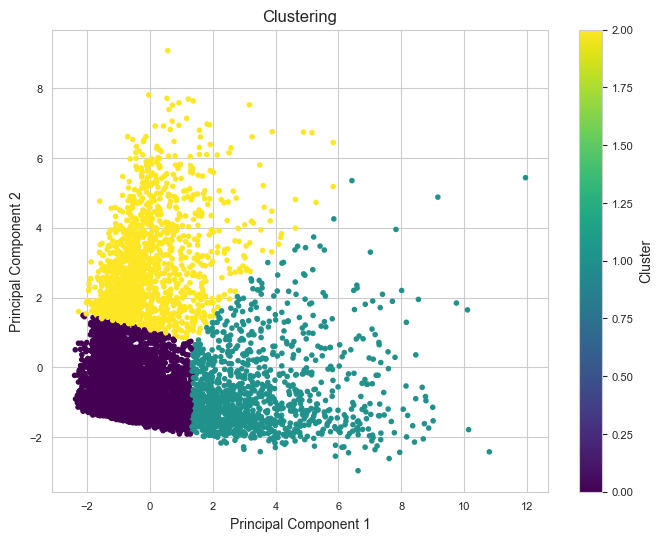

In [61]:
visualize_clustering(pca_result_1, kmeans_z3_PCA.labels_)

Visualisasi diatas menggambarkan hasil klasterisasi data pengguna kartu kredit setelah dilakukan reduksi dimensi menggunakan PCA dan kemudian dianalisis dengan algoritma K-Means Clustering. Dengan memetakan data ke dalam ruang 2 dimensi, memudahkan untuk memahami pola klaster yang terbentuk. Warna-warna berbeda pada visualisasi ini merepresentasikan klaster yang berbeda, memberikan gambaran tentang bagaimana data terbagi menjadi kelompok-kelompok yang mungkin memiliki karakteristik atau perilaku yang serupa.

### G.3.2 df_iqr K-Means Clustering with Reduksi Dimensi PCA

In [62]:
pca = PCA(n_components=2,
          random_state=42)
pca_result_2 = pca.fit_transform(df_iqr)

Melakukan reduksi dimensi menggunakan PCA pada dataset df_iqr sebelum clustering

In [63]:
# best_params, best_score = hyperparameter_tuning_kmeans(pca_result_2)
# print("Best Parameters:", best_params)
# print("Best Silhouette Score:", best_score)

Menggunakan fungsi "hyperparameter_tuning_kmeans" untuk mencari parameter terbaik untuk algoritma K-Means berdasarkan dataset df_iqr.

Dapat dilihat bahwa parameter terbaik untuk dataset ini adalah algorithm 'auto', init 'k-means++', n_clusters:3 dan jumlah n_clusters 2. Dengan skor Silhouette mencapai 0.4

In [64]:
kmeans_iqr_PCA = KMeans( algorithm='auto',
                         init='k-means++',
                         n_clusters=3,
                         n_init=10,
                         random_state=42).fit(pca_result_2)
kmeans_iqr_PCA

KMeans(algorithm='auto', n_clusters=3, n_init=10, random_state=42)

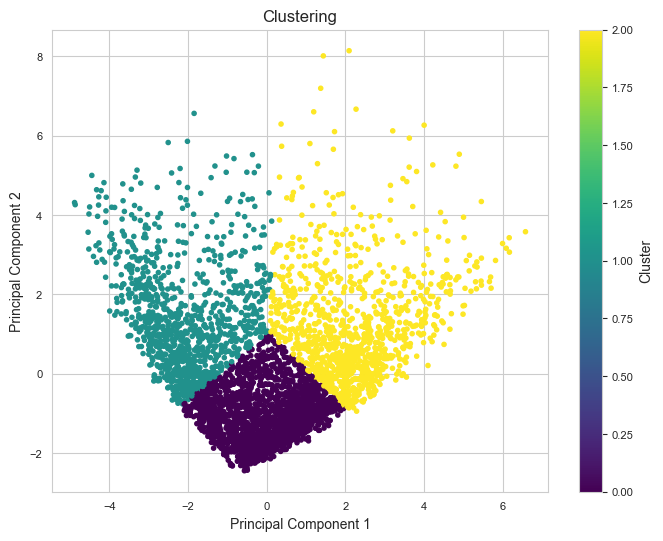

In [65]:
visualize_clustering(pca_result_2, kmeans_iqr_PCA.labels_)

Visualisasi diatas menggambarkan hasil dari klasterisasi data pengguna kartu kredit yang telah direduksi dimensinya menggunakan PCA dan selanjutnya di-cluster menggunakan metode K-Means. Melalui PCA, data telah diproyeksikan ke dalam ruang 2 dimensi untuk memfasilitasi pemahaman pola klaster. Warna-warna yang berbeda pada visualisasi mewakili klaster yang terbentuk setelah proses klasterisasi, memperlihatkan bagaimana data terbagi menjadi kelompok-kelompok yang memiliki kemiripan karakteristik atau perilaku berdasarkan atribut yang telah dipilih.

### G.3.3 Save best K-Means Clustering

In [66]:
df1_z3['CLUSTER_KMEANS_PCA'] = kmeans_z3_PCA.labels_
df1_z3['CLUSTER_KMEANS_PCA'].value_counts().to_frame().reset_index()

CLUSTER_KMEANS_PCA  count
0                   0   5156
1                   2   1351
2                   1   1159

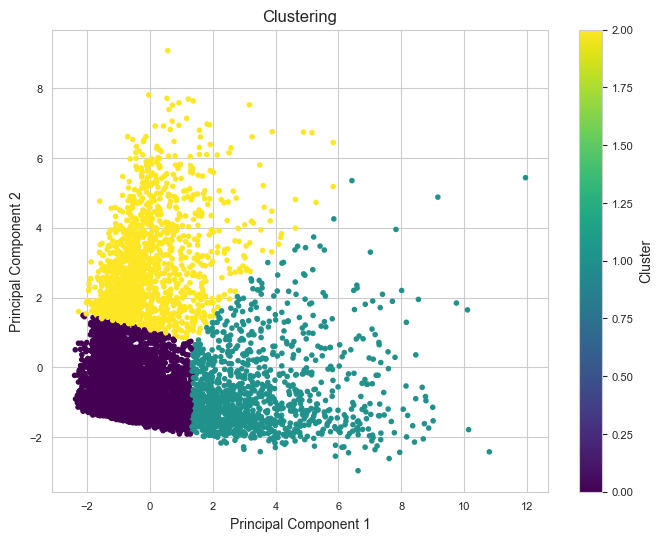

In [67]:
visualize_clustering(pca_result_1, kmeans_z3_PCA.labels_)

Visualisasi diatas menggambarkan hasil dari klasterisasi yang telah diterapkan pada data pengguna kartu kredit setelah direduksi dimensinya menggunakan PCA. Setiap warna yang terwakili dalam visualisasi menggambarkan kelompok klaster yang dihasilkan oleh algoritma K-Means. Jumlah titik-titik pada setiap klaster dipaparkan dalam grafik, memperlihatkan distribusi dan proporsi dari setiap kelompok klaster yang terbentuk. Dengan memasukkan label klaster kembali ke data, dapat dilihat sebaran data pada setiap klaster untuk analisis lebih lanjut terkait pola dan karakteristik yang mungkin dimiliki oleh masing-masing klaster tersebut.

## G.4  Hierarchical Clustering

### G.4.1 df_z3 Hierarchical Clustering with Reduksi Dimensi PCA

In [68]:
pca = PCA(n_components=2,random_state=42)
pca_result_3 = pca.fit_transform(df_z3)

Melakukan reduksi dimensi menggunakan PCA pada dataset df_z3 sebelum clustering

In [69]:
# best_params, best_score = hyperparameter_tuning_hierarchical(pca_result_3)
# print("Best Parameters:", best_params)
# print("Best Silhouette Score:", best_score)

Menggunakan fungsi "hyperparameter_tuning_hierarchical" untuk mencari parameter terbaik untuk algoritma hierarchical berdasarkan dataset df_z3.

Dapat dilihat bahwa parameter terbaik untuk dataset ini adalah linkage 'average' dan jumlah n_clusters 2. Dengan skor Silhouette mencapai 0.6

In [70]:
hie_z3_PCA = AgglomerativeClustering(n_clusters=2, 
                                     linkage='average').fit(pca_result_3)
hie_z3_PCA

AgglomerativeClustering(linkage='average')

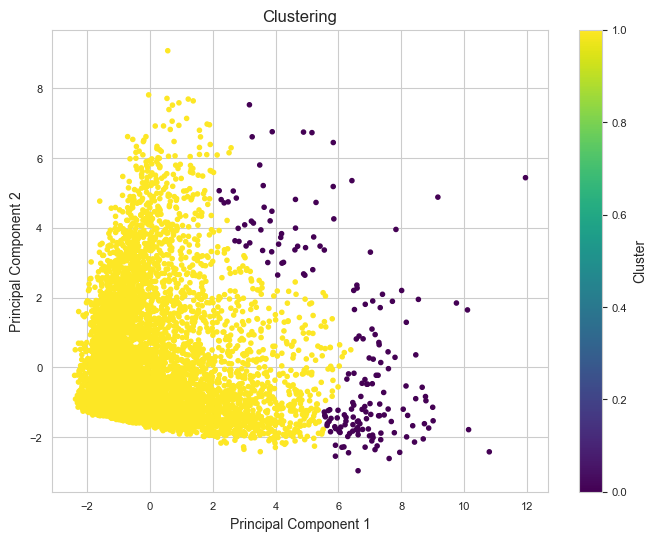

In [71]:
visualize_clustering(pca_result_3, hie_z3_PCA.labels_)

Visualisasi diatas menggambarkan hasil dari klasterisasi hierarkis yang diterapkan pada data pengguna kartu kredit setelah dimensi data direduksi menggunakan PCA. Grafik menampilkan sebaran titik-titik data yang terklaster dalam warna-warna yang merepresentasikan kelompok klaster yang dihasilkan oleh algoritma Hierarchical Clustering. Melalui pemetaan ini, dapat diamati bagaimana titik-titik data terdistribusi ke dalam kelompok klaster yang berbeda, memperlihatkan struktur hierarkis dari klaster yang terbentuk. Dengan memasukkan label klaster kembali ke data, analisis lebih lanjut dapat dilakukan untuk memahami karakteristik unik dari setiap kelompok klaster yang terbentuk.

### G.4.2 df_iqr Hierarchical Clustering with Reduksi Dimensi PCA

In [72]:
pca = PCA(n_components=2,random_state=42)
pca_result_4 = pca.fit_transform(df_iqr)

Melakukan reduksi dimensi menggunakan PCA pada dataset df_iqr sebelum clustering

In [73]:
# best_params, best_score = hyperparameter_tuning_hierarchical(pca_result_4)
# print("Best Parameters:", best_params)
# print("Best Silhouette Score:", best_score)

Menggunakan fungsi "hyperparameter_tuning_hierarchical" untuk mencari parameter terbaik untuk algoritma hierarchical berdasarkan dataset df_iqr.

Dapat dilihat bahwa parameter terbaik untuk dataset ini adalah linkage 'average' dan jumlah n_clusters 2. Dengan skor Silhouette mencapai 0.48

In [74]:
hie_iqr_PCA = AgglomerativeClustering(n_clusters=2, 
                                      linkage='average').fit(pca_result_2)
hie_iqr_PCA

AgglomerativeClustering(linkage='average')

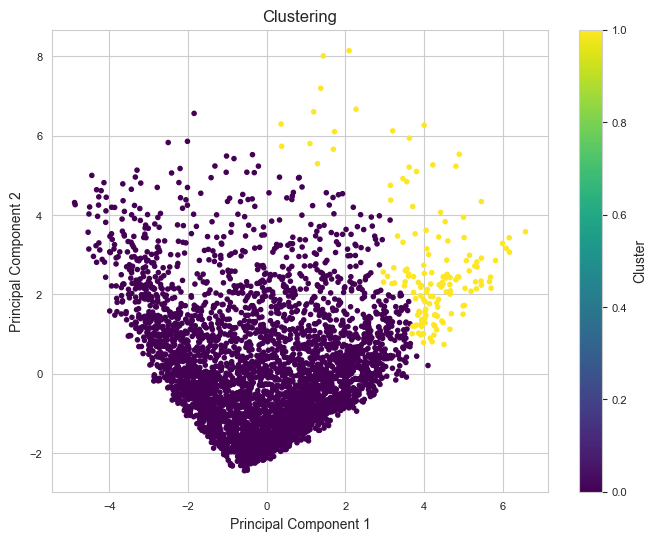

In [75]:
visualize_clustering(pca_result_2, hie_iqr_PCA.labels_)

Visualisasi diatas menggambarkan hasil dari klasterisasi hierarkis pada data pengguna kartu kredit setelah mengurangi dimensi menggunakan PCA. Grafik menampilkan titik-titik data yang terklaster dalam warna-warna yang merepresentasikan kelompok klaster yang dihasilkan oleh algoritma Hierarchical Clustering. Melalui visualisasi ini, dapat dianalisis bagaimana titik-titik data terdistribusi ke dalam kelompok klaster yang berbeda setelah penerapan metode reduksi dimensi dan klasterisasi hierarkis. Ini memungkinkan pemahaman lebih lanjut tentang struktur dan pola dalam data yang terkelompok. Dengan memasukkan label klaster ke data, analisis lebih lanjut dapat dilakukan untuk mempelajari karakteristik unik dari setiap kelompok klaster.

### G.4.3 Save best Hierarchical Clustering

In [76]:
df1_z3['CLUSTER_HIERARCHICAL_PCA'] = hie_z3_PCA.labels_
df1_z3['CLUSTER_HIERARCHICAL_PCA'].value_counts().to_frame().reset_index()

CLUSTER_HIERARCHICAL_PCA  count
0                         1   7486
1                         0    180

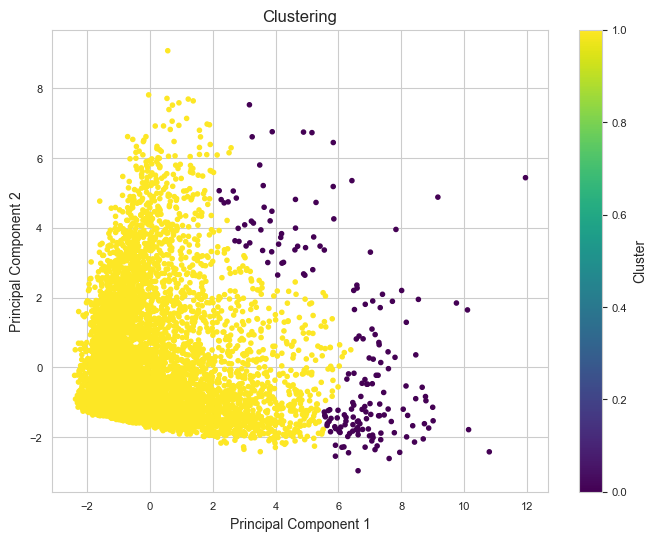

In [77]:
visualize_clustering(pca_result_3, hie_z3_PCA.labels_)

Visualisasi menggambarkan hasil klasterisasi hierarkis pada data pengguna kartu kredit setelah penerapan algoritma Hierarchical Clustering dengan dimensi yang telah direduksi menggunakan PCA. Grafik menampilkan sebaran titik-titik data yang terkelompok dalam berbagai warna yang merepresentasikan klaster yang dihasilkan oleh algoritma. Dengan memasukkan label klaster ke data, visualisasi ini memungkinkan pengamatan terhadap distribusi klaster dan memahami bagaimana titik-titik data terbagi ke dalam kelompok klaster yang berbeda. Dari visualisasi ini, bisa dianalisis bagaimana klaster terbentuk dan sebaran data di dalamnya, memberikan wawasan tentang struktur internal dari klaster yang ada pada data.

## G.5 DBSCAN

### G.5.1 df_z3 DBSCAN Clustering with Reduksi Dimensi PCA

In [78]:
pca = PCA(n_components=2,
          random_state=42)
pca_result_5 = pca.fit_transform(df_z3)

Melakukan reduksi dimensi menggunakan PCA pada dataset df_z3 sebelum clustering

In [79]:
# best_params, best_score = hyperparameter_tuning_dbscan(pca_result_5)
# print("Best Parameters:", best_params)
# print("Best Silhouette Score:", best_score)

Menggunakan fungsi "hyperparameter_tuning_dbscan" untuk mencari parameter terbaik untuk algoritma hierarchical berdasarkan dataset df_z3.

Dapat dilihat bahwa parameter terbaik untuk dataset ini adalah eps: 2.0 dan min_samples: 5. Dengan skor Silhouette mencapai 0.7

In [80]:
dbscan_z3_PCA = DBSCAN(eps=1, 
                       min_samples=10).fit(pca_result_5)
dbscan_z3_PCA 

DBSCAN(eps=1, min_samples=10)

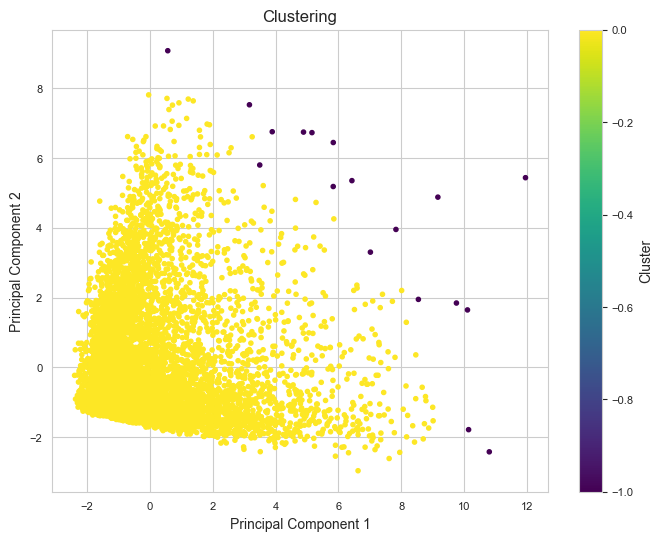

In [81]:
visualize_clustering(pca_result_5, dbscan_z3_PCA.labels_)

Visualisasi diatas menggambarkan hasil klasterisasi menggunakan algoritma DBSCAN pada data pengguna kartu kredit setelah menggunakan PCA untuk mereduksi dimensi. Grafik menampilkan klaster yang dihasilkan dari algoritma, membedakan klaster dengan warna berbeda. Ini membantu melihat distribusi dan sebaran klaster, termasuk titik-titik yang dianggap sebagai noise (-1) dalam plot.

### G.5.2 Save best DBSCAN Clustering

In [82]:
df1_z3['CLUSTER_DBSCAN_PCA'] = dbscan_z3_PCA.labels_
df1_z3['CLUSTER_DBSCAN_PCA'].value_counts().to_frame().reset_index()

CLUSTER_DBSCAN_PCA  count
0                   0   7648
1                  -1     18

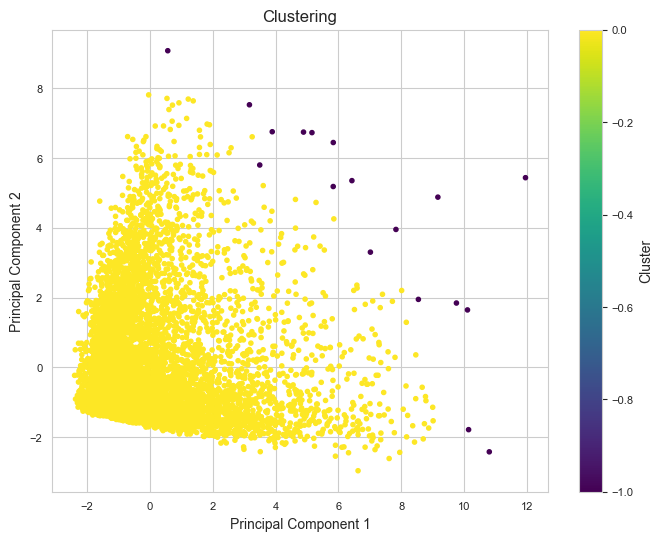

In [83]:
visualize_clustering(pca_result_5, dbscan_z3_PCA.labels_)

Visualisasi diatas menggambarkan hasil klasterisasi dengan menggunakan DBSCAN pada data pengguna kartu kredit setelah proses reduksi dimensi dengan PCA. Titik-titik pada grafik direpresentasikan dengan warna yang berbeda untuk setiap klaster yang dihasilkan oleh algoritma, termasuk titik-titik yang dianggap sebagai noise (-1) yang terlihat terpisah dari klaster lainnya. Ini membantu memahami sebaran klaster dan penandaan titik-titik noise dalam data.

In [84]:
df1_z3

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES   
0       40.900749      95.40              0.00                   95.40  \
1     3202.467416       0.00              0.00                    0.00   
2     2495.148862     773.17            773.17                    0.00   
3     1666.670542    1499.00           1499.00                    0.00   
4      817.714335      16.00             16.00                    0.00   
...           ...        ...               ...                     ...   
7661    55.147722     163.31              0.00                  163.31   
7662   869.328293       0.00              0.00                    0.00   
7663   137.744895     441.00              0.00                  441.00   
7664   331.070135      81.20             81.20                    0.00   
7665    23.116625       0.00              0.00                    0.00   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0         0.000000               0.0            2.0        1000.0  \
1      6442.945483               4.0            0.0        7000.0   
2         0.000000               0.0           12.0        7500.0   
3       205.788017               1.0            1.0        7500.0   
4         0.000000               0.0            1.0        1200.0   
...            ...               ...            ...           ...   
7661      0.000000               0.0            7.0        1000.0   
7662   1153.925205               3.0            0.0        1200.0   
7663      0.000000               0.0            6.0        1000.0   
7664    419.341394               7.0            1.0         500.0   
7665    921.973821               5.0            0.0         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  TENURE  CLUSTER_KMEANS_PCA   
0      201.802084        139.509787    12.0                   0  \
1     4103.032597       1072.340217    12.0                   2   
2      622.066742        627.284787    12.0                   0   
3        0.000000        312.343947    12.0                   0   
4      678.334763        244.791237    12.0                   0   
...           ...               ...     ...                 ...   
7661    62.619008        109.580539     8.0                   0   
7662   150.755024        337.986933     8.0                   0   
7663   169.249683        124.639905     8.0                   0   
7664   116.761487        205.065526     8.0                   0   
7665   586.173293         16.194932     8.0                   0   

      CLUSTER_HIERARCHICAL_PCA  CLUSTER_DBSCAN_PCA  
0                            1                   0  
1                            1                   0  
2                            1                   0  
3                            1                   0  
4                            1                   0  
...                        ...                 ...  
7661                         1                   0  
7662                         1                   0  
7663                         1                   0  
7664                         1                   0  
7665                         1                   0  

[7666 rows x 14 columns]

## G.6 Save Clustering

Dari semua percobaan model Machine Learning Clustering ternyata tipe dataset df_z3 memberikan Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index yang terbaik maka kami menyimpan hasil dalam dataset df1_z3

In [85]:
df1_z3

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES   
0       40.900749      95.40              0.00                   95.40  \
1     3202.467416       0.00              0.00                    0.00   
2     2495.148862     773.17            773.17                    0.00   
3     1666.670542    1499.00           1499.00                    0.00   
4      817.714335      16.00             16.00                    0.00   
...           ...        ...               ...                     ...   
7661    55.147722     163.31              0.00                  163.31   
7662   869.328293       0.00              0.00                    0.00   
7663   137.744895     441.00              0.00                  441.00   
7664   331.070135      81.20             81.20                    0.00   
7665    23.116625       0.00              0.00                    0.00   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0         0.000000               0.0            2.0        1000.0  \
1      6442.945483               4.0            0.0        7000.0   
2         0.000000               0.0           12.0        7500.0   
3       205.788017               1.0            1.0        7500.0   
4         0.000000               0.0            1.0        1200.0   
...            ...               ...            ...           ...   
7661      0.000000               0.0            7.0        1000.0   
7662   1153.925205               3.0            0.0        1200.0   
7663      0.000000               0.0            6.0        1000.0   
7664    419.341394               7.0            1.0         500.0   
7665    921.973821               5.0            0.0         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  TENURE  CLUSTER_KMEANS_PCA   
0      201.802084        139.509787    12.0                   0  \
1     4103.032597       1072.340217    12.0                   2   
2      622.066742        627.284787    12.0                   0   
3        0.000000        312.343947    12.0                   0   
4      678.334763        244.791237    12.0                   0   
...           ...               ...     ...                 ...   
7661    62.619008        109.580539     8.0                   0   
7662   150.755024        337.986933     8.0                   0   
7663   169.249683        124.639905     8.0                   0   
7664   116.761487        205.065526     8.0                   0   
7665   586.173293         16.194932     8.0                   0   

      CLUSTER_HIERARCHICAL_PCA  CLUSTER_DBSCAN_PCA  
0                            1                   0  
1                            1                   0  
2                            1                   0  
3                            1                   0  
4                            1                   0  
...                        ...                 ...  
7661                         1                   0  
7662                         1                   0  
7663                         1                   0  
7664                         1                   0  
7665                         1                   0  

[7666 rows x 14 columns]

# H. Evaluation Model

## H.1 Function

In [86]:
# Fungsi Evaluasi Silhouette Score, Davies-Bouldin Index, dan Calinski-Harabasz Score
def evaluate_silhouette_score(data, labels):
    silhouette = silhouette_score(data, labels)
    return silhouette

def evaluate_davies_bouldin_index(data, labels):
    db_index = davies_bouldin_score(data, labels)
    return db_index

def evaluate_calinski_harabasz_index(data, labels):
    calinski_score = calinski_harabasz_score(data, labels)
    return calinski_score

## H.2 Visualiztion of PCA

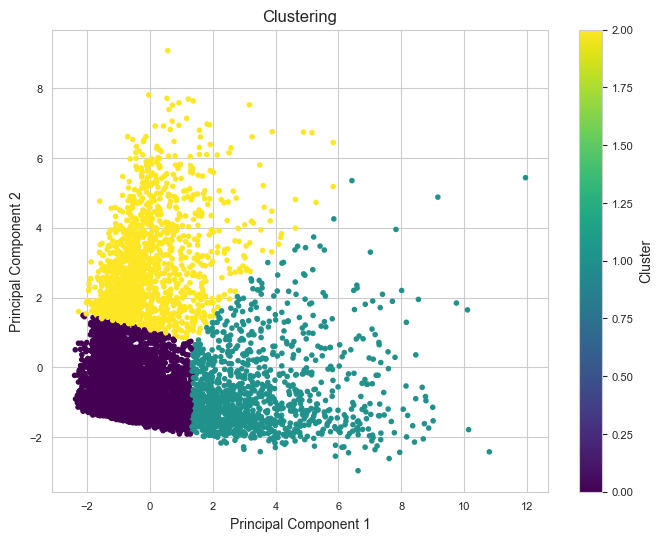

In [87]:
# K-Means Clustering
visualize_clustering(pca_result_1, kmeans_z3_PCA.labels_)

Visualisasi diatas menggambarkan hasil klasterisasi dengan K-Means pada data pengguna kartu kredit setelah dilakukan reduksi dimensi dengan PCA. Titik-titik pada grafik diberi warna yang berbeda sesuai dengan klaster yang dihasilkan oleh algoritma K-Means. Ini membantu dalam memahami pola klaster yang terbentuk setelah reduksi dimensi, memungkinkan untuk melihat pola distribusi data secara visual.

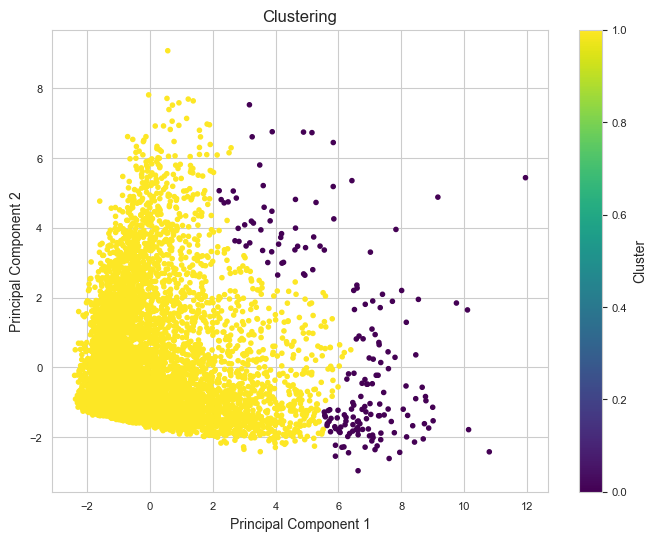

In [88]:
# Hierarchical Clustering
visualize_clustering(pca_result_3, hie_z3_PCA.labels_)

Visualisasi diatas menggambarkan hasil dari algoritma Hierarchical Clustering yang diterapkan pada data pengguna kartu kredit setelah dilakukan reduksi dimensi menggunakan PCA. Titik-titik pada grafik diberi warna sesuai dengan klaster yang dihasilkan oleh algoritma Hierarchical Clustering. Visualisasi ini membantu dalam memahami struktur klaster hierarkis yang terbentuk setelah pengurangan dimensi, memungkinkan interpretasi visual terhadap pola klaster yang muncul.

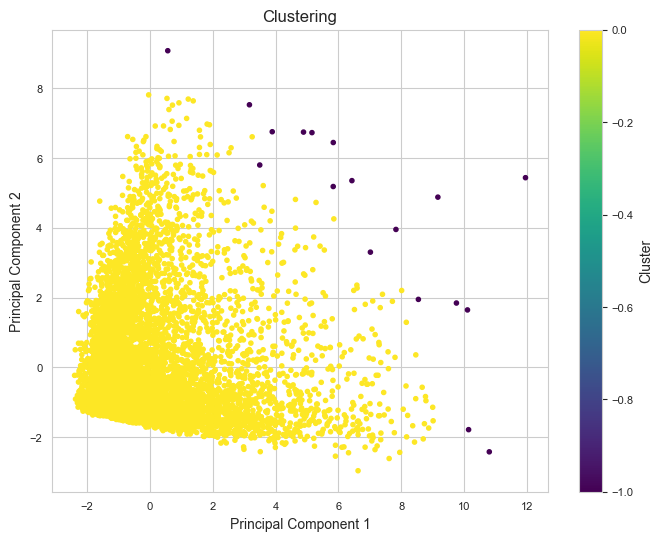

In [89]:
# DBSCAN Clustering
visualize_clustering(pca_result_5, dbscan_z3_PCA.labels_)

Visualisasi diatas menggambarkan hasil dari algoritma DBSCAN pada data pengguna kartu kredit setelah dilakukan reduksi dimensi menggunakan PCA. Setiap titik pada grafik diwarnai berdasarkan klaster yang ditentukan oleh algoritma DBSCAN. Melalui visualisasi ini, dapat diamati sebaran titik-titik data dalam klaster yang dihasilkan oleh DBSCAN, membantu dalam pemahaman pola klaster yang mungkin memiliki kepadatan yang berbeda-beda di dalam data.

## H.3 Silhouette Score

In [90]:
print('K-Means Clustering')
print("df_z3  Silhouette Score : ",evaluate_silhouette_score(pca_result_1, kmeans_z3_PCA.labels_))
print("df_iqr Silhouette Score : ",evaluate_silhouette_score(pca_result_2, kmeans_iqr_PCA.labels_))

print('\nHierarchical Clustering')
print("df_z3  Silhouette Score : ",evaluate_silhouette_score(pca_result_3, hie_z3_PCA.labels_))
print("df_iqr Silhouette Score : ",evaluate_silhouette_score(pca_result_4, hie_iqr_PCA.labels_))

print('\nDBSCAN Clustering')
print("df_z3  Silhouette Score : ",evaluate_silhouette_score(pca_result_5, dbscan_z3_PCA.labels_))

K-Means Clustering
df_z3  Silhouette Score :  0.5291896067981946
df_iqr Silhouette Score :  0.4418657864953709

Hierarchical Clustering
df_z3  Silhouette Score :  0.6084627203887772
df_iqr Silhouette Score :  0.4817338631591364

DBSCAN Clustering
df_z3  Silhouette Score :  0.6749352629416642


## H.4 Davies-Bouldin Index

In [91]:
print('K-Means Clustering')
print("df_z3  Davies-Bouldin Index : ",evaluate_davies_bouldin_index(pca_result_1, kmeans_z3_PCA.labels_))
print("df_iqr Davies-Bouldin Index : ",evaluate_davies_bouldin_index(pca_result_2, kmeans_iqr_PCA.labels_))

print('\nHierarchical Clustering')
print("df_z3  Davies-Bouldin Index : ",evaluate_davies_bouldin_index(pca_result_3, hie_z3_PCA.labels_))
print("df_iqr Davies-Bouldin Index : ",evaluate_davies_bouldin_index(pca_result_4, hie_iqr_PCA.labels_))

print('\nDBSCAN Clustering')
print("df_z3  Davies-Bouldin Index : ",evaluate_davies_bouldin_index(pca_result_5, dbscan_z3_PCA.labels_))

K-Means Clustering
df_z3  Davies-Bouldin Index :  0.7021372521492394
df_iqr Davies-Bouldin Index :  0.7861658319456195

Hierarchical Clustering
df_z3  Davies-Bouldin Index :  0.7433598588205099
df_iqr Davies-Bouldin Index :  0.6849744975604041

DBSCAN Clustering
df_z3  Davies-Bouldin Index :  0.6969513930596619


## H.5 Calinski-Harabasz Index

In [92]:
print('K-Means Clustering')
print("df_z3  Calinski-Harabasz Index : ",evaluate_calinski_harabasz_index(pca_result_1, kmeans_z3_PCA.labels_))
print("df_iqr Calinski-Harabasz Index : ",evaluate_calinski_harabasz_index(pca_result_2, kmeans_iqr_PCA.labels_))

print('\nHierarchical Clustering')
print("df_z3  Calinski-Harabasz Index : ",evaluate_calinski_harabasz_index(pca_result_3, hie_z3_PCA.labels_))
print("df_iqr Calinski-Harabasz Index : ",evaluate_calinski_harabasz_index(pca_result_4, hie_iqr_PCA.labels_))

print('\nDBSCAN Clustering')
print("df_z3  Calinski-Harabasz Index : ",evaluate_calinski_harabasz_index(pca_result_5, dbscan_z3_PCA.labels_))

K-Means Clustering
df_z3  Calinski-Harabasz Index :  7396.508493855975
df_iqr Calinski-Harabasz Index :  4067.255397618042

Hierarchical Clustering
df_z3  Calinski-Harabasz Index :  1446.6417681249213
df_iqr Calinski-Harabasz Index :  784.2647099268903

DBSCAN Clustering
df_z3  Calinski-Harabasz Index :  205.49562753644895


## H.6 Model and Data Selection

Deskripsikan Alasan Pemilihan data df_z3 dan Model K-means. Berdasarakan Skor silhouette,davies,calinski, inertia dan visualisasi PCA

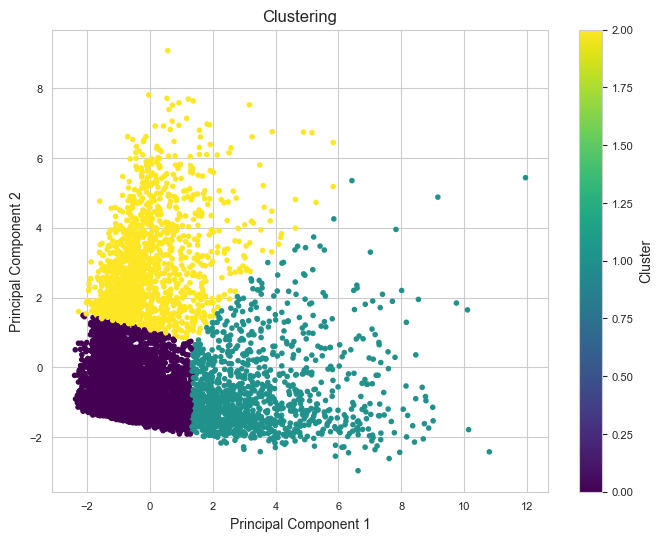

In [93]:
# Tampilan PCA model K-Means Clustering
visualize_clustering(pca_result_1, kmeans_z3_PCA.labels_)

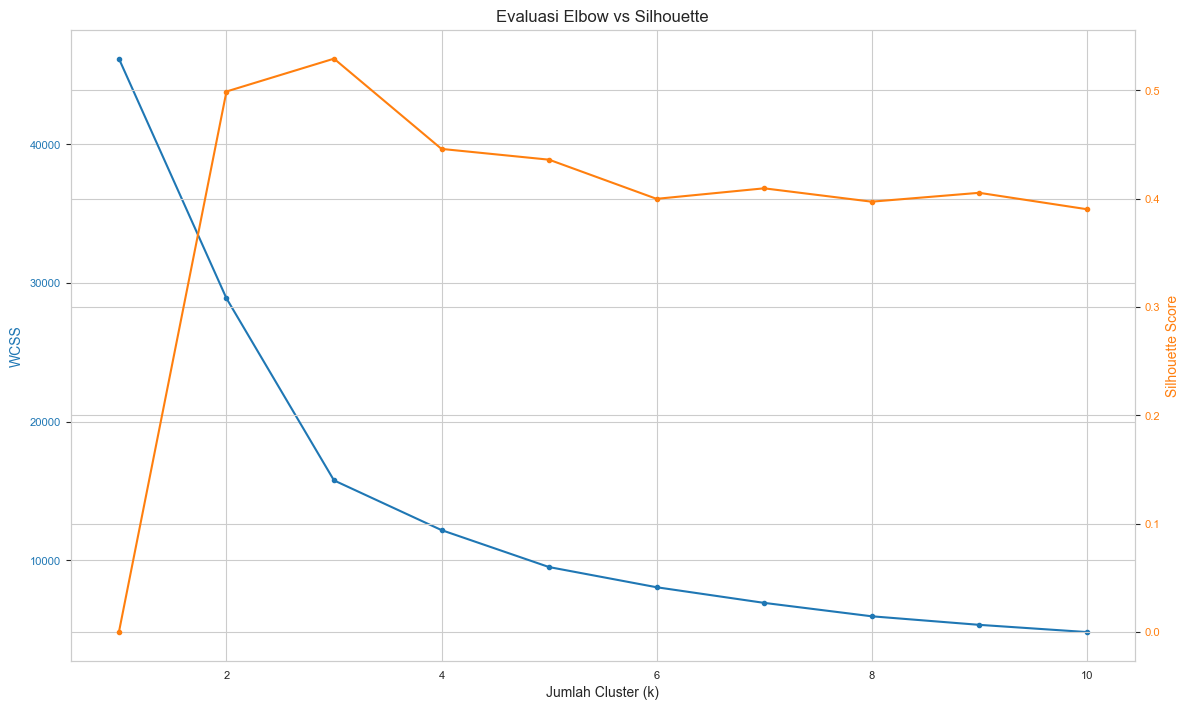

In [94]:
k_values = range(1, 11)

wcss = []               # WCSS (Within-Cluster Sum of Squares) untuk setiap nilai k
silhouette_scores = []  # Silhouette Score untuk setiap nilai k

for k in k_values:
    kmeans = KMeans(algorithm='auto', 
                    init='k-means++', 
                    n_clusters=k, 
                    n_init=10, 
                    random_state=42).fit(pca_result_1)
    wcss.append(kmeans.inertia_)
    
    if k > 1:  
        silhouette_scores.append(silhouette_score(pca_result_1, kmeans.labels_))
    else:
        silhouette_scores.append(0)  

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(k_values, wcss, 'o-', color='tab:blue')  # Plot WCSS
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Silhouette Score', color='tab:orange')
ax2.plot(k_values, silhouette_scores, 'o-', color='tab:orange')  
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Evaluasi Elbow vs Silhouette')
plt.show()


In [95]:
# Hasil Evaluasi model K-Means Clustering
print("Silhouette Score        : ",evaluate_silhouette_score(pca_result_1, kmeans_z3_PCA.labels_))
print("Davies-Bouldin Index    : ",evaluate_davies_bouldin_index(pca_result_1, kmeans_z3_PCA.labels_))
print("Calinski-Harabasz Index : ",evaluate_calinski_harabasz_index(pca_result_1, kmeans_z3_PCA.labels_))

Silhouette Score        :  0.5291896067981946
Davies-Bouldin Index    :  0.7021372521492394
Calinski-Harabasz Index :  7396.508493855975


## H.7 Interpretation of Clusters

In [96]:
df1_z3

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES   
0       40.900749      95.40              0.00                   95.40  \
1     3202.467416       0.00              0.00                    0.00   
2     2495.148862     773.17            773.17                    0.00   
3     1666.670542    1499.00           1499.00                    0.00   
4      817.714335      16.00             16.00                    0.00   
...           ...        ...               ...                     ...   
7661    55.147722     163.31              0.00                  163.31   
7662   869.328293       0.00              0.00                    0.00   
7663   137.744895     441.00              0.00                  441.00   
7664   331.070135      81.20             81.20                    0.00   
7665    23.116625       0.00              0.00                    0.00   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0         0.000000               0.0            2.0        1000.0  \
1      6442.945483               4.0            0.0        7000.0   
2         0.000000               0.0           12.0        7500.0   
3       205.788017               1.0            1.0        7500.0   
4         0.000000               0.0            1.0        1200.0   
...            ...               ...            ...           ...   
7661      0.000000               0.0            7.0        1000.0   
7662   1153.925205               3.0            0.0        1200.0   
7663      0.000000               0.0            6.0        1000.0   
7664    419.341394               7.0            1.0         500.0   
7665    921.973821               5.0            0.0         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  TENURE  CLUSTER_KMEANS_PCA   
0      201.802084        139.509787    12.0                   0  \
1     4103.032597       1072.340217    12.0                   2   
2      622.066742        627.284787    12.0                   0   
3        0.000000        312.343947    12.0                   0   
4      678.334763        244.791237    12.0                   0   
...           ...               ...     ...                 ...   
7661    62.619008        109.580539     8.0                   0   
7662   150.755024        337.986933     8.0                   0   
7663   169.249683        124.639905     8.0                   0   
7664   116.761487        205.065526     8.0                   0   
7665   586.173293         16.194932     8.0                   0   

      CLUSTER_HIERARCHICAL_PCA  CLUSTER_DBSCAN_PCA  
0                            1                   0  
1                            1                   0  
2                            1                   0  
3                            1                   0  
4                            1                   0  
...                        ...                 ...  
7661                         1                   0  
7662                         1                   0  
7663                         1                   0  
7664                         1                   0  
7665                         1                   0  

[7666 rows x 14 columns]

In [97]:
# Bersihkan kolom selain hasil clustering dengan K-Means
df_kmeans = df1_z3.copy()
df_kmeans = df_kmeans.loc[:, ~df_kmeans.columns.isin(['CLUSTER_HIERARCHICAL_PCA', 'CLUSTER_DBSCAN_PCA'])]
df_kmeans

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES   
0       40.900749      95.40              0.00                   95.40  \
1     3202.467416       0.00              0.00                    0.00   
2     2495.148862     773.17            773.17                    0.00   
3     1666.670542    1499.00           1499.00                    0.00   
4      817.714335      16.00             16.00                    0.00   
...           ...        ...               ...                     ...   
7661    55.147722     163.31              0.00                  163.31   
7662   869.328293       0.00              0.00                    0.00   
7663   137.744895     441.00              0.00                  441.00   
7664   331.070135      81.20             81.20                    0.00   
7665    23.116625       0.00              0.00                    0.00   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0         0.000000               0.0            2.0        1000.0  \
1      6442.945483               4.0            0.0        7000.0   
2         0.000000               0.0           12.0        7500.0   
3       205.788017               1.0            1.0        7500.0   
4         0.000000               0.0            1.0        1200.0   
...            ...               ...            ...           ...   
7661      0.000000               0.0            7.0        1000.0   
7662   1153.925205               3.0            0.0        1200.0   
7663      0.000000               0.0            6.0        1000.0   
7664    419.341394               7.0            1.0         500.0   
7665    921.973821               5.0            0.0         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  TENURE  CLUSTER_KMEANS_PCA  
0      201.802084        139.509787    12.0                   0  
1     4103.032597       1072.340217    12.0                   2  
2      622.066742        627.284787    12.0                   0  
3        0.000000        312.343947    12.0                   0  
4      678.334763        244.791237    12.0                   0  
...           ...               ...     ...                 ...  
7661    62.619008        109.580539     8.0                   0  
7662   150.755024        337.986933     8.0                   0  
7663   169.249683        124.639905     8.0                   0  
7664   116.761487        205.065526     8.0                   0  
7665   586.173293         16.194932     8.0                   0  

[7666 rows x 12 columns]

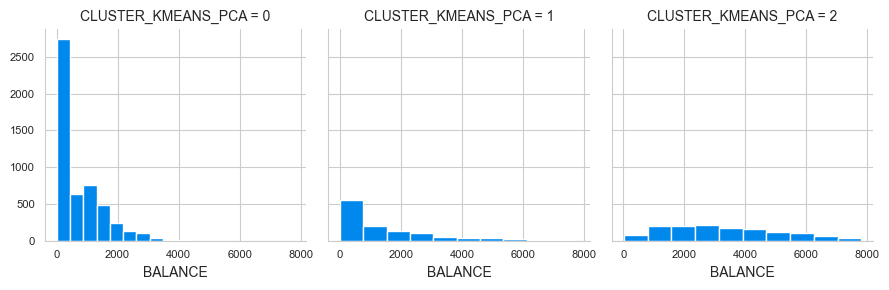

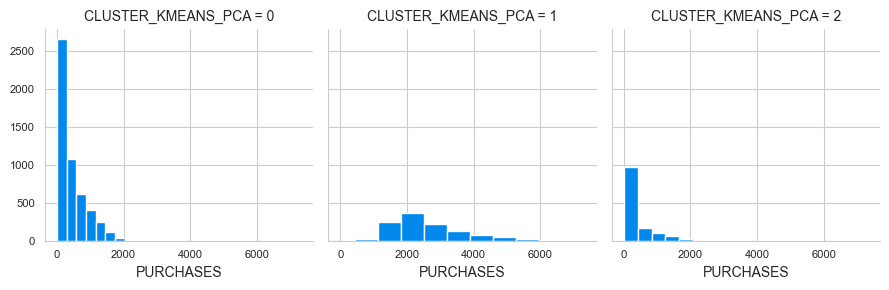

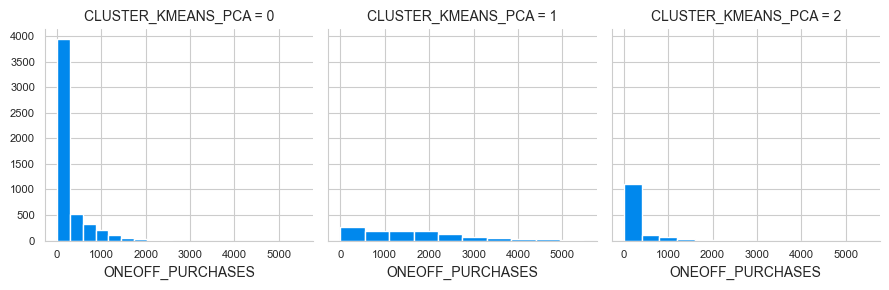

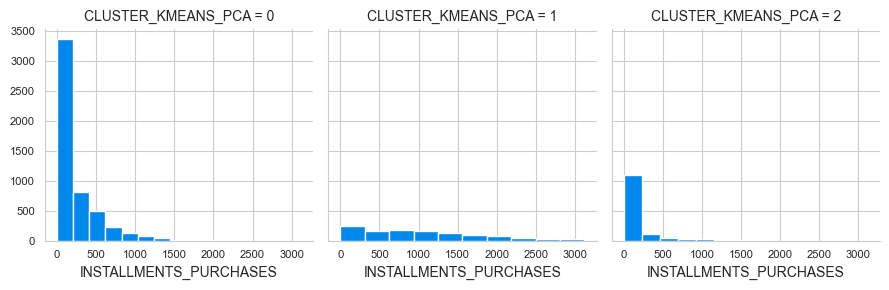

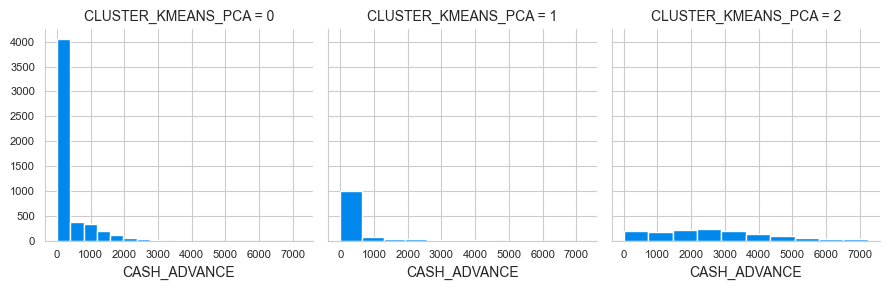

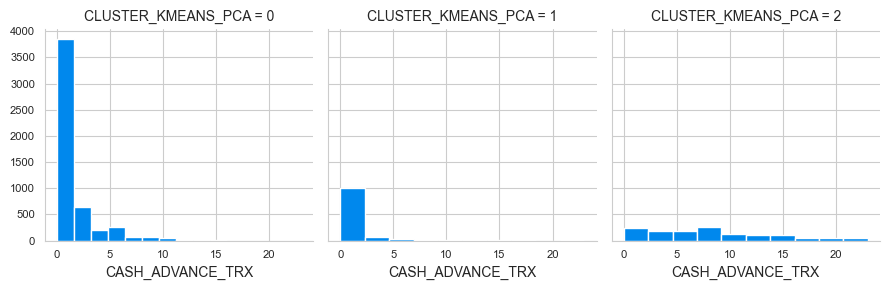

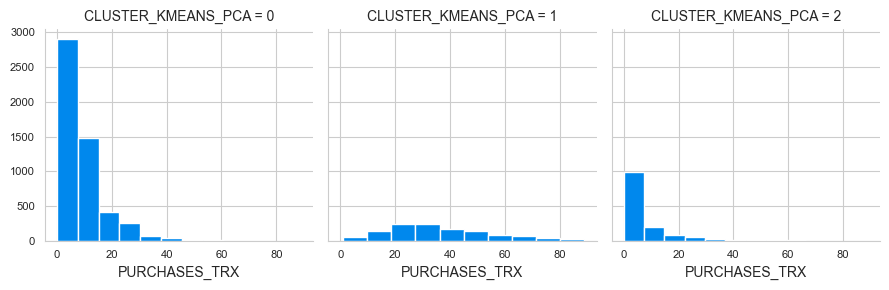

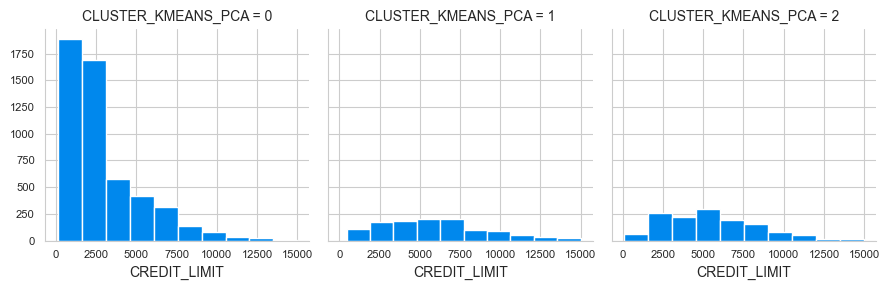

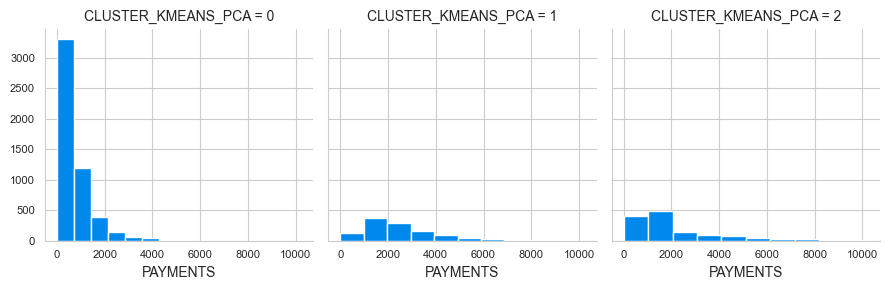

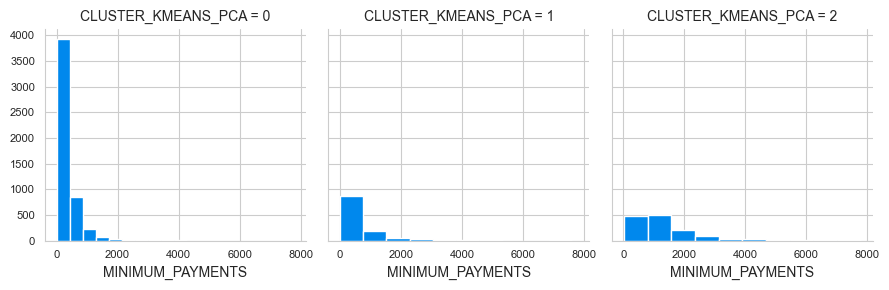

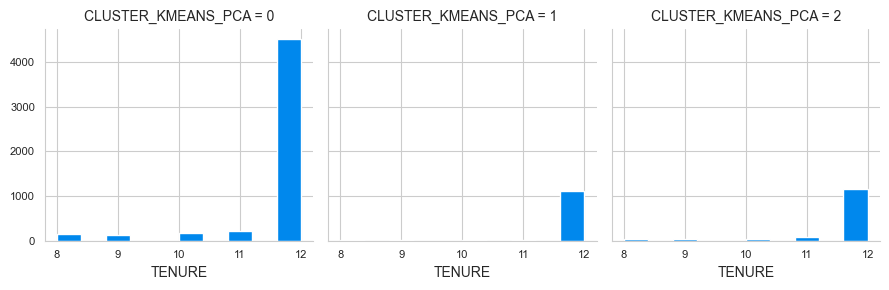

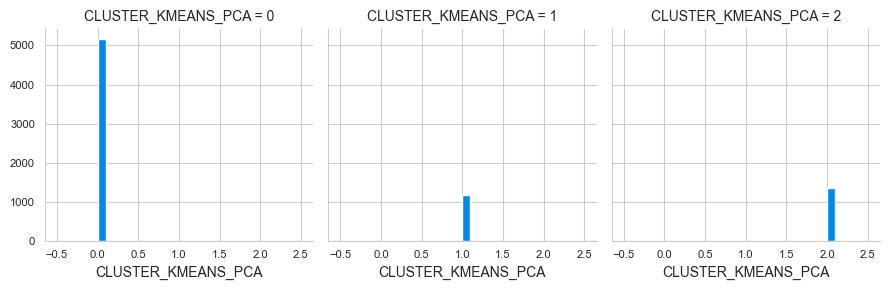

In [98]:
for i in df_kmeans:
    grid= sns.FacetGrid(df_kmeans, col='CLUSTER_KMEANS_PCA')
    grid.map(plt.hist, i)

# I. Conclusion

# J. Pickle